In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import logging
import gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
# Papermill notebook parameters

#############
# gymid = 'CyberBattleTiny-v0'
#############
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
#############
# gymid = "CyberBattleChain-v0"
# env_size = 10
# iteration_count = 9000
# training_episode_count = 50
# eval_episode_count = 5
# maximum_node_count = 22
# maximum_total_credentials = 22

In [4]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10


In [5]:
# Load the Gym environment
if env_size:
    gym_env = gym.make(gymid, size=env_size)
else:
    gym_env = gym.make(gymid)

ep = w.EnvironmentBounds.of_identifiers(
    maximum_node_count=maximum_node_count,
    maximum_total_credentials=maximum_total_credentials,
    identifiers=gym_env.identifiers
)

In [6]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0 = gym_env.reset()
    o_test, r, d, i = gym_env.step(gym_env.sample_valid_action())
    o0 = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a, None)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   12.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:   21.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:   21.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   71.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   71.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   77.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:   77.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:   83.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:   83.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:   92.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 72|reward:   92.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:   92.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:   92.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:   98.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:   98.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  107.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 203|reward:  107.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 204|reward:  157.0|last_reward_at:  203|Elapsed Time: 0:00:00||

Episode 1|Iteration 204|reward:  157.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  157.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  157.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  157.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  157.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 372|reward:  163.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 1|Iteration 372|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 418|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 456|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 494|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 532|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 570|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 608|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:00||

Episode 1|Iteration 646|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 722|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 760|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 836|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 874|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 912|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 950|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 988|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 1026|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 1064|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 1102|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 1140|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 1178|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:01||

Episode 1|Iteration 1216|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1254|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1292|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1330|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1368|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1406|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1444|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1482|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

Episode 1|Iteration 1500|reward:  163.0|last_reward_at:  372|Elapsed Time: 0:00:02||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/120 (0.01)
    explore-remote: 8/1164 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/205 (0.01)
  exploit deflected to exploration: 13
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   12.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:   21.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 2|Iteration 36|reward:   21.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:   71.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:   71.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:   77.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:   77.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 133|reward:   77.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:   83.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 164|reward:   83.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:   89.0|last_reward_at:  164|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:   89.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 215|reward:   98.0|last_reward_at:  190|Elapsed Time: 0:00:00||

Episode 2|Iteration 215|reward:   98.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 2|Iteration 221|reward:  107.0|last_reward_at:  215|Elapsed Time: 0:00:00||

Episode 2|Iteration 221|reward:  107.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  157.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 2|Iteration 231|reward:  157.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:  157.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 304|reward:  157.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 310|reward:  163.0|last_reward_at:  231|Elapsed Time: 0:00:00||

Episode 2|Iteration 310|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 342|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 380|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 418|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 494|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 532|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 570|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 608|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:00||

Episode 2|Iteration 646|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 722|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 760|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 874|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1064|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1102|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1121|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1159|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1197|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:01||

Episode 2|Iteration 1235|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1273|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1311|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1349|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1387|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1425|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1463|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

Episode 2|Iteration 1500|reward:  163.0|last_reward_at:  310|Elapsed Time: 0:00:02||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/119 (0.01)
    explore-remote: 8/1035 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/335 (0.01)
  exploit deflected to exploration: 48
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   12.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   21.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   71.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   77.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 33|reward:   77.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:   83.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 3|Iteration 60|reward:   83.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:   89.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:   89.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:   98.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 101|reward:   98.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  107.0|last_reward_at:  101|Elapsed Time: 0:00:00||

Episode 3|Iteration 147|reward:  107.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 158|reward:  157.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 3|Iteration 158|reward:  157.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  157.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 3|Iteration 247|reward:  157.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 3|Iteration 259|reward:  163.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 3|Iteration 259|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 304|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 342|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 380|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 418|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 494|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 532|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 570|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 608|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:00||

Episode 3|Iteration 646|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 722|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 760|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 836|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 874|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 912|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 950|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 988|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1026|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1064|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1102|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1140|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1178|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1216|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:01||

Episode 3|Iteration 1254|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1292|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1330|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1368|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1406|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1444|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1482|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

Episode 3|Iteration 1500|reward:  163.0|last_reward_at:  259|Elapsed Time: 0:00:02||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/104 (0.01)
    explore-remote: 8/891 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/494 (0.00)
  exploit deflected to exploration: 29
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   27.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   27.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   36.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   36.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:   86.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:   92.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 4|Iteration 43|reward:   92.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:   92.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 105|reward:   98.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 4|Iteration 105|reward:   98.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  107.0|last_reward_at:  105|Elapsed Time: 0:00:00||

Episode 4|Iteration 109|reward:  107.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  157.0|last_reward_at:  109|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:  157.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 152|reward:  157.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 187|reward:  163.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 187|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 228|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 266|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 304|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 342|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 380|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 418|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 494|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 532|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 608|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:00||

Episode 4|Iteration 646|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 684|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 722|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 760|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 798|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 836|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 874|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 893|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 931|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 969|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1007|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1045|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1083|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1121|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1159|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1197|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:01||

Episode 4|Iteration 1235|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1273|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1311|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1349|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1387|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1425|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1463|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 4|Iteration 1500|reward:  163.0|last_reward_at:  187|Elapsed Time: 0:00:02||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/91 (0.01)
    explore-remote: 8/808 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/590 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   12.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 17|reward:   18.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   27.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   27.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   36.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   36.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:   86.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 28|reward:   86.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   92.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 133|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:   92.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 202|reward:   98.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 202|reward:   98.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  107.0|last_reward_at:  202|Elapsed Time: 0:00:00||

Episode 5|Iteration 229|reward:  107.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 236|reward:  157.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 5|Iteration 236|reward:  157.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  157.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 319|reward:  163.0|last_reward_at:  236|Elapsed Time: 0:00:00||

Episode 5|Iteration 319|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 361|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 437|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 475|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 513|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 551|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 589|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 627|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 5|Iteration 665|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 741|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 779|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 817|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 855|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 893|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 931|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 950|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 988|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1026|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1064|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1102|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1140|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1178|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1216|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 5|Iteration 1254|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1292|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1330|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1368|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1406|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1444|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1482|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 5|Iteration 1500|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/93 (0.01)
    explore-remote: 8/698 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/698 (0.00)
  exploit deflected to exploration: 6
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:   18.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   27.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:   77.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 27|reward:   77.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 6|Iteration 59|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:   89.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:   89.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:   98.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:   98.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  107.0|last_reward_at:  114|Elapsed Time: 0:00:00||

Episode 6|Iteration 147|reward:  107.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 149|reward:  157.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 6|Iteration 149|reward:  157.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:  157.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  157.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 266|reward:  157.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 304|reward:  157.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 342|reward:  157.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 364|reward:  163.0|last_reward_at:  149|Elapsed Time: 0:00:00||

Episode 6|Iteration 364|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 399|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 437|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 475|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 513|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 551|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 589|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 627|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:00||

Episode 6|Iteration 665|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 703|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 741|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 779|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 817|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 855|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 893|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 931|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 969|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1007|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1045|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1083|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1121|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1159|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1197|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1235|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:01||

Episode 6|Iteration 1273|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 6|Iteration 1311|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 6|Iteration 1349|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 6|Iteration 1387|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 6|Iteration 1425|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 6|Iteration 1463|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

Episode 6|Iteration 1500|reward:  163.0|last_reward_at:  364|Elapsed Time: 0:00:02||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/88 (0.01)
    explore-remote: 8/655 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/746 (0.00)
  exploit deflected to exploration: 58
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:   18.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:   24.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:   24.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:   33.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 47|reward:   33.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:   83.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:   83.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:   89.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 78|reward:   89.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:   98.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 247|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 285|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 323|reward:   98.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 350|reward:  107.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 350|reward:  107.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 7|Iteration 351|reward:  157.0|last_reward_at:  350|Elapsed Time: 0:00:00||

Episode 7|Iteration 351|reward:  157.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 7|Iteration 399|reward:  157.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 7|Iteration 437|reward:  157.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 7|Iteration 465|reward:  163.0|last_reward_at:  351|Elapsed Time: 0:00:00||

Episode 7|Iteration 465|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:00||

Episode 7|Iteration 513|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:00||

Episode 7|Iteration 551|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:00||

Episode 7|Iteration 589|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:00||

Episode 7|Iteration 627|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:00||

Episode 7|Iteration 665|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 703|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 741|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 779|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 817|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 855|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 893|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 931|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 969|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1007|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1045|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1083|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1121|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1159|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1197|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1235|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1273|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:01||

Episode 7|Iteration 1311|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 7|Iteration 1349|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 7|Iteration 1387|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 7|Iteration 1425|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 7|Iteration 1463|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:02||

Episode 7|Iteration 1500|reward:  163.0|last_reward_at:  465|Elapsed Time: 0:00:02||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/75 (0.01)
    explore-remote: 8/545 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/869 (0.00)
  exploit deflected to exploration: 47
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:   27.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 36|reward:   27.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:   27.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:   33.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 8|Iteration 98|reward:   33.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:   42.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 8|Iteration 144|reward:   42.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 146|reward:   92.0|last_reward_at:  144|Elapsed Time: 0:00:00||

Episode 8|Iteration 146|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 266|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 276|reward:  101.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 8|Iteration 276|reward:  101.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 8|Iteration 278|reward:  151.0|last_reward_at:  276|Elapsed Time: 0:00:00||

Episode 8|Iteration 278|reward:  151.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 8|Iteration 301|reward:  157.0|last_reward_at:  278|Elapsed Time: 0:00:00||

Episode 8|Iteration 301|reward:  157.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 8|Iteration 319|reward:  163.0|last_reward_at:  301|Elapsed Time: 0:00:00||

Episode 8|Iteration 319|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 361|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 399|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 437|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 475|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 513|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 551|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 589|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 627|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 665|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:00||

Episode 8|Iteration 703|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 741|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 779|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 817|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 855|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 893|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 931|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 969|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1007|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1045|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1083|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1121|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1159|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1197|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1235|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1273|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1311|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:01||

Episode 8|Iteration 1349|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 8|Iteration 1387|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 8|Iteration 1425|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 8|Iteration 1463|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

Episode 8|Iteration 1500|reward:  163.0|last_reward_at:  319|Elapsed Time: 0:00:02||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/69 (0.01)
    explore-remote: 8/483 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/937 (0.00)
  exploit deflected to exploration: 23
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   12.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:   21.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 9|Iteration 21|reward:   21.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 63|reward:   27.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 9|Iteration 63|reward:   27.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:   27.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:   27.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 9|Iteration 211|reward:   33.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 9|Iteration 211|reward:   33.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 9|Iteration 266|reward:   33.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 9|Iteration 293|reward:   42.0|last_reward_at:  211|Elapsed Time: 0:00:00||

Episode 9|Iteration 293|reward:   42.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 9|Iteration 294|reward:   92.0|last_reward_at:  293|Elapsed Time: 0:00:00||

Episode 9|Iteration 294|reward:   92.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 9|Iteration 312|reward:   98.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 9|Iteration 312|reward:   98.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 9|Iteration 361|reward:   98.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 9|Iteration 399|reward:   98.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 9|Iteration 437|reward:   98.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 9|Iteration 473|reward:  107.0|last_reward_at:  312|Elapsed Time: 0:00:00||

Episode 9|Iteration 473|reward:  107.0|last_reward_at:  473|Elapsed Time: 0:00:00||

Episode 9|Iteration 475|reward:  157.0|last_reward_at:  473|Elapsed Time: 0:00:00||

Episode 9|Iteration 475|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 513|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 551|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 589|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 627|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 665|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 703|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:00||

Episode 9|Iteration 741|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 9|Iteration 779|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 9|Iteration 817|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 9|Iteration 855|reward:  157.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 9|Iteration 863|reward:  163.0|last_reward_at:  475|Elapsed Time: 0:00:01||

Episode 9|Iteration 863|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 912|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 950|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 988|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1026|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1064|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1102|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1140|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1178|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1216|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1254|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1292|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1330|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:01||

Episode 9|Iteration 1368|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 9|Iteration 1406|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 9|Iteration 1444|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 9|Iteration 1482|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:02||

Episode 9|Iteration 1500|reward:  163.0|last_reward_at:  863|Elapsed Time: 0:00:02||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/72 (0.01)
    explore-remote: 8/427 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/990 (0.00)
  exploit deflected to exploration: 18
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 33|reward:   12.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:   18.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 10|Iteration 44|reward:   18.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:   27.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 10|Iteration 58|reward:   27.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:   77.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 10|Iteration 59|reward:   77.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:   83.0|last_reward_at:   59|Elapsed Time: 0:00:00||

Episode 10|Iteration 61|reward:   83.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 82|reward:   92.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 10|Iteration 82|reward:   92.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:   92.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 165|reward:   98.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 10|Iteration 165|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 285|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 361|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 399|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 437|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 461|reward:  107.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 10|Iteration 461|reward:  107.0|last_reward_at:  461|Elapsed Time: 0:00:00||

Episode 10|Iteration 464|reward:  157.0|last_reward_at:  461|Elapsed Time: 0:00:00||

Episode 10|Iteration 464|reward:  157.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 10|Iteration 474|reward:  163.0|last_reward_at:  464|Elapsed Time: 0:00:00||

Episode 10|Iteration 474|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 10|Iteration 513|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 10|Iteration 551|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 10|Iteration 589|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 10|Iteration 627|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 10|Iteration 665|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:00||

Episode 10|Iteration 703|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 741|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 779|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 817|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 855|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 893|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 931|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 969|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1007|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1045|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1083|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1121|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1159|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1197|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1216|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1254|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1292|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:01||

Episode 10|Iteration 1330|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 10|Iteration 1368|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 10|Iteration 1406|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 10|Iteration 1444|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 10|Iteration 1482|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:02||

Episode 10|Iteration 1500|reward:  163.0|last_reward_at:  474|Elapsed Time: 0:00:02||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/54 (0.02)
    explore-remote: 8/430 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/1005 (0.00)
  exploit deflected to exploration: 51
simulation ended


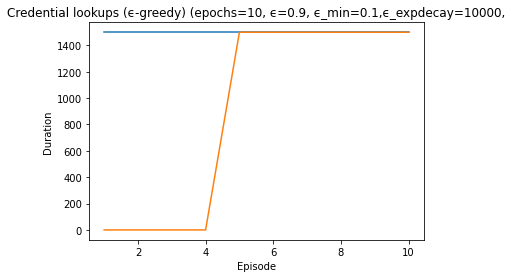

In [7]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)"
)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning"
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:   24.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 26|reward:   24.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:   33.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:   83.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 53|reward:   83.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:   83.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:   92.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 1|Iteration 78|reward:   92.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  101.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 1|Iteration 102|reward:  101.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  107.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 1|Iteration 122|reward:  107.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  113.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:  113.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 148|reward:  163.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 148|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 228|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 266|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 304|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 475|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 532|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 570|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 608|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 646|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 684|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 703|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 722|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 760|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:01||

Episode 1|Iteration 796|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 1|Iteration 817|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 1|Iteration 836|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 1|Iteration 855|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 1|Iteration 893|reward:  163.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 1|Iteration 903|reward:  263.0|last_reward_at:  148|Elapsed Time: 0:00:02||

Episode 1|Iteration 903|reward:  263.0|last_reward_at:  903|Elapsed Time: 0:00:02||

Episode 1|Iteration 918|reward:  272.0|last_reward_at:  903|Elapsed Time: 0:00:02||

Episode 1|Iteration 918|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 950|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 969|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 988|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1007|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1026|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1045|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1064|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1100|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1121|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:02||

Episode 1|Iteration 1158|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1178|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1197|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1216|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1235|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1273|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1292|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1311|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1330|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1349|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1368|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1387|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1406|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1425|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1444|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1463|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1482|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:03||

Episode 1|Iteration 1500|reward:  272.0|last_reward_at:  918|Elapsed Time: 0:00:04||

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/74 (0.03)
    explore-remote: 8/571 (0.01)
    explore-connect: 1/521 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 2/318 (0.01)
  exploit deflected to exploration: 10
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   12.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   21.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   71.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   71.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:   77.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:   77.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:   86.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 47|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:   86.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 222|reward:   92.0|last_reward_at:   47|Elapsed Time: 0:00:00||

Episode 2|Iteration 222|reward:   92.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:   92.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:   92.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:   92.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 2|Iteration 343|reward:  192.0|last_reward_at:  222|Elapsed Time: 0:00:00||

Episode 2|Iteration 343|reward:  192.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 2|Iteration 358|reward:  201.0|last_reward_at:  343|Elapsed Time: 0:00:00||

Episode 2|Iteration 358|reward:  201.0|last_reward_at:  358|Elapsed Time: 0:00:00||

Episode 2|Iteration 380|reward:  201.0|last_reward_at:  358|Elapsed Time: 0:00:00||

Episode 2|Iteration 399|reward:  201.0|last_reward_at:  358|Elapsed Time: 0:00:00||

Episode 2|Iteration 437|reward:  201.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 475|reward:  201.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 489|reward:  210.0|last_reward_at:  358|Elapsed Time: 0:00:01||

Episode 2|Iteration 489|reward:  210.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 2|Iteration 492|reward:  260.0|last_reward_at:  489|Elapsed Time: 0:00:01||

Episode 2|Iteration 492|reward:  260.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 2|Iteration 513|reward:  260.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward:  260.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:  260.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 2|Iteration 608|reward:  260.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 2|Iteration 612|reward:  266.0|last_reward_at:  492|Elapsed Time: 0:00:01||

Episode 2|Iteration 612|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 646|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 703|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 722|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 741|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 760|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 779|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:01||

Episode 2|Iteration 815|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:02||

Episode 2|Iteration 836|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:02||

Episode 2|Iteration 855|reward:  266.0|last_reward_at:  612|Elapsed Time: 0:00:02||

Episode 2|Iteration 880|reward:  272.0|last_reward_at:  612|Elapsed Time: 0:00:02||

Episode 2|Iteration 880|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 912|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 931|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 950|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 987|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1007|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1045|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1064|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1083|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1102|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1121|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:02||

Episode 2|Iteration 1178|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1215|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1253|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1273|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1292|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1311|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1349|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1368|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1387|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1406|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1444|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1463|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1482|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

Episode 2|Iteration 1500|reward:  272.0|last_reward_at:  880|Elapsed Time: 0:00:03||

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/66 (0.01)
    explore-remote: 8/401 (0.02)
    explore-connect: 1/403 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 0/11 (0.00)
    exploit-connect: 2/606 (0.00)
  exploit deflected to exploration: 7
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   21.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 12|reward:   21.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  121.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:  121.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  130.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 43|reward:  130.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  136.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 3|Iteration 75|reward:  136.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  136.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  136.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 190|reward:  136.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 204|reward:  142.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 3|Iteration 204|reward:  142.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 246|reward:  142.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 281|reward:  151.0|last_reward_at:  204|Elapsed Time: 0:00:00||

Episode 3|Iteration 281|reward:  151.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 3|Iteration 284|reward:  201.0|last_reward_at:  281|Elapsed Time: 0:00:00||

Episode 3|Iteration 284|reward:  201.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 3|Iteration 323|reward:  201.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 3|Iteration 361|reward:  201.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 3|Iteration 399|reward:  201.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  207.0|last_reward_at:  284|Elapsed Time: 0:00:00||

Episode 3|Iteration 430|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:00||

Episode 3|Iteration 456|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 494|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 532|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 570|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 589|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 608|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 646|reward:  207.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 658|reward:  216.0|last_reward_at:  430|Elapsed Time: 0:00:01||

Episode 3|Iteration 658|reward:  216.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 3|Iteration 659|reward:  266.0|last_reward_at:  658|Elapsed Time: 0:00:01||

Episode 3|Iteration 659|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 722|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 741|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 760|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 779|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 798|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:01||

Episode 3|Iteration 817|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 855|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 881|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 912|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 931|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 968|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 988|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 1007|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 1026|reward:  266.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 1028|reward:  272.0|last_reward_at:  659|Elapsed Time: 0:00:02||

Episode 3|Iteration 1028|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:02||

Episode 3|Iteration 1064|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:02||

Episode 3|Iteration 1083|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:02||

Episode 3|Iteration 1121|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:02||

Episode 3|Iteration 1159|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:02||

Episode 3|Iteration 1197|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1216|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1254|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1273|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1292|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1311|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1330|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1349|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1387|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1425|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1463|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

Episode 3|Iteration 1500|reward:  272.0|last_reward_at: 1028|Elapsed Time: 0:00:03||

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/64 (0.03)
    explore-remote: 8/299 (0.03)
    explore-connect: 1/281 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 2/841 (0.00)
  exploit deflected to exploration: 6
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   21.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   71.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 20|reward:   71.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:   71.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:   71.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:   77.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:   77.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 114|reward:   77.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:   83.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 4|Iteration 117|reward:   83.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:   92.0|last_reward_at:  117|Elapsed Time: 0:00:00||

Episode 4|Iteration 130|reward:   92.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:   92.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:   92.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:   98.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 4|Iteration 220|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 285|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 323|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 361|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 399|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:00||

Episode 4|Iteration 437|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 4|Iteration 475|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 4|Iteration 513|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 4|Iteration 551|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 4|Iteration 589|reward:   98.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 4|Iteration 606|reward:  107.0|last_reward_at:  220|Elapsed Time: 0:00:01||

Episode 4|Iteration 606|reward:  107.0|last_reward_at:  606|Elapsed Time: 0:00:01||

Episode 4|Iteration 607|reward:  157.0|last_reward_at:  606|Elapsed Time: 0:00:01||

Episode 4|Iteration 607|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 646|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 684|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 703|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 741|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 779|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 817|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 855|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:01||

Episode 4|Iteration 893|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 912|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 950|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 969|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 1007|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 1045|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 1083|reward:  157.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 1083|reward:  163.0|last_reward_at:  607|Elapsed Time: 0:00:02||

Episode 4|Iteration 1083|reward:  163.0|last_reward_at: 1083|Elapsed Time: 0:00:02||

Episode 4|Iteration 1121|reward:  163.0|last_reward_at: 1083|Elapsed Time: 0:00:02||

Episode 4|Iteration 1154|reward:  263.0|last_reward_at: 1083|Elapsed Time: 0:00:02||

Episode 4|Iteration 1154|reward:  263.0|last_reward_at: 1154|Elapsed Time: 0:00:02||

Episode 4|Iteration 1178|reward:  263.0|last_reward_at: 1154|Elapsed Time: 0:00:02||

Episode 4|Iteration 1197|reward:  263.0|last_reward_at: 1154|Elapsed Time: 0:00:02||

Episode 4|Iteration 1216|reward:  263.0|last_reward_at: 1154|Elapsed Time: 0:00:02||

Episode 4|Iteration 1226|reward:  272.0|last_reward_at: 1154|Elapsed Time: 0:00:02||

Episode 4|Iteration 1226|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:02||

Episode 4|Iteration 1254|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1292|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1330|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1368|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1403|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1425|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1444|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1463|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

Episode 4|Iteration 1500|reward:  272.0|last_reward_at: 1226|Elapsed Time: 0:00:03||

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/48 (0.02)
    explore-remote: 6/277 (0.02)
    explore-connect: 1/260 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/34 (0.06)
    exploit-connect: 2/868 (0.00)
  exploit deflected to exploration: 93
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 23|reward:   21.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   71.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 5|Iteration 24|reward:   71.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:   71.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:   71.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 95|reward:   71.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:   71.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 129|reward:   77.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 5|Iteration 129|reward:   77.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 5|Iteration 140|reward:   86.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 5|Iteration 140|reward:   86.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:   92.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 5|Iteration 155|reward:   92.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:   92.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:   92.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:   92.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 304|reward:   92.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:   92.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 359|reward:  192.0|last_reward_at:  155|Elapsed Time: 0:00:00||

Episode 5|Iteration 359|reward:  192.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 5|Iteration 371|reward:  201.0|last_reward_at:  359|Elapsed Time: 0:00:00||

Episode 5|Iteration 371|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:00||

Episode 5|Iteration 437|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 475|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 513|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 551|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 589|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 627|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 665|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 741|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 779|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 817|reward:  201.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 819|reward:  207.0|last_reward_at:  371|Elapsed Time: 0:00:01||

Episode 5|Iteration 819|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:01||

Episode 5|Iteration 855|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:01||

Episode 5|Iteration 874|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 912|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 950|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 988|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1026|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1064|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1102|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1140|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1178|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1216|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1254|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1291|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:02||

Episode 5|Iteration 1330|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:03||

Episode 5|Iteration 1368|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:03||

Episode 5|Iteration 1406|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:03||

Episode 5|Iteration 1444|reward:  207.0|last_reward_at:  819|Elapsed Time: 0:00:03||

Episode 5|Iteration 1462|reward:  216.0|last_reward_at:  819|Elapsed Time: 0:00:03||

Episode 5|Iteration 1462|reward:  216.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 5|Iteration 1464|reward:  266.0|last_reward_at: 1462|Elapsed Time: 0:00:03||

Episode 5|Iteration 1464|reward:  266.0|last_reward_at: 1464|Elapsed Time: 0:00:03||

Episode 5|Iteration 1500|reward:  266.0|last_reward_at: 1464|Elapsed Time: 0:00:03||

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/46 (0.02)
    explore-remote: 5/185 (0.03)
    explore-connect: 1/220 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/9 (0.18)
    exploit-connect: 2/1028 (0.00)
  exploit deflected to exploration: 96
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   71.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   71.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:   77.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 25|reward:   77.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 56|reward:   83.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 6|Iteration 56|reward:   83.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:   83.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:   83.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:   89.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 103|reward:   89.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 120|reward:   98.0|last_reward_at:  103|Elapsed Time: 0:00:00||

Episode 6|Iteration 120|reward:   98.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  107.0|last_reward_at:  120|Elapsed Time: 0:00:00||

Episode 6|Iteration 122|reward:  107.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  157.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 6|Iteration 124|reward:  157.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 152|reward:  157.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:  157.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  163.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 247|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 285|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 323|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 342|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 380|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:00||

Episode 6|Iteration 418|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 456|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 494|reward:  163.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 496|reward:  263.0|last_reward_at:  209|Elapsed Time: 0:00:01||

Episode 6|Iteration 496|reward:  263.0|last_reward_at:  496|Elapsed Time: 0:00:01||

Episode 6|Iteration 504|reward:  272.0|last_reward_at:  496|Elapsed Time: 0:00:01||

Episode 6|Iteration 504|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 532|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 570|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 589|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 627|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 665|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 703|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 741|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:01||

Episode 6|Iteration 779|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 817|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 836|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 874|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 912|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 950|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 988|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 1007|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 1045|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 1083|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 1102|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 1140|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:02||

Episode 6|Iteration 1178|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1216|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1235|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1254|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1292|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1311|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1349|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1387|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1425|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1444|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1482|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

Episode 6|Iteration 1500|reward:  272.0|last_reward_at:  504|Elapsed Time: 0:00:03||

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/33 (0.03)
    explore-remote: 7/192 (0.04)
    explore-connect: 1/155 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 2/1107 (0.00)
  exploit deflected to exploration: 104
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   21.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   71.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 15|reward:   71.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 38|reward:   71.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:   77.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 7|Iteration 49|reward:   77.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   77.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:   86.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:   86.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 114|reward:   86.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 146|reward:   92.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 146|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 266|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 304|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 342|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 380|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 395|reward:   98.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 7|Iteration 395|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:00||

Episode 7|Iteration 437|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 475|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 513|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 551|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 589|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 627|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 665|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 703|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 741|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 779|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 817|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 855|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:01||

Episode 7|Iteration 893|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 931|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 969|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1007|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1045|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1083|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1121|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1159|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1197|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1235|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1273|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1311|reward:   98.0|last_reward_at:  395|Elapsed Time: 0:00:02||

Episode 7|Iteration 1342|reward:  107.0|last_reward_at:  395|Elapsed Time: 0:00:03||

Episode 7|Iteration 1342|reward:  107.0|last_reward_at: 1342|Elapsed Time: 0:00:03||

Episode 7|Iteration 1344|reward:  157.0|last_reward_at: 1342|Elapsed Time: 0:00:03||

Episode 7|Iteration 1344|reward:  157.0|last_reward_at: 1344|Elapsed Time: 0:00:03||

Episode 7|Iteration 1368|reward:  157.0|last_reward_at: 1344|Elapsed Time: 0:00:03||

Episode 7|Iteration 1406|reward:  157.0|last_reward_at: 1344|Elapsed Time: 0:00:03||

Episode 7|Iteration 1444|reward:  157.0|last_reward_at: 1344|Elapsed Time: 0:00:03||

Episode 7|Iteration 1482|reward:  157.0|last_reward_at: 1344|Elapsed Time: 0:00:03||

Episode 7|Iteration 1500|reward:  157.0|last_reward_at: 1344|Elapsed Time: 0:00:03||

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/29 (0.00)
    explore-remote: 6/133 (0.04)
    explore-connect: 0/132 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 2/1196 (0.00)
  exploit deflected to exploration: 67
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   21.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   71.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 8|Iteration 17|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 62|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 8|Iteration 62|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 152|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 190|reward:   77.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:   83.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 8|Iteration 193|reward:   83.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 8|Iteration 217|reward:   92.0|last_reward_at:  193|Elapsed Time: 0:00:00||

Episode 8|Iteration 217|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 8|Iteration 247|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 8|Iteration 285|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 8|Iteration 361|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 399|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 437|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 475|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 513|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 551|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 589|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 627|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 665|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 703|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 741|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 779|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 817|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 8|Iteration 855|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 893|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 931|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 969|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1007|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1045|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1083|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1121|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1159|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1197|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1235|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1273|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1311|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:02||

Episode 8|Iteration 1349|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:03||

Episode 8|Iteration 1387|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:03||

Episode 8|Iteration 1425|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:03||

Episode 8|Iteration 1463|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:03||

Episode 8|Iteration 1500|reward:   92.0|last_reward_at:  217|Elapsed Time: 0:00:03||

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/25 (0.00)
    explore-remote: 3/156 (0.02)
    explore-connect: 0/152 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 1/1160 (0.00)
  exploit deflected to exploration: 192
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 9|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:   27.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 23|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 152|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 190|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 228|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 266|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  127.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:  127.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 292|reward:  136.0|last_reward_at:  285|Elapsed Time: 0:00:00||

Episode 9|Iteration 292|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 323|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 361|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 399|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 418|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:00||

Episode 9|Iteration 456|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 494|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 532|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 570|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 608|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 646|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 684|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 722|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 760|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 798|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 836|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 874|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 912|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:01||

Episode 9|Iteration 950|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 9|Iteration 988|reward:  136.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 9|Iteration 995|reward:  145.0|last_reward_at:  292|Elapsed Time: 0:00:02||

Episode 9|Iteration 995|reward:  145.0|last_reward_at:  995|Elapsed Time: 0:00:02||

Episode 9|Iteration 996|reward:  195.0|last_reward_at:  995|Elapsed Time: 0:00:02||

Episode 9|Iteration 996|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1026|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1064|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1102|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1121|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1159|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1197|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1235|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1273|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1311|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1349|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:02||

Episode 9|Iteration 1387|reward:  195.0|last_reward_at:  996|Elapsed Time: 0:00:03||

Episode 9|Iteration 1387|reward:  201.0|last_reward_at:  996|Elapsed Time: 0:00:03||

Episode 9|Iteration 1387|reward:  201.0|last_reward_at: 1387|Elapsed Time: 0:00:03||

Episode 9|Iteration 1425|reward:  201.0|last_reward_at: 1387|Elapsed Time: 0:00:03||

Episode 9|Iteration 1463|reward:  201.0|last_reward_at: 1387|Elapsed Time: 0:00:03||

Episode 9|Iteration 1500|reward:  201.0|last_reward_at: 1387|Elapsed Time: 0:00:03||

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 4/49 (0.08)
    explore-connect: 1/53 (0.02)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/18 (0.05)
    exploit-connect: 1/1354 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   21.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   71.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 10|Iteration 15|reward:   71.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:   71.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:   71.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:   77.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 10|Iteration 57|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 152|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:   77.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:   83.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:   83.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:   92.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 10|Iteration 172|reward:   92.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:   92.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:   92.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 266|reward:   92.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 288|reward:   98.0|last_reward_at:  172|Elapsed Time: 0:00:00||

Episode 10|Iteration 288|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 361|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 10|Iteration 399|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 437|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 475|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 513|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 551|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 589|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 627|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 665|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 703|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 741|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 779|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 817|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 10|Iteration 855|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 893|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 931|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 969|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1007|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1045|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1083|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1121|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1159|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1197|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1235|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1273|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1292|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:02||

Episode 10|Iteration 1330|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 10|Iteration 1368|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 10|Iteration 1406|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 10|Iteration 1444|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 10|Iteration 1482|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:03||

Episode 10|Iteration 1500|reward:   98.0|last_reward_at:  288|Elapsed Time: 0:00:03||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/23 (0.00)
    explore-remote: 3/100 (0.03)
    explore-connect: 0/117 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/0 (1.00)
    exploit-connect: 1/1252 (0.00)
  exploit deflected to exploration: 160
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   71.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 11|Iteration 4|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 76|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:   77.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 11|Iteration 84|reward:   77.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 88|reward:   86.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 11|Iteration 88|reward:   86.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 11|Iteration 114|reward:   86.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 11|Iteration 129|reward:  186.0|last_reward_at:   88|Elapsed Time: 0:00:00||

Episode 11|Iteration 129|reward:  186.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 11|Iteration 130|reward:  195.0|last_reward_at:  129|Elapsed Time: 0:00:00||

Episode 11|Iteration 130|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 171|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 209|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 247|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 285|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 323|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 361|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 399|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 437|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:00||

Episode 11|Iteration 475|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 513|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 551|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 589|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 627|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 665|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 703|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 741|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 779|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 817|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 855|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 893|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:01||

Episode 11|Iteration 931|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 969|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1007|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1045|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1083|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1121|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1140|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1178|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1216|reward:  195.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1240|reward:  201.0|last_reward_at:  130|Elapsed Time: 0:00:02||

Episode 11|Iteration 1240|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:02||

Episode 11|Iteration 1273|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:02||

Episode 11|Iteration 1311|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:02||

Episode 11|Iteration 1349|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:02||

Episode 11|Iteration 1387|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:03||

Episode 11|Iteration 1425|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:03||

Episode 11|Iteration 1463|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:03||

Episode 11|Iteration 1500|reward:  201.0|last_reward_at: 1240|Elapsed Time: 0:00:03||

  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 1/26 (0.04)
    explore-connect: 1/38 (0.03)
    exploit-local: 2/0 (1.00)
    exploit-remote: 4/79 (0.05)
    exploit-connect: 1/1343 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   71.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 12|Iteration 4|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:   77.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 12|Iteration 10|reward:   77.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:   86.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 12|Iteration 16|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 57|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 95|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 133|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 171|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 209|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 247|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 271|reward:   92.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 12|Iteration 271|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 12|Iteration 304|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 12|Iteration 342|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 12|Iteration 380|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 12|Iteration 418|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 12|Iteration 456|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:00||

Episode 12|Iteration 494|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 532|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 570|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 608|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 646|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 684|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 722|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 760|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 798|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 836|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 874|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 912|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 950|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:01||

Episode 12|Iteration 988|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 12|Iteration 1026|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 12|Iteration 1064|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 12|Iteration 1102|reward:   92.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 12|Iteration 1128|reward:   98.0|last_reward_at:  271|Elapsed Time: 0:00:02||

Episode 12|Iteration 1128|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1159|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1197|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1235|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1273|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1311|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1349|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1387|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1425|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:02||

Episode 12|Iteration 1463|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:03||

Episode 12|Iteration 1500|reward:   98.0|last_reward_at: 1128|Elapsed Time: 0:00:03||

  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/31 (0.09)
    explore-connect: 0/30 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/5 (0.38)
    exploit-connect: 1/1422 (0.00)
  exploit deflected to exploration: 6
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 13|Iteration 5|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 13|Iteration 8|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 57|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 76|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 85|reward:   83.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 13|Iteration 85|reward:   83.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 94|reward:   92.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 13|Iteration 94|reward:   92.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 13|Iteration 102|reward:   98.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 13|Iteration 102|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 133|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 171|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 209|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 247|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 285|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 323|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 361|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 399|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 13|Iteration 437|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 475|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 513|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 551|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 589|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 627|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 665|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 703|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 741|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 779|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 817|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 818|reward:  198.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 13|Iteration 818|reward:  198.0|last_reward_at:  818|Elapsed Time: 0:00:01||

Episode 13|Iteration 836|reward:  198.0|last_reward_at:  818|Elapsed Time: 0:00:01||

Episode 13|Iteration 855|reward:  198.0|last_reward_at:  818|Elapsed Time: 0:00:01||

Episode 13|Iteration 855|reward:  207.0|last_reward_at:  818|Elapsed Time: 0:00:01||

Episode 13|Iteration 855|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 13|Iteration 893|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 931|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 969|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1007|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1045|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1083|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1121|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1159|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1197|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1216|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1254|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1292|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 13|Iteration 1330|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 13|Iteration 1368|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 13|Iteration 1406|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 13|Iteration 1444|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 13|Iteration 1482|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:03||

Episode 13|Iteration 1500|reward:  207.0|last_reward_at:  855|Elapsed Time: 0:00:03||

  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 2/55 (0.04)
    explore-connect: 1/95 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 1/1321 (0.00)
  exploit deflected to exploration: 116
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 14|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 14|Iteration 5|reward:   21.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 14|Iteration 6|reward:   71.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   77.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:   77.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 11|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 76|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 114|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 152|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 190|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 228|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 266|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 304|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 323|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 361|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 399|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 437|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 475|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 14|Iteration 513|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 551|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 589|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 627|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 665|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 703|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 714|reward:   92.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 14|Iteration 714|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 741|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 779|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 817|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 855|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 893|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 931|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:01||

Episode 14|Iteration 969|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1007|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1045|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1083|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1121|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1159|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1197|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1235|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1273|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1311|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1349|reward:   92.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1386|reward:  192.0|last_reward_at:  714|Elapsed Time: 0:00:02||

Episode 14|Iteration 1386|reward:  192.0|last_reward_at: 1386|Elapsed Time: 0:00:02||

Episode 14|Iteration 1391|reward:  198.0|last_reward_at: 1386|Elapsed Time: 0:00:02||

Episode 14|Iteration 1391|reward:  198.0|last_reward_at: 1391|Elapsed Time: 0:00:02||

Episode 14|Iteration 1394|reward:  207.0|last_reward_at: 1391|Elapsed Time: 0:00:02||

Episode 14|Iteration 1394|reward:  207.0|last_reward_at: 1394|Elapsed Time: 0:00:02||

Episode 14|Iteration 1425|reward:  207.0|last_reward_at: 1394|Elapsed Time: 0:00:03||

Episode 14|Iteration 1463|reward:  207.0|last_reward_at: 1394|Elapsed Time: 0:00:03||

Episode 14|Iteration 1482|reward:  207.0|last_reward_at: 1394|Elapsed Time: 0:00:03||

Episode 14|Iteration 1500|reward:  207.0|last_reward_at: 1394|Elapsed Time: 0:00:03||

  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/6 (0.14)
    explore-remote: 2/23 (0.08)
    explore-connect: 1/25 (0.04)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 1/1431 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 15|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 15|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 15|Iteration 5|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 15|Iteration 6|reward:   77.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 38|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 76|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 114|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 119|reward:   92.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 119|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 152|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 190|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 228|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 266|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 304|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 342|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 380|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 418|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 456|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 15|Iteration 494|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 532|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 570|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 608|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 627|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 665|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 703|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 741|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 779|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 817|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 855|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 893|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 931|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 15|Iteration 969|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1007|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1045|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1083|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1121|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1159|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1197|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1235|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1273|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1311|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1349|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1387|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:02||

Episode 15|Iteration 1425|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 15|Iteration 1463|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:03||

Episode 15|Iteration 1500|reward:   92.0|last_reward_at:  119|Elapsed Time: 0:00:03||

  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/5 (0.00)
    explore-remote: 1/15 (0.06)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/3 (0.57)
    exploit-connect: 1/1455 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 16|Iteration 5|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 16|Iteration 7|reward:   77.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:   86.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 16|Iteration 8|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 38|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 76|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 114|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 152|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 190|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 228|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 266|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 304|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 342|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 380|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 418|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 456|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 16|Iteration 494|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 532|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 570|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 608|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 646|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 684|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 722|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 760|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 798|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 836|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 874|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 912|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 950|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:01||

Episode 16|Iteration 988|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1026|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1064|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1102|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1140|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1165|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1197|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1235|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1273|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1311|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1349|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1387|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1425|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:02||

Episode 16|Iteration 1463|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:03||

Episode 16|Iteration 1500|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:03||

  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/8 (0.00)
    explore-connect: 0/16 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 1/1464 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 8|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:   86.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 17|Iteration 11|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 38|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 76|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 114|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 152|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 190|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 228|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 266|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 304|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 342|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 380|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 418|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 456|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 17|Iteration 494|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 532|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 570|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 608|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 646|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 684|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 722|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 760|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 798|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 836|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 874|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 912|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 950|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 960|reward:   92.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 17|Iteration 960|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:01||

Episode 17|Iteration 988|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1026|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1064|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1102|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1121|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1159|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1197|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1235|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1273|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1311|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1349|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1387|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1425|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:02||

Episode 17|Iteration 1463|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:03||

Episode 17|Iteration 1500|reward:   92.0|last_reward_at:  960|Elapsed Time: 0:00:03||

  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/13 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 1/1457 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   71.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 4|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:   77.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 18|Iteration 5|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 18|Iteration 6|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 71|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 114|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 152|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 190|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 228|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 266|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 304|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 342|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 380|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 418|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 456|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 18|Iteration 494|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 532|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 570|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 608|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 646|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 684|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 722|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 760|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 798|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 836|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 874|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 912|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 950|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:01||

Episode 18|Iteration 988|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1026|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1064|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1102|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1140|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1178|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1216|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1254|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1292|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1330|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1368|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1406|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1444|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:02||

Episode 18|Iteration 1482|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:03||

Episode 18|Iteration 1500|reward:   86.0|last_reward_at:    6|Elapsed Time: 0:00:03||

  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/12 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/0 (1.00)
    exploit-connect: 1/1478 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 19|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 19|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:   71.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 19|Iteration 4|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:   77.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 19|Iteration 13|reward:   77.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 19|Iteration 18|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 57|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 95|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 133|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 171|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 209|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 247|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 285|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 323|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 361|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 399|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 437|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 475|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 19|Iteration 513|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 547|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 589|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 627|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 665|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 703|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 741|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 779|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 817|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 855|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 893|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 931|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 19|Iteration 969|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1007|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1045|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1083|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1121|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1140|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1178|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1216|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1254|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1292|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1330|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1368|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1406|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 19|Iteration 1444|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 19|Iteration 1482|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:03||

Episode 19|Iteration 1500|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:03||

  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/10 (0.00)
    explore-connect: 0/7 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/12 (0.25)
    exploit-connect: 1/1465 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 20|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 20|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   71.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 20|Iteration 4|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:   77.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:   86.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 9|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 76|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 114|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 152|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 190|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 228|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 266|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 304|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 342|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 380|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 418|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 456|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 20|Iteration 494|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 532|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 570|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 608|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 646|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 684|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 722|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 760|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 798|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 836|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 874|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 912|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 20|Iteration 950|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 988|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1026|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1064|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1102|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1140|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1178|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1216|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1254|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1292|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1330|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1368|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1406|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:02||

Episode 20|Iteration 1444|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:03||

Episode 20|Iteration 1463|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:03||

Episode 20|Iteration 1500|reward:   86.0|last_reward_at:    9|Elapsed Time: 0:00:03||

  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/8 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/3 (0.57)
    exploit-connect: 1/1472 (0.00)
  exploit deflected to exploration: 0
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   27.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   27.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   77.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 95|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 284|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 399|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 494|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 551|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 589|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 627|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 703|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 741|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 779|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:01||

Episode 1|Iteration 798|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 817|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 855|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 893|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 931|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 969|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 1007|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 1045|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 1083|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 1121|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 1159|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:02||

Episode 1|Iteration 1197|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1216|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1235|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1254|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1273|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1311|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1349|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1368|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1406|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1444|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1482|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

Episode 1|Iteration 1500|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:03||

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/3 (0.25)
    explore-remote: 2/7 (0.22)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/1485 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 13
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   77.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   86.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 190|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 228|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 266|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 304|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 342|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 380|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 418|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 456|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 494|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 532|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 570|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 608|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 646|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 684|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 722|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 760|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 874|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1026|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1064|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1102|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1140|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1178|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1216|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1292|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1330|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1368|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1406|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1444|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:02||

Episode 2|Iteration 1482|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:03||

Episode 2|Iteration 1500|reward:   86.0|last_reward_at:   11|Elapsed Time: 0:00:03||

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/4 (0.50)
    exploit-connect: 1/1489 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 133|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 171|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 247|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 323|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 361|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 399|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 437|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 475|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 513|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 551|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 589|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 627|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 665|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 703|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 741|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 779|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 817|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 855|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 893|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 931|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 969|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 1007|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 1045|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 1083|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 3|Iteration 1121|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1159|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1197|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1235|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1273|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1311|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1349|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1387|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1425|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1463|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 3|Iteration 1500|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:02||

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 0/1487 (0.00)
  exploit deflected to exploration: 9
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 4|Iteration 7|reward:   21.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   71.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   71.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   77.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 16|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 95|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 171|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 247|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 285|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 323|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 361|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 399|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 437|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 475|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 4|Iteration 513|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 551|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 589|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 627|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 665|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 703|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 741|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 779|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 817|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 855|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 893|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 931|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 969|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:01||

Episode 4|Iteration 1007|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1045|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1083|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1121|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1159|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1197|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1235|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1273|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1311|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1349|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1387|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1425|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:02||

Episode 4|Iteration 1463|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:03||

Episode 4|Iteration 1500|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:03||

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/5 (0.44)
    exploit-connect: 1/1484 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 12|reward:   18.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   24.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 38|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 76|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 114|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 152|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 171|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 190|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 228|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 266|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 304|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 342|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 380|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 418|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 456|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 475|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 513|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 551|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 589|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 627|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 665|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 722|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 760|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 798|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:01||

Episode 5|Iteration 835|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 874|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 912|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 950|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 988|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 1026|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 1064|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 1101|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 1140|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 1178|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:02||

Episode 5|Iteration 1216|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1254|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1292|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1330|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1368|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1406|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1444|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1463|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

Episode 5|Iteration 1500|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:03||

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/9 (0.18)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/1485 (0.00)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 14
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   71.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:   77.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 12|reward:   77.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 57|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 95|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 133|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 171|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 209|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 247|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 285|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 323|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 361|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 399|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 437|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 475|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 513|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 551|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 589|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 627|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 665|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 703|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 741|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 779|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 817|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 855|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 893|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 931|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 969|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 6|Iteration 1007|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1045|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1083|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1121|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1159|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1197|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1235|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1273|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1311|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1349|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1387|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1425|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1463|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 6|Iteration 1500|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:03||

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 1/1487 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 7|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   71.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 5|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   77.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   77.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:   86.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 13|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 95|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 133|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 171|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 209|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 247|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 285|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 323|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 361|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 399|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 437|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 475|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 7|Iteration 513|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 551|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 589|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 627|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 665|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 703|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 741|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 779|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 817|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 855|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 893|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 931|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 969|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 7|Iteration 1007|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1045|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1083|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1121|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1159|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1197|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1235|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1273|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1311|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1349|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1387|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1425|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1463|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:02||

Episode 7|Iteration 1500|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:03||

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/6 (0.40)
    exploit-connect: 1/1487 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 18|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:   27.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 8|Iteration 26|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 95|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 133|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 209|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 247|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 285|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 361|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 399|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 437|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 475|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 8|Iteration 513|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 551|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 589|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 627|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 665|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 703|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 741|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 779|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 817|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 855|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 893|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 931|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 969|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 1007|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:01||

Episode 8|Iteration 1045|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1083|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1121|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1159|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1197|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1235|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1273|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1311|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1349|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1387|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1425|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1463|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

Episode 8|Iteration 1500|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:02||

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 2/10 (0.17)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/10 (0.09)
    exploit-connect: 0/1474 (0.00)
  exploit deflected to exploration: 14
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   21.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   71.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   71.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   77.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 13|reward:   77.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:   86.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 9|Iteration 15|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 95|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 133|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 171|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 209|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 247|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 285|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 323|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 361|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 399|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 437|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 475|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 9|Iteration 513|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 551|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 589|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 627|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 665|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 703|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 741|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 779|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 817|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 855|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 893|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 931|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 950|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 9|Iteration 988|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1026|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1064|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1102|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1140|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1178|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1216|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1254|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1292|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1330|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1368|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1406|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1425|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 9|Iteration 1463|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 9|Iteration 1500|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:03||

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/2 (0.00)
    explore-connect: 0/1 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/4 (0.50)
    exploit-connect: 1/1485 (0.00)
  exploit deflected to exploration: 5
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 95|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 133|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 171|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 209|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 247|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 285|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 361|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 399|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 437|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 475|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 513|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 551|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 589|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 627|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 665|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 703|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 741|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 779|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 817|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 855|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 893|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 931|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 967|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 1007|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 10|Iteration 1045|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1083|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1121|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1159|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1197|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1235|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1273|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1311|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1349|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1387|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1425|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1463|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

Episode 10|Iteration 1500|reward:   21.0|last_reward_at:   49|Elapsed Time: 0:00:02||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/7 (0.00)
    explore-remote: 1/16 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/23 (0.04)
    exploit-connect: 0/1451 (0.00)
  exploit deflected to exploration: 24
simulation ended


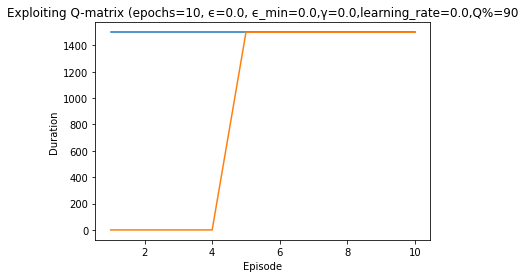

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(
        ep,
        trained=tabularq_run['learner'],
        gamma=0.0,
        learning_rate=0.0,
        exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix"
)

In [10]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL"
)

###### DQL
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:    6.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:   12.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   21.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:   21.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   27.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   27.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:   83.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 1|Iteration 66|reward:   83.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:   92.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 114|reward:   92.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:   98.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 1|Iteration 123|reward:   98.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 152|reward:   98.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 190|reward:   98.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:   98.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:   98.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 260|reward:  198.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 1|Iteration 260|reward:  198.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 1|Iteration 285|reward:  198.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 1|Iteration 288|reward:  207.0|last_reward_at:  260|Elapsed Time: 0:00:00||

Episode 1|Iteration 288|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 1|Iteration 321|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 1|Iteration 342|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:00||

Episode 1|Iteration 361|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 380|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 399|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 418|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 437|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 456|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 464|reward:  207.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 470|reward:  216.0|last_reward_at:  288|Elapsed Time: 0:00:01||

Episode 1|Iteration 470|reward:  216.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 481|reward:  216.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 491|reward:  216.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 499|reward:  216.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 500|reward:  222.0|last_reward_at:  470|Elapsed Time: 0:00:01||

Episode 1|Iteration 500|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 1|Iteration 508|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 1|Iteration 513|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:01||

Episode 1|Iteration 521|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 532|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 542|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 551|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 560|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 570|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 579|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 589|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 598|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 606|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:02||

Episode 1|Iteration 616|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 627|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 636|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 645|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 656|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 665|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 674|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 684|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 693|reward:  222.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 695|reward:  272.0|last_reward_at:  500|Elapsed Time: 0:00:03||

Episode 1|Iteration 695|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:03||

Episode 1|Iteration 703|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:03||

Episode 1|Iteration 712|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 721|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 730|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 741|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 751|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 760|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 770|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 779|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 789|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 798|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:04||

Episode 1|Iteration 808|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 817|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 826|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 836|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 845|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 855|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 865|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 874|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 883|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 893|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:05||

Episode 1|Iteration 902|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 912|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 921|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 931|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 940|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 950|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 957|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 968|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 978|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 988|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:06||

Episode 1|Iteration 998|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1007|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1017|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1025|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1036|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1045|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1055|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1063|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1074|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1083|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:07||

Episode 1|Iteration 1092|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1102|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1111|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1121|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1131|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1140|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1149|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1158|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1168|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1178|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:08||

Episode 1|Iteration 1187|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1197|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1206|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1216|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1225|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1235|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1244|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1254|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1263|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1273|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1283|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:09||

Episode 1|Iteration 1292|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1301|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1311|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1320|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1330|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1340|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1349|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1359|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1368|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1377|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:10||

Episode 1|Iteration 1387|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1396|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1405|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1415|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1425|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1434|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1444|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1453|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1463|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:11||

Episode 1|Iteration 1472|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:12||

Episode 1|Iteration 1482|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:12||

Episode 1|Iteration 1487|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:12||

Episode 1|Iteration 1497|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:12||

Episode 1|Iteration 1500|reward:  272.0|last_reward_at:  695|Elapsed Time: 0:00:12||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/106 (0.02)
    explore-remote: 8/543 (0.01)
    explore-connect: 3/547 (0.01)
    exploit-local: 0/39 (0.00)
    exploit-remote: 0/146 (0.00)
    exploit-connect: 0/106 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 2/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   27.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 19|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 57|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:   27.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:   36.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 69|reward:   36.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:   36.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:   36.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:   86.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:   86.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 105|reward:   86.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 114|reward:   86.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 2|Iteration 123|reward:   86.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 2|Iteration 133|reward:   86.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 2|Iteration 138|reward:  186.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 2|Iteration 138|reward:  186.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 2|Iteration 149|reward:  186.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 2|Iteration 158|reward:  186.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 2|Iteration 164|reward:  192.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 2|Iteration 164|reward:  192.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 2|Iteration 171|reward:  192.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 2|Iteration 175|reward:  201.0|last_reward_at:  164|Elapsed Time: 0:00:01||

Episode 2|Iteration 175|reward:  201.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 2|Iteration 186|reward:  201.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 2|Iteration 196|reward:  201.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 2|Iteration 206|reward:  201.0|last_reward_at:  175|Elapsed Time: 0:00:02||

Episode 2|Iteration 211|reward:  251.0|last_reward_at:  175|Elapsed Time: 0:00:02||

Episode 2|Iteration 211|reward:  251.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 222|reward:  251.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 228|reward:  251.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 234|reward:  251.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 241|reward:  251.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 252|reward:  251.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 253|reward:  260.0|last_reward_at:  211|Elapsed Time: 0:00:02||

Episode 2|Iteration 253|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 2|Iteration 260|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 2|Iteration 266|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 2|Iteration 272|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 2|Iteration 280|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:02||

Episode 2|Iteration 285|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 2|Iteration 294|reward:  260.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 2|Iteration 299|reward:  266.0|last_reward_at:  253|Elapsed Time: 0:00:03||

Episode 2|Iteration 299|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 310|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 321|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 331|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 341|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 352|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 361|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 370|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:03||

Episode 2|Iteration 380|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 390|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 399|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 409|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 418|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 427|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 437|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 447|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 456|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 463|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 474|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:04||

Episode 2|Iteration 485|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 494|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 503|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 513|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 523|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 532|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 540|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 551|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 559|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 570|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:05||

Episode 2|Iteration 577|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 588|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 599|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 608|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 617|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 625|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 636|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 645|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 654|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 663|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:06||

Episode 2|Iteration 673|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:07||

Episode 2|Iteration 684|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:07||

Episode 2|Iteration 694|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:07||

Episode 2|Iteration 702|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:07||

Episode 2|Iteration 712|reward:  266.0|last_reward_at:  299|Elapsed Time: 0:00:07||

Episode 2|Iteration 717|reward:  272.0|last_reward_at:  299|Elapsed Time: 0:00:07||

Episode 2|Iteration 717|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:07||

Episode 2|Iteration 728|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:07||

Episode 2|Iteration 739|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:07||

Episode 2|Iteration 749|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:07||

Episode 2|Iteration 759|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:07||

Episode 2|Iteration 768|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 777|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 787|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 798|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 808|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 817|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 827|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 836|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 844|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 854|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:08||

Episode 2|Iteration 864|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 872|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 882|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 890|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 901|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 911|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 922|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 931|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 939|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:09||

Episode 2|Iteration 949|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 959|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 969|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 978|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 988|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 997|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 1007|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 1017|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 1026|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 1033|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 1043|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:10||

Episode 2|Iteration 1053|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1062|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1071|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1081|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1091|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1101|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1111|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1121|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1128|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:11||

Episode 2|Iteration 1137|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1148|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1159|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1165|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1173|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1182|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1192|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1201|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1211|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:12||

Episode 2|Iteration 1221|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1231|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1242|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1251|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1261|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1271|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1281|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1291|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1302|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1311|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:13||

Episode 2|Iteration 1319|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1328|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1336|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1345|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1355|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1365|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1376|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1385|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1395|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:14||

Episode 2|Iteration 1403|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1413|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1423|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1432|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1443|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1453|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1462|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1470|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1478|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1488|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:15||

Episode 2|Iteration 1499|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:16||

Episode 2|Iteration 1500|reward:  272.0|last_reward_at:  717|Elapsed Time: 0:00:16||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/71 (0.03)
    explore-remote: 6/414 (0.01)
    explore-connect: 1/437 (0.00)
    exploit-local: 0/51 (0.00)
    exploit-remote: 2/390 (0.01)
    exploit-connect: 2/124 (0.02)
  exploit deflected to exploration: 6
  ## Episode: 3/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   21.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   21.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   27.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 22|reward:   27.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   33.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 29|reward:   83.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 38|reward:   83.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:   92.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:   92.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 53|reward:   92.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:   92.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:   98.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 65|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 84|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 95|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 3|Iteration 104|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 114|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 121|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 131|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 142|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 151|reward:   98.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 157|reward:  198.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 157|reward:  198.0|last_reward_at:  157|Elapsed Time: 0:00:01||

Episode 3|Iteration 158|reward:  207.0|last_reward_at:  157|Elapsed Time: 0:00:01||

Episode 3|Iteration 158|reward:  207.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 168|reward:  207.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 178|reward:  207.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 179|reward:  216.0|last_reward_at:  158|Elapsed Time: 0:00:01||

Episode 3|Iteration 179|reward:  216.0|last_reward_at:  179|Elapsed Time: 0:00:01||

Episode 3|Iteration 189|reward:  216.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 3|Iteration 190|reward:  266.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 3|Iteration 190|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 200|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 209|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 216|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 226|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 235|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 245|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 256|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 266|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 273|reward:  266.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 279|reward:  272.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 3|Iteration 279|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:02||

Episode 3|Iteration 290|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 300|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 304|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 314|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 322|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 333|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 340|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 349|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 359|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:03||

Episode 3|Iteration 369|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 379|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 389|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 399|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 408|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 418|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 427|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 437|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 444|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 455|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:04||

Episode 3|Iteration 463|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 473|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 484|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 493|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 503|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 513|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 523|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 532|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 541|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:05||

Episode 3|Iteration 549|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 559|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 569|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 579|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 589|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 594|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 604|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 614|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 624|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 633|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:06||

Episode 3|Iteration 644|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 653|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 663|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 673|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 683|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 693|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 701|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 711|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 719|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 729|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:07||

Episode 3|Iteration 739|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 749|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 759|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 767|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 776|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 786|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 796|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 805|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 813|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:08||

Episode 3|Iteration 824|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 832|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 842|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 851|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 859|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 869|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 879|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 887|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 893|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:09||

Episode 3|Iteration 902|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 909|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 919|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 926|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 931|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 939|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 947|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 956|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 964|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 969|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 977|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:10||

Episode 3|Iteration 987|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 997|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1004|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1014|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1022|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1032|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1041|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1051|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1061|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:11||

Episode 3|Iteration 1071|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1081|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1091|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1100|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1109|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1119|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1128|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1134|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1140|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1149|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:12||

Episode 3|Iteration 1159|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1168|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1176|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1186|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1196|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1206|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1216|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1225|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1235|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1243|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:13||

Episode 3|Iteration 1251|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1261|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1271|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1281|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1290|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1300|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1308|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1317|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1327|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:14||

Episode 3|Iteration 1337|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1345|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1352|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1362|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1368|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1377|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1386|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1396|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1406|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1415|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:15||

Episode 3|Iteration 1425|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1434|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1443|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1452|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1460|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1468|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1478|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1488|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1498|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

Episode 3|Iteration 1500|reward:  272.0|last_reward_at:  279|Elapsed Time: 0:00:16||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/52 (0.04)
    explore-remote: 6/362 (0.02)
    explore-connect: 0/314 (0.00)
    exploit-local: 0/84 (0.00)
    exploit-remote: 2/498 (0.00)
    exploit-connect: 3/177 (0.02)
  exploit deflected to exploration: 4
  ## Episode: 4/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   12.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 12|reward:   21.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   21.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   71.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 4|Iteration 27|reward:   71.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:   77.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 4|Iteration 32|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 46|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 70|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 76|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 4|Iteration 90|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 100|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 108|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 114|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 121|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 131|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 139|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 144|reward:   77.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 146|reward:   83.0|last_reward_at:   32|Elapsed Time: 0:00:01||

Episode 4|Iteration 146|reward:   83.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 4|Iteration 155|reward:   83.0|last_reward_at:  146|Elapsed Time: 0:00:01||

Episode 4|Iteration 166|reward:   83.0|last_reward_at:  146|Elapsed Time: 0:00:02||

Episode 4|Iteration 176|reward:   83.0|last_reward_at:  146|Elapsed Time: 0:00:02||

Episode 4|Iteration 183|reward:   83.0|last_reward_at:  146|Elapsed Time: 0:00:02||

Episode 4|Iteration 190|reward:   83.0|last_reward_at:  146|Elapsed Time: 0:00:02||

Episode 4|Iteration 191|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:02||

Episode 4|Iteration 191|reward:   92.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 4|Iteration 201|reward:   92.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 4|Iteration 209|reward:   92.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 4|Iteration 219|reward:   92.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 4|Iteration 222|reward:   98.0|last_reward_at:  191|Elapsed Time: 0:00:02||

Episode 4|Iteration 222|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:02||

Episode 4|Iteration 231|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:02||

Episode 4|Iteration 241|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:02||

Episode 4|Iteration 252|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:02||

Episode 4|Iteration 261|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 271|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 281|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 289|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 297|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 304|reward:   98.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 308|reward:  107.0|last_reward_at:  222|Elapsed Time: 0:00:03||

Episode 4|Iteration 308|reward:  107.0|last_reward_at:  308|Elapsed Time: 0:00:03||

Episode 4|Iteration 318|reward:  107.0|last_reward_at:  308|Elapsed Time: 0:00:03||

Episode 4|Iteration 319|reward:  157.0|last_reward_at:  308|Elapsed Time: 0:00:03||

Episode 4|Iteration 319|reward:  157.0|last_reward_at:  319|Elapsed Time: 0:00:03||

Episode 4|Iteration 329|reward:  157.0|last_reward_at:  319|Elapsed Time: 0:00:03||

Episode 4|Iteration 331|reward:  257.0|last_reward_at:  319|Elapsed Time: 0:00:03||

Episode 4|Iteration 331|reward:  257.0|last_reward_at:  331|Elapsed Time: 0:00:03||

Episode 4|Iteration 335|reward:  266.0|last_reward_at:  331|Elapsed Time: 0:00:03||

Episode 4|Iteration 335|reward:  266.0|last_reward_at:  335|Elapsed Time: 0:00:03||

Episode 4|Iteration 342|reward:  266.0|last_reward_at:  335|Elapsed Time: 0:00:03||

Episode 4|Iteration 351|reward:  266.0|last_reward_at:  335|Elapsed Time: 0:00:04||

Episode 4|Iteration 356|reward:  272.0|last_reward_at:  335|Elapsed Time: 0:00:04||

Episode 4|Iteration 356|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 366|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 373|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 380|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 389|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 398|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 408|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 418|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 427|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:04||

Episode 4|Iteration 437|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 446|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 456|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 465|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 475|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 484|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 494|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 503|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 512|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 521|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:05||

Episode 4|Iteration 531|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 540|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 549|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 558|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 566|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 576|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 586|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 596|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 606|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:06||

Episode 4|Iteration 616|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 626|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 634|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 644|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 653|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 662|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 672|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 680|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 690|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:07||

Episode 4|Iteration 700|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 709|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 719|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 729|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 739|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 749|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 758|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 768|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 778|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:08||

Episode 4|Iteration 787|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 797|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 806|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 813|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 819|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 826|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 836|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 842|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 851|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 855|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:09||

Episode 4|Iteration 861|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 870|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 880|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 890|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 899|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 908|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 918|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 925|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 931|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 939|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:10||

Episode 4|Iteration 949|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 960|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 967|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 977|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 987|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 997|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 1005|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 1013|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 1022|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:11||

Episode 4|Iteration 1031|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1041|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1051|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1061|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1071|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1081|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1091|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1099|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1107|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1114|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:12||

Episode 4|Iteration 1121|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1130|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1139|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1149|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1156|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1166|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1174|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1183|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1192|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1197|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:13||

Episode 4|Iteration 1201|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1211|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1216|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1224|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1233|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1243|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1252|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1260|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1270|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1280|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:14||

Episode 4|Iteration 1290|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1300|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1310|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1318|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1326|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1335|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1343|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1349|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1356|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:15||

Episode 4|Iteration 1366|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1376|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1386|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1395|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1404|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1414|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1424|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1430|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1439|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1444|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:16||

Episode 4|Iteration 1453|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

Episode 4|Iteration 1463|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

Episode 4|Iteration 1472|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

Episode 4|Iteration 1479|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

Episode 4|Iteration 1489|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

Episode 4|Iteration 1498|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

Episode 4|Iteration 1500|reward:  272.0|last_reward_at:  356|Elapsed Time: 0:00:17||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/39 (0.03)
    explore-remote: 2/285 (0.01)
    explore-connect: 0/274 (0.00)
    exploit-local: 1/108 (0.01)
    exploit-remote: 6/604 (0.01)
    exploit-connect: 3/177 (0.02)
  exploit deflected to exploration: 31
  ## Episode: 5/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   21.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   21.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   71.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   71.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:   71.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 37|reward:   71.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:   71.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:   77.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:   77.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:   83.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 5|Iteration 58|reward:   83.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   83.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 75|reward:   83.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 5|Iteration 81|reward:   83.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 5|Iteration 89|reward:   83.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 5|Iteration 95|reward:   83.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 5|Iteration 98|reward:   89.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 5|Iteration 98|reward:   89.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 5|Iteration 106|reward:   89.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 5|Iteration 114|reward:   89.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 5|Iteration 116|reward:   98.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 5|Iteration 116|reward:   98.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 125|reward:  198.0|last_reward_at:  116|Elapsed Time: 0:00:01||

Episode 5|Iteration 125|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 5|Iteration 133|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 5|Iteration 139|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 5|Iteration 145|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 5|Iteration 152|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 159|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 166|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 171|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 180|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 190|reward:  198.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 190|reward:  207.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 5|Iteration 190|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 5|Iteration 200|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 5|Iteration 209|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 5|Iteration 218|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 5|Iteration 228|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 5|Iteration 234|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:02||

Episode 5|Iteration 244|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 5|Iteration 255|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 5|Iteration 265|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 5|Iteration 275|reward:  207.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 5|Iteration 280|reward:  216.0|last_reward_at:  190|Elapsed Time: 0:00:03||

Episode 5|Iteration 280|reward:  216.0|last_reward_at:  280|Elapsed Time: 0:00:03||

Episode 5|Iteration 290|reward:  216.0|last_reward_at:  280|Elapsed Time: 0:00:03||

Episode 5|Iteration 298|reward:  266.0|last_reward_at:  280|Elapsed Time: 0:00:03||

Episode 5|Iteration 298|reward:  266.0|last_reward_at:  298|Elapsed Time: 0:00:03||

Episode 5|Iteration 304|reward:  266.0|last_reward_at:  298|Elapsed Time: 0:00:03||

Episode 5|Iteration 312|reward:  272.0|last_reward_at:  298|Elapsed Time: 0:00:03||

Episode 5|Iteration 312|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:03||

Episode 5|Iteration 320|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:03||

Episode 5|Iteration 330|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:03||

Episode 5|Iteration 340|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 348|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 354|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 361|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 367|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 376|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 386|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 395|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 405|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:04||

Episode 5|Iteration 412|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 418|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 427|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 436|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 446|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 456|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 465|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 474|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 482|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 492|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:05||

Episode 5|Iteration 502|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 512|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 521|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 529|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 538|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 548|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 557|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 566|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 576|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:06||

Episode 5|Iteration 586|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 596|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 607|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 614|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 620|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 627|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 636|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 646|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 654|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 664|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:07||

Episode 5|Iteration 674|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 684|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 692|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 702|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 708|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 718|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 728|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 737|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 741|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 749|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:08||

Episode 5|Iteration 758|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 766|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 774|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 779|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 788|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 798|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 807|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 816|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 823|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:09||

Episode 5|Iteration 833|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 843|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 853|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 863|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 869|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 877|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 885|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 893|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 902|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 911|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:10||

Episode 5|Iteration 921|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 930|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 940|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 949|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 956|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 964|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 971|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 981|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 988|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 997|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:11||

Episode 5|Iteration 1007|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1016|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1024|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1033|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1043|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1053|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1063|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1073|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1083|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:12||

Episode 5|Iteration 1089|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1099|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1108|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1118|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1127|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1136|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1146|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1156|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1165|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1174|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:13||

Episode 5|Iteration 1184|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1192|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1202|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1212|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1220|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1229|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1235|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1242|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1252|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1262|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:14||

Episode 5|Iteration 1270|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1280|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1288|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1296|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1305|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1311|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1320|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1330|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1338|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1347|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:15||

Episode 5|Iteration 1357|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1367|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1377|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1387|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1394|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1404|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1414|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1424|reward:  272.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1426|reward:  372.0|last_reward_at:  312|Elapsed Time: 0:00:16||

Episode 5|Iteration 1426|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:16||

Episode 5|Iteration 1430|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:16||

Episode 5|Iteration 1433|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1443|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1447|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1451|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1457|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1463|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1471|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1479|reward:  372.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1480|reward:  381.0|last_reward_at: 1426|Elapsed Time: 0:00:17||

Episode 5|Iteration 1480|reward:  381.0|last_reward_at: 1480|Elapsed Time: 0:00:17||

Episode 5|Iteration 1490|reward:  381.0|last_reward_at: 1480|Elapsed Time: 0:00:17||

Episode 5|Iteration 1495|reward:  381.0|last_reward_at: 1480|Elapsed Time: 0:00:18||

Episode 5|Iteration 1500|reward:  381.0|last_reward_at: 1480|Elapsed Time: 0:00:18||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/40 (0.05)
    explore-remote: 4/199 (0.02)
    explore-connect: 1/224 (0.00)
    exploit-local: 1/111 (0.01)
    exploit-remote: 4/722 (0.01)
    exploit-connect: 3/189 (0.02)
  exploit deflected to exploration: 41
  ## Episode: 6/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   21.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 15|reward:   21.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:   27.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 6|Iteration 20|reward:   27.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:   27.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  127.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 6|Iteration 30|reward:  127.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  136.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 6|Iteration 31|reward:  136.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 38|reward:  136.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 44|reward:  236.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 6|Iteration 44|reward:  236.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  245.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  245.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 56|reward:  254.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 56|reward:  254.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  254.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  260.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 6|Iteration 68|reward:  260.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  260.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 85|reward:  260.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 6|Iteration 94|reward:  260.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 6|Iteration 102|reward:  310.0|last_reward_at:   68|Elapsed Time: 0:00:01||

Episode 6|Iteration 102|reward:  310.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 109|reward:  360.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 6|Iteration 109|reward:  360.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 6|Iteration 116|reward:  360.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 6|Iteration 121|reward:  360.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 6|Iteration 125|reward:  360.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 6|Iteration 128|reward:  360.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 6|Iteration 129|reward:  369.0|last_reward_at:  109|Elapsed Time: 0:00:01||

Episode 6|Iteration 129|reward:  369.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 6|Iteration 137|reward:  369.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 6|Iteration 140|reward:  419.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 6|Iteration 140|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 6|Iteration 143|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 149|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 152|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 156|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 166|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 171|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 173|reward:  419.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 174|reward:  425.0|last_reward_at:  140|Elapsed Time: 0:00:02||

Episode 6|Iteration 174|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 6|Iteration 181|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 6|Iteration 187|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 6|Iteration 197|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 203|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 209|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 212|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 221|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 227|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 232|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 237|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 244|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 6|Iteration 248|reward:  425.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 6|Iteration 254|reward:  431.0|last_reward_at:  174|Elapsed Time: 0:00:04||

Episode 6|Iteration 254|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 260|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 263|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 266|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 272|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 279|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 285|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 294|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 300|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:04||

Episode 6|Iteration 304|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 309|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 316|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 322|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 326|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 335|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 338|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 342|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 348|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 357|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:05||

Episode 6|Iteration 364|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 369|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 373|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 379|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 384|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 388|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 395|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 400|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:06||

Episode 6|Iteration 403|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 410|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 418|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 421|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 428|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 433|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 437|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 441|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 447|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 455|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:07||

Episode 6|Iteration 460|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 464|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 473|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 480|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 485|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 490|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 497|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 499|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:08||

Episode 6|Iteration 505|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 508|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 513|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 518|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 527|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 534|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 540|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 546|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:09||

Episode 6|Iteration 556|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 562|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 566|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 575|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 581|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 587|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 590|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 599|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 605|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:10||

Episode 6|Iteration 614|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 623|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 627|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 631|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 636|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 644|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 651|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 661|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 665|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 669|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:11||

Episode 6|Iteration 676|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 680|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 687|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 696|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 698|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 703|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 706|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 709|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:12||

Episode 6|Iteration 719|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 723|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 729|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 738|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 745|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 754|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 760|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 768|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 774|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:13||

Episode 6|Iteration 777|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 787|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 790|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 796|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 805|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 810|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 813|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 821|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:14||

Episode 6|Iteration 826|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 831|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 838|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 844|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 850|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 855|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 860|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 865|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 871|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 874|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:15||

Episode 6|Iteration 877|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 882|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 889|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 895|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 902|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 908|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 910|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 912|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:16||

Episode 6|Iteration 918|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 923|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 928|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 936|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 944|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 950|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 955|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 962|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 969|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 972|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:17||

Episode 6|Iteration 981|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 988|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 993|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 999|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 1007|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 1012|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 1014|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 1017|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 1020|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:18||

Episode 6|Iteration 1025|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1032|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1036|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1042|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1048|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1056|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1061|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1067|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1071|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:19||

Episode 6|Iteration 1078|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1081|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1091|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1097|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1107|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1116|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1121|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1125|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1129|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:20||

Episode 6|Iteration 1133|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1139|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1145|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1153|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1158|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1162|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1167|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1176|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1183|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:21||

Episode 6|Iteration 1187|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1193|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1199|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1204|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1211|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1217|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1223|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1226|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1235|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1238|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:22||

Episode 6|Iteration 1243|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1251|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1257|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1263|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1267|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1272|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1275|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1281|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:23||

Episode 6|Iteration 1286|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1289|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1292|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1298|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1301|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1311|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1320|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1326|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1330|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1337|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1343|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:24||

Episode 6|Iteration 1348|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1354|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1360|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1366|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1372|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1378|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1383|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1386|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:25||

Episode 6|Iteration 1390|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1395|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1405|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1410|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1419|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1425|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1429|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1439|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1444|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1446|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:26||

Episode 6|Iteration 1451|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1455|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1459|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1465|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1473|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1478|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1488|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1496|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

Episode 6|Iteration 1500|reward:  431.0|last_reward_at:  254|Elapsed Time: 0:00:27||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/45 (0.06)
    explore-remote: 2/249 (0.01)
    explore-connect: 0/248 (0.00)
    exploit-local: 0/189 (0.00)
    exploit-remote: 6/742 (0.01)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 175
  ## Episode: 7/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 7|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   12.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:   21.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 19|reward:   21.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   71.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 29|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 36|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 41|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 51|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 69|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 76|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 82|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 90|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 95|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 101|reward:   71.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 107|reward:   77.0|last_reward_at:   21|Elapsed Time: 0:00:01||

Episode 7|Iteration 107|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 7|Iteration 114|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 7|Iteration 122|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 7|Iteration 131|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 7|Iteration 140|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 7|Iteration 149|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:01||

Episode 7|Iteration 157|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 7|Iteration 166|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 7|Iteration 171|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 7|Iteration 179|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 7|Iteration 188|reward:   77.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 7|Iteration 189|reward:   83.0|last_reward_at:  107|Elapsed Time: 0:00:02||

Episode 7|Iteration 189|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 7|Iteration 200|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 7|Iteration 209|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 7|Iteration 217|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 7|Iteration 223|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 7|Iteration 228|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:02||

Episode 7|Iteration 233|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 239|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 247|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 252|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 258|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 266|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 273|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 280|reward:   83.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 282|reward:   89.0|last_reward_at:  189|Elapsed Time: 0:00:03||

Episode 7|Iteration 282|reward:   89.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 7|Iteration 283|reward:   98.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 7|Iteration 283|reward:   98.0|last_reward_at:  283|Elapsed Time: 0:00:03||

Episode 7|Iteration 284|reward:  107.0|last_reward_at:  283|Elapsed Time: 0:00:03||

Episode 7|Iteration 284|reward:  107.0|last_reward_at:  284|Elapsed Time: 0:00:03||

Episode 7|Iteration 292|reward:  107.0|last_reward_at:  284|Elapsed Time: 0:00:03||

Episode 7|Iteration 301|reward:  107.0|last_reward_at:  284|Elapsed Time: 0:00:04||

Episode 7|Iteration 308|reward:  107.0|last_reward_at:  284|Elapsed Time: 0:00:04||

Episode 7|Iteration 318|reward:  107.0|last_reward_at:  284|Elapsed Time: 0:00:04||

Episode 7|Iteration 320|reward:  113.0|last_reward_at:  284|Elapsed Time: 0:00:04||

Episode 7|Iteration 320|reward:  113.0|last_reward_at:  320|Elapsed Time: 0:00:04||

Episode 7|Iteration 328|reward:  113.0|last_reward_at:  320|Elapsed Time: 0:00:04||

Episode 7|Iteration 329|reward:  163.0|last_reward_at:  320|Elapsed Time: 0:00:04||

Episode 7|Iteration 329|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:04||

Episode 7|Iteration 337|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:04||

Episode 7|Iteration 347|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:04||

Episode 7|Iteration 354|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:04||

Episode 7|Iteration 361|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:04||

Episode 7|Iteration 368|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:04||

Episode 7|Iteration 377|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:05||

Episode 7|Iteration 383|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:05||

Episode 7|Iteration 390|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:05||

Episode 7|Iteration 399|reward:  163.0|last_reward_at:  329|Elapsed Time: 0:00:05||

Episode 7|Iteration 402|reward:  263.0|last_reward_at:  329|Elapsed Time: 0:00:05||

Episode 7|Iteration 402|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:05||

Episode 7|Iteration 408|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:05||

Episode 7|Iteration 418|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:05||

Episode 7|Iteration 424|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:05||

Episode 7|Iteration 433|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:05||

Episode 7|Iteration 437|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:05||

Episode 7|Iteration 442|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 446|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 455|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 464|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 471|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 475|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 484|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 491|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 499|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:06||

Episode 7|Iteration 504|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:07||

Episode 7|Iteration 510|reward:  263.0|last_reward_at:  402|Elapsed Time: 0:00:07||

Episode 7|Iteration 518|reward:  272.0|last_reward_at:  402|Elapsed Time: 0:00:07||

Episode 7|Iteration 518|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 528|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 533|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 543|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 551|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 557|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 564|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 570|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 578|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 7|Iteration 587|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 597|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 607|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 617|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 627|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 636|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 643|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 648|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 655|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:08||

Episode 7|Iteration 663|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:09||

Episode 7|Iteration 671|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:09||

Episode 7|Iteration 676|reward:  272.0|last_reward_at:  518|Elapsed Time: 0:00:09||

Episode 7|Iteration 682|reward:  372.0|last_reward_at:  518|Elapsed Time: 0:00:09||

Episode 7|Iteration 682|reward:  372.0|last_reward_at:  682|Elapsed Time: 0:00:09||

Episode 7|Iteration 683|reward:  381.0|last_reward_at:  682|Elapsed Time: 0:00:09||

Episode 7|Iteration 683|reward:  381.0|last_reward_at:  683|Elapsed Time: 0:00:09||

Episode 7|Iteration 684|reward:  431.0|last_reward_at:  683|Elapsed Time: 0:00:09||

Episode 7|Iteration 684|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:09||

Episode 7|Iteration 688|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:09||

Episode 7|Iteration 696|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:09||

Episode 7|Iteration 701|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:09||

Episode 7|Iteration 709|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:09||

Episode 7|Iteration 714|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:09||

Episode 7|Iteration 722|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 724|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 728|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 733|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 738|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 745|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 754|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 760|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 765|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:10||

Episode 7|Iteration 772|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 779|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 783|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 785|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 791|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 798|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 801|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 807|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 812|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:11||

Episode 7|Iteration 816|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 823|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 826|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 833|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 839|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 846|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 852|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 855|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 858|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:12||

Episode 7|Iteration 864|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 870|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 873|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 879|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 886|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 893|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 900|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 908|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:13||

Episode 7|Iteration 911|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 915|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 922|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 926|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 932|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 939|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 944|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 950|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 955|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 961|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:14||

Episode 7|Iteration 963|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 966|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 971|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 977|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 983|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 988|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 992|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 998|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 1007|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:15||

Episode 7|Iteration 1011|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1015|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1023|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1032|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1039|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1045|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1051|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1059|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1068|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:16||

Episode 7|Iteration 1077|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1082|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1088|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1092|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1098|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1102|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1105|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1113|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1120|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:17||

Episode 7|Iteration 1125|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1128|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1133|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1139|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1145|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1148|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1154|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1159|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1165|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:18||

Episode 7|Iteration 1170|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1178|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1183|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1189|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1195|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1202|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1211|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1216|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1224|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:19||

Episode 7|Iteration 1229|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1235|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1244|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1248|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1253|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1257|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1260|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1266|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:20||

Episode 7|Iteration 1272|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1281|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1284|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1289|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1292|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1296|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1306|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1311|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1320|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1325|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:21||

Episode 7|Iteration 1330|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1335|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1338|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1341|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1346|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1356|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1358|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1363|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1371|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:22||

Episode 7|Iteration 1375|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1384|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1390|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1392|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1397|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1405|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1410|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1416|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:23||

Episode 7|Iteration 1419|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1424|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1429|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1434|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1443|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1446|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1454|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1459|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1463|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:24||

Episode 7|Iteration 1466|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1471|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1475|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1481|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1486|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1491|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1497|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

Episode 7|Iteration 1500|reward:  431.0|last_reward_at:  684|Elapsed Time: 0:00:25||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/42 (0.02)
    explore-remote: 3/236 (0.01)
    explore-connect: 0/251 (0.00)
    exploit-local: 2/124 (0.02)
    exploit-remote: 5/802 (0.01)
    exploit-connect: 5/29 (0.15)
  exploit deflected to exploration: 226
  ## Episode: 8/20 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   12.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 16|reward:   12.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 20|reward:   18.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:   27.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 8|Iteration 22|reward:   27.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   36.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:   36.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 43|reward:   86.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:   92.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 8|Iteration 45|reward:   92.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 55|reward:   92.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:   92.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward:  192.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 8|Iteration 72|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 8|Iteration 80|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 8|Iteration 89|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 8|Iteration 94|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 8|Iteration 100|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 8|Iteration 109|reward:  192.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 8|Iteration 110|reward:  201.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 8|Iteration 110|reward:  201.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 8|Iteration 117|reward:  210.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 8|Iteration 117|reward:  210.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 8|Iteration 118|reward:  260.0|last_reward_at:  117|Elapsed Time: 0:00:01||

Episode 8|Iteration 118|reward:  260.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 8|Iteration 123|reward:  260.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 8|Iteration 124|reward:  266.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 8|Iteration 124|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 131|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 139|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 147|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:01||

Episode 8|Iteration 157|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 167|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 171|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 176|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 185|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 195|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 202|reward:  266.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 208|reward:  272.0|last_reward_at:  124|Elapsed Time: 0:00:02||

Episode 8|Iteration 208|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 8|Iteration 218|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 8|Iteration 227|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 8|Iteration 235|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 244|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 251|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 257|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 266|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 274|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 280|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 287|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 296|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:03||

Episode 8|Iteration 304|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 313|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 318|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 327|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 335|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 342|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 350|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 360|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 370|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 378|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:04||

Episode 8|Iteration 388|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 398|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 404|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 414|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 418|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 427|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 437|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 446|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 455|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 465|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:05||

Episode 8|Iteration 475|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 484|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 493|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 503|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 508|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 513|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 521|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 531|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 539|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 549|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:06||

Episode 8|Iteration 556|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:07||

Episode 8|Iteration 563|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:07||

Episode 8|Iteration 570|reward:  272.0|last_reward_at:  208|Elapsed Time: 0:00:07||

Episode 8|Iteration 574|reward:  372.0|last_reward_at:  208|Elapsed Time: 0:00:07||

Episode 8|Iteration 574|reward:  372.0|last_reward_at:  574|Elapsed Time: 0:00:07||

Episode 8|Iteration 577|reward:  372.0|last_reward_at:  574|Elapsed Time: 0:00:07||

Episode 8|Iteration 583|reward:  381.0|last_reward_at:  574|Elapsed Time: 0:00:07||

Episode 8|Iteration 583|reward:  381.0|last_reward_at:  583|Elapsed Time: 0:00:07||

Episode 8|Iteration 584|reward:  431.0|last_reward_at:  583|Elapsed Time: 0:00:07||

Episode 8|Iteration 584|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:07||

Episode 8|Iteration 589|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:07||

Episode 8|Iteration 594|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:07||

Episode 8|Iteration 598|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:07||

Episode 8|Iteration 603|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 613|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 618|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 624|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 629|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 639|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 646|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 650|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 656|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:08||

Episode 8|Iteration 664|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 668|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 671|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 677|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 684|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 688|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 692|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 697|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 700|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:09||

Episode 8|Iteration 705|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 714|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 719|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 722|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 726|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 732|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 738|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 744|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 754|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:10||

Episode 8|Iteration 760|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 769|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 775|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 782|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 786|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 792|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 798|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 806|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 810|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:11||

Episode 8|Iteration 815|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 823|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 829|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 836|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 839|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 844|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 854|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 856|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 861|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:12||

Episode 8|Iteration 867|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 872|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 879|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 885|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 893|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 899|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 905|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 908|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 917|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:13||

Episode 8|Iteration 926|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 931|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 940|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 948|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 955|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 961|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 969|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 972|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 979|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:14||

Episode 8|Iteration 984|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 987|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 993|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 1001|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 1007|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 1015|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 1021|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 1027|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:15||

Episode 8|Iteration 1032|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1041|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1050|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1052|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1057|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1064|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1065|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1069|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1075|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1079|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:16||

Episode 8|Iteration 1082|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1092|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1097|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1101|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1106|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1115|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1121|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1128|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1137|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:17||

Episode 8|Iteration 1139|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1143|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1149|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1155|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1159|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1161|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1166|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1171|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1174|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:18||

Episode 8|Iteration 1178|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1186|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1191|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1197|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1201|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1207|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1213|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1217|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1225|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:19||

Episode 8|Iteration 1231|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1240|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1247|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1254|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1260|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1267|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1273|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1277|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1279|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1286|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:20||

Episode 8|Iteration 1292|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1297|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1305|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1310|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1316|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1321|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1325|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1330|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1337|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1340|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:21||

Episode 8|Iteration 1346|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1352|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1359|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1368|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1372|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1377|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1383|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1391|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1401|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:22||

Episode 8|Iteration 1406|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1410|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1415|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1421|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1430|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1439|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1444|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1448|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1455|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1458|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:23||

Episode 8|Iteration 1462|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:24||

Episode 8|Iteration 1471|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:24||

Episode 8|Iteration 1481|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:24||

Episode 8|Iteration 1488|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:24||

Episode 8|Iteration 1494|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:24||

Episode 8|Iteration 1500|reward:  431.0|last_reward_at:  584|Elapsed Time: 0:00:24||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/37 (0.03)
    explore-remote: 2/210 (0.01)
    explore-connect: 0/167 (0.00)
    exploit-local: 2/138 (0.01)
    exploit-remote: 6/876 (0.01)
    exploit-connect: 5/56 (0.08)
  exploit deflected to exploration: 145
  ## Episode: 9/20 'DQL' ϵ=0.1726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 22|reward:   18.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:   27.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 9|Iteration 29|reward:   27.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   36.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   36.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  136.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  136.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  186.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 42|reward:  186.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 51|reward:  186.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  195.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:  195.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 61|reward:  195.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 70|reward:  195.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 76|reward:  195.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:  195.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 9|Iteration 86|reward:  201.0|last_reward_at:   54|Elapsed Time: 0:00:01||

Episode 9|Iteration 86|reward:  201.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 9|Iteration 92|reward:  201.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 9|Iteration 101|reward:  201.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 9|Iteration 107|reward:  201.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 9|Iteration 114|reward:  201.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 9|Iteration 122|reward:  207.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 9|Iteration 122|reward:  207.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 9|Iteration 129|reward:  216.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 9|Iteration 129|reward:  216.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 9|Iteration 133|reward:  216.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 9|Iteration 141|reward:  216.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 9|Iteration 151|reward:  216.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 9|Iteration 155|reward:  266.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 9|Iteration 155|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:00:01||

Episode 9|Iteration 165|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:00:02||

Episode 9|Iteration 171|reward:  266.0|last_reward_at:  155|Elapsed Time: 0:00:02||

Episode 9|Iteration 172|reward:  366.0|last_reward_at:  155|Elapsed Time: 0:00:02||

Episode 9|Iteration 172|reward:  366.0|last_reward_at:  172|Elapsed Time: 0:00:02||

Episode 9|Iteration 173|reward:  375.0|last_reward_at:  172|Elapsed Time: 0:00:02||

Episode 9|Iteration 173|reward:  375.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 9|Iteration 179|reward:  425.0|last_reward_at:  173|Elapsed Time: 0:00:02||

Episode 9|Iteration 179|reward:  425.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 9|Iteration 188|reward:  425.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 9|Iteration 193|reward:  431.0|last_reward_at:  179|Elapsed Time: 0:00:02||

Episode 9|Iteration 193|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 197|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 206|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 209|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 215|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 225|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 228|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:02||

Episode 9|Iteration 233|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 236|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 239|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 244|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 247|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 255|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 258|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 265|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 268|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:03||

Episode 9|Iteration 272|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 279|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 283|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 285|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 289|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 294|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 301|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 309|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 314|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:04||

Episode 9|Iteration 321|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 327|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 332|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 338|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 342|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 351|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 354|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 360|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 370|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:05||

Episode 9|Iteration 376|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 384|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 392|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 396|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 403|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 409|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 412|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 418|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 423|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:06||

Episode 9|Iteration 433|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 437|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 445|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 449|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 456|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 461|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 466|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 474|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 479|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 483|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:07||

Episode 9|Iteration 488|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 494|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 499|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 504|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 507|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 513|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 521|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 527|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 530|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 534|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:08||

Episode 9|Iteration 541|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 547|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 556|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 561|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 569|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 579|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 588|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 592|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:09||

Episode 9|Iteration 600|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 606|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 616|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 624|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 630|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 632|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 636|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 639|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 643|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:10||

Episode 9|Iteration 646|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 650|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 656|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 663|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 672|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 680|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 687|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 693|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 702|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:11||

Episode 9|Iteration 708|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 712|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 717|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 719|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 728|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 736|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 745|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 750|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 758|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:12||

Episode 9|Iteration 763|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 772|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 779|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 784|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 793|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 798|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 804|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 808|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 812|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 818|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:13||

Episode 9|Iteration 822|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 830|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 836|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 838|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 844|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 849|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 855|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 859|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 869|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 878|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:14||

Episode 9|Iteration 886|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 893|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 898|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 903|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 911|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 916|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 925|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 930|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 936|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:15||

Episode 9|Iteration 941|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 950|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 955|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 960|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 966|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 973|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 979|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 981|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 985|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 991|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:16||

Episode 9|Iteration 998|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1001|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1005|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1011|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1016|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1023|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1030|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1037|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:17||

Episode 9|Iteration 1043|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1049|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1057|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1060|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1064|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1070|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1075|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1082|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1092|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1099|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:18||

Episode 9|Iteration 1109|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1116|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1125|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1129|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1136|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1144|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1146|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1151|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:19||

Episode 9|Iteration 1158|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1164|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1169|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1173|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1182|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1185|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1193|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1201|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:20||

Episode 9|Iteration 1207|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1211|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1217|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1226|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1231|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1234|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1244|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1253|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1263|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:21||

Episode 9|Iteration 1272|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1279|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1282|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1287|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1292|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1298|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1302|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1308|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1311|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:22||

Episode 9|Iteration 1320|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1325|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1330|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1334|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1342|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1347|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1356|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1363|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1366|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1375|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:23||

Episode 9|Iteration 1377|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1383|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1387|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1389|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1395|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1404|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1413|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1418|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1423|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:24||

Episode 9|Iteration 1433|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1443|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1449|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1456|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1463|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1467|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1472|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1478|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1481|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:25||

Episode 9|Iteration 1488|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:26||

Episode 9|Iteration 1494|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:26||

Episode 9|Iteration 1500|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:26||

Episode 9|Iteration 1500|reward:  431.0|last_reward_at:  193|Elapsed Time: 0:00:26||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/46 (0.04)
    explore-remote: 1/177 (0.01)
    explore-connect: 0/158 (0.00)
    exploit-local: 1/171 (0.01)
    exploit-remote: 7/920 (0.01)
    exploit-connect: 5/12 (0.29)
  exploit deflected to exploration: 149
  ## Episode: 10/20 'DQL' ϵ=0.1538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:   18.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   27.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   27.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:   77.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 10|Iteration 29|reward:   77.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   83.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 10|Iteration 36|reward:   83.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 42|reward:   83.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 50|reward:   83.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:   83.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 63|reward:   83.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:   92.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:   92.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:   92.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 10|Iteration 85|reward:   92.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 10|Iteration 95|reward:   92.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 10|Iteration 102|reward:   98.0|last_reward_at:   67|Elapsed Time: 0:00:01||

Episode 10|Iteration 102|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 112|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 121|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 131|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 141|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 150|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 159|reward:   98.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 162|reward:  198.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 10|Iteration 162|reward:  198.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 10|Iteration 168|reward:  198.0|last_reward_at:  162|Elapsed Time: 0:00:02||

Episode 10|Iteration 174|reward:  207.0|last_reward_at:  162|Elapsed Time: 0:00:02||

Episode 10|Iteration 174|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 184|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 190|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 196|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 204|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 209|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 217|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 225|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 231|reward:  207.0|last_reward_at:  174|Elapsed Time: 0:00:02||

Episode 10|Iteration 237|reward:  216.0|last_reward_at:  174|Elapsed Time: 0:00:03||

Episode 10|Iteration 237|reward:  216.0|last_reward_at:  237|Elapsed Time: 0:00:03||

Episode 10|Iteration 241|reward:  266.0|last_reward_at:  237|Elapsed Time: 0:00:03||

Episode 10|Iteration 241|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 247|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 253|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 261|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 268|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 275|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 285|reward:  266.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 290|reward:  366.0|last_reward_at:  241|Elapsed Time: 0:00:03||

Episode 10|Iteration 290|reward:  366.0|last_reward_at:  290|Elapsed Time: 0:00:03||

Episode 10|Iteration 293|reward:  372.0|last_reward_at:  290|Elapsed Time: 0:00:03||

Episode 10|Iteration 293|reward:  372.0|last_reward_at:  293|Elapsed Time: 0:00:03||

Episode 10|Iteration 303|reward:  372.0|last_reward_at:  293|Elapsed Time: 0:00:03||

Episode 10|Iteration 304|reward:  381.0|last_reward_at:  293|Elapsed Time: 0:00:03||

Episode 10|Iteration 304|reward:  381.0|last_reward_at:  304|Elapsed Time: 0:00:03||

Episode 10|Iteration 308|reward:  431.0|last_reward_at:  304|Elapsed Time: 0:00:03||

Episode 10|Iteration 308|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:03||

Episode 10|Iteration 312|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 321|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 326|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 329|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 338|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 342|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 343|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 349|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 359|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:04||

Episode 10|Iteration 367|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 372|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 380|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 386|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 393|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 396|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 406|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 413|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:05||

Episode 10|Iteration 417|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 423|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 430|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 435|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 441|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 451|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 454|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 458|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 463|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:06||

Episode 10|Iteration 473|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 475|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 480|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 485|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 491|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 498|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 503|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 511|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 517|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:07||

Episode 10|Iteration 522|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 527|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 536|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 541|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 547|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 551|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 560|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 564|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 570|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:08||

Episode 10|Iteration 574|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 584|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 587|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 593|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 596|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 604|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 611|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 621|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:09||

Episode 10|Iteration 627|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 634|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 642|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 649|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 655|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 663|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 667|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 672|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:10||

Episode 10|Iteration 678|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 683|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 689|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 695|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 703|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 712|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 722|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 731|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 741|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 749|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:11||

Episode 10|Iteration 753|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 758|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 768|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 777|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 781|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 784|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 793|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 798|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:12||

Episode 10|Iteration 806|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 810|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 816|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 824|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 834|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 836|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 845|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 855|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 861|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:13||

Episode 10|Iteration 871|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 880|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 889|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 898|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 904|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 912|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 917|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 920|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 925|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:14||

Episode 10|Iteration 930|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 936|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 942|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 950|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 956|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 964|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 974|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 978|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 982|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:15||

Episode 10|Iteration 986|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 992|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 995|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1000|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1007|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1011|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1017|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1020|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1025|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:16||

Episode 10|Iteration 1031|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1033|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1041|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1051|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1057|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1064|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1067|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1073|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1079|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1082|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:17||

Episode 10|Iteration 1088|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1092|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1098|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1102|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1106|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1112|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1117|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1123|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:18||

Episode 10|Iteration 1131|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1136|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1139|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1149|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1154|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1159|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1168|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1174|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1178|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:19||

Episode 10|Iteration 1184|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1187|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1190|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1195|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1200|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1209|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1216|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1223|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1228|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1235|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:20||

Episode 10|Iteration 1237|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1242|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1248|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1254|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1257|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1262|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1269|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1277|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1281|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:21||

Episode 10|Iteration 1285|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1290|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1292|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1297|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1300|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1309|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1311|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1315|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1320|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:22||

Episode 10|Iteration 1326|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1333|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1338|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1344|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1349|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1351|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1357|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1362|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1368|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:23||

Episode 10|Iteration 1370|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1376|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1381|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1386|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1390|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1395|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1397|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1403|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1406|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:24||

Episode 10|Iteration 1409|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1415|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1423|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1433|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1441|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1444|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1447|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1457|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1463|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1464|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:25||

Episode 10|Iteration 1469|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

Episode 10|Iteration 1475|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

Episode 10|Iteration 1479|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

Episode 10|Iteration 1486|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

Episode 10|Iteration 1493|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

Episode 10|Iteration 1497|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

Episode 10|Iteration 1500|reward:  431.0|last_reward_at:  308|Elapsed Time: 0:00:26||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/36 (0.05)
    explore-remote: 3/183 (0.02)
    explore-connect: 0/170 (0.00)
    exploit-local: 1/150 (0.01)
    exploit-remote: 5/916 (0.01)
    exploit-connect: 5/29 (0.15)
  exploit deflected to exploration: 189
  ## Episode: 11/20 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 11|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 11|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 17|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 11|Iteration 25|reward:   18.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:   24.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 11|Iteration 30|reward:   24.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 11|Iteration 32|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 38|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 11|Iteration 41|reward:   42.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 51|reward:   42.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 57|reward:   42.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 67|reward:   42.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 75|reward:   92.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 11|Iteration 75|reward:   92.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 11|Iteration 86|reward:   92.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 11|Iteration 93|reward:  101.0|last_reward_at:   75|Elapsed Time: 0:00:01||

Episode 11|Iteration 93|reward:  101.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 11|Iteration 103|reward:  101.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 11|Iteration 112|reward:  201.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 11|Iteration 112|reward:  201.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 11|Iteration 113|reward:  210.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 11|Iteration 113|reward:  210.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 11|Iteration 119|reward:  260.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 11|Iteration 119|reward:  260.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 11|Iteration 129|reward:  260.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 11|Iteration 138|reward:  260.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 11|Iteration 147|reward:  260.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 11|Iteration 156|reward:  260.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 11|Iteration 162|reward:  360.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 11|Iteration 162|reward:  360.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 11|Iteration 166|reward:  369.0|last_reward_at:  162|Elapsed Time: 0:00:01||

Episode 11|Iteration 166|reward:  369.0|last_reward_at:  166|Elapsed Time: 0:00:01||

Episode 11|Iteration 176|reward:  369.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 11|Iteration 180|reward:  419.0|last_reward_at:  166|Elapsed Time: 0:00:02||

Episode 11|Iteration 180|reward:  419.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 187|reward:  419.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 196|reward:  419.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 201|reward:  419.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 209|reward:  419.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 212|reward:  419.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 214|reward:  425.0|last_reward_at:  180|Elapsed Time: 0:00:02||

Episode 11|Iteration 214|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 11|Iteration 221|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 11|Iteration 228|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 11|Iteration 236|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:02||

Episode 11|Iteration 242|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 247|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 251|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 256|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 259|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 265|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 271|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 281|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 290|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:03||

Episode 11|Iteration 294|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 11|Iteration 299|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 11|Iteration 308|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 11|Iteration 313|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 11|Iteration 320|reward:  425.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 11|Iteration 327|reward:  431.0|last_reward_at:  214|Elapsed Time: 0:00:04||

Episode 11|Iteration 327|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:04||

Episode 11|Iteration 333|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:04||

Episode 11|Iteration 339|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:04||

Episode 11|Iteration 348|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:04||

Episode 11|Iteration 353|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 359|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 365|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 370|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 372|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 380|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 384|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 391|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 396|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:05||

Episode 11|Iteration 399|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 403|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 411|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 418|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 421|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 427|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 437|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 441|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 447|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 453|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:06||

Episode 11|Iteration 459|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 468|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 475|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 479|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 484|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 492|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 498|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 501|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 503|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:07||

Episode 11|Iteration 512|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 516|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 523|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 530|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 540|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 548|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 558|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 565|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 570|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:08||

Episode 11|Iteration 574|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 578|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 585|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 592|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 597|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 603|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 608|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 617|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 622|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:09||

Episode 11|Iteration 632|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 641|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 644|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 646|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 652|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 656|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 660|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 662|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 668|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:10||

Episode 11|Iteration 675|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 682|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 688|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 696|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 703|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 711|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 714|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 719|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 728|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:11||

Episode 11|Iteration 734|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 736|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 741|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 747|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 753|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 759|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 766|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 770|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 778|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:12||

Episode 11|Iteration 784|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 790|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 794|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 798|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 802|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 807|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 815|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 821|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 828|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 833|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:13||

Episode 11|Iteration 843|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 851|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 854|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 860|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 864|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 873|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 882|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 887|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:14||

Episode 11|Iteration 893|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 901|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 907|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 912|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 916|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 925|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 931|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 938|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 944|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:15||

Episode 11|Iteration 950|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 956|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 965|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 968|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 973|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 977|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 982|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 985|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 992|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:16||

Episode 11|Iteration 997|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1003|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1007|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1012|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1019|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1024|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1031|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1040|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1045|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:17||

Episode 11|Iteration 1053|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1056|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1061|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1069|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1074|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1079|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1083|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1090|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1100|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:18||

Episode 11|Iteration 1108|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1113|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1120|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1125|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1130|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1137|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1140|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1149|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:19||

Episode 11|Iteration 1158|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1163|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1169|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1178|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1182|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1188|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1194|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1197|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1200|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:20||

Episode 11|Iteration 1205|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1209|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1214|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1219|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1222|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1229|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1233|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1239|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1244|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1252|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:21||

Episode 11|Iteration 1259|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1264|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1269|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1272|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1281|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1285|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1292|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1299|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:22||

Episode 11|Iteration 1305|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1311|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1316|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1321|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1329|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1338|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1345|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1350|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1357|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1363|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:23||

Episode 11|Iteration 1368|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1370|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1374|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1376|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1382|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1391|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1396|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1400|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1406|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1412|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:24||

Episode 11|Iteration 1416|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1422|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1425|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1434|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1440|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1446|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1454|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1463|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1471|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:25||

Episode 11|Iteration 1481|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:26||

Episode 11|Iteration 1486|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:26||

Episode 11|Iteration 1489|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:26||

Episode 11|Iteration 1494|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:26||

Episode 11|Iteration 1500|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:26||

Episode 11|Iteration 1500|reward:  431.0|last_reward_at:  327|Elapsed Time: 0:00:26||

  Episode 11 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 1/145 (0.01)
    explore-connect: 0/169 (0.00)
    exploit-local: 2/166 (0.01)
    exploit-remote: 7/968 (0.01)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 156
  ## Episode: 12/20 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 12|Iteration 9|reward:   12.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 12|Iteration 11|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 19|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 28|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:   27.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 12|Iteration 33|reward:   27.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  127.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 12|Iteration 37|reward:  127.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 45|reward:  127.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward:  136.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 12|Iteration 46|reward:  136.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 50|reward:  142.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 12|Iteration 50|reward:  142.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 12|Iteration 57|reward:  142.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 12|Iteration 62|reward:  242.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 12|Iteration 62|reward:  242.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 12|Iteration 71|reward:  251.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 12|Iteration 71|reward:  251.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 12|Iteration 72|reward:  301.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 12|Iteration 72|reward:  301.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 12|Iteration 76|reward:  301.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 12|Iteration 79|reward:  310.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 12|Iteration 79|reward:  310.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 12|Iteration 87|reward:  310.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 12|Iteration 94|reward:  310.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 12|Iteration 104|reward:  310.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 12|Iteration 112|reward:  360.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 12|Iteration 112|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 12|Iteration 119|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 12|Iteration 126|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 12|Iteration 130|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 12|Iteration 139|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 12|Iteration 145|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:01||

Episode 12|Iteration 152|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 159|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 167|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 172|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 177|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 185|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 190|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 194|reward:  360.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 198|reward:  369.0|last_reward_at:  112|Elapsed Time: 0:00:02||

Episode 12|Iteration 198|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:02||

Episode 12|Iteration 208|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:02||

Episode 12|Iteration 218|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 227|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 237|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 247|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 253|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 260|reward:  369.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 265|reward:  419.0|last_reward_at:  198|Elapsed Time: 0:00:03||

Episode 12|Iteration 265|reward:  419.0|last_reward_at:  265|Elapsed Time: 0:00:03||

Episode 12|Iteration 274|reward:  419.0|last_reward_at:  265|Elapsed Time: 0:00:03||

Episode 12|Iteration 279|reward:  419.0|last_reward_at:  265|Elapsed Time: 0:00:03||

Episode 12|Iteration 282|reward:  425.0|last_reward_at:  265|Elapsed Time: 0:00:03||

Episode 12|Iteration 282|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 12|Iteration 286|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 12|Iteration 294|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 303|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 309|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 316|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 323|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 329|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 335|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 342|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 350|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 12|Iteration 355|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 361|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 365|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 370|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 376|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 380|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 389|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 395|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 399|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:05||

Episode 12|Iteration 404|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:06||

Episode 12|Iteration 410|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:06||

Episode 12|Iteration 414|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:06||

Episode 12|Iteration 422|reward:  425.0|last_reward_at:  282|Elapsed Time: 0:00:06||

Episode 12|Iteration 429|reward:  431.0|last_reward_at:  282|Elapsed Time: 0:00:06||

Episode 12|Iteration 429|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:06||

Episode 12|Iteration 437|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:06||

Episode 12|Iteration 446|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:06||

Episode 12|Iteration 451|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:06||

Episode 12|Iteration 457|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:06||

Episode 12|Iteration 465|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 470|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 475|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 481|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 487|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 492|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 496|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 500|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 506|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 513|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:07||

Episode 12|Iteration 515|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 519|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 525|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 532|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 534|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 539|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 543|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 551|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 554|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:08||

Episode 12|Iteration 563|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 568|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 578|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 588|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 596|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 599|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 605|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 614|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 619|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:09||

Episode 12|Iteration 627|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 632|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 637|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 644|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 648|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 652|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 657|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 662|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 667|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:10||

Episode 12|Iteration 675|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 680|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 684|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 688|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 696|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 701|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 710|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 716|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 722|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:11||

Episode 12|Iteration 730|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 736|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 745|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 755|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 759|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 764|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 769|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 778|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 783|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:12||

Episode 12|Iteration 790|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 793|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 798|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 803|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 808|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 812|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 817|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 822|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 827|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:13||

Episode 12|Iteration 833|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 836|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 840|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 847|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 854|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 862|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 867|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 873|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 879|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 889|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:14||

Episode 12|Iteration 893|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 898|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 904|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 912|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 918|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 924|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 930|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 938|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 946|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:15||

Episode 12|Iteration 949|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 958|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 962|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 968|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 971|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 976|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 979|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 983|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:16||

Episode 12|Iteration 992|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1002|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1012|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1019|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1026|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1034|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1042|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1047|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1056|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:17||

Episode 12|Iteration 1063|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1068|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1072|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1076|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1080|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1086|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1091|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1098|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:18||

Episode 12|Iteration 1104|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1111|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1121|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1126|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1134|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1140|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1142|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1147|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1152|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1158|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:19||

Episode 12|Iteration 1163|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1169|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1177|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1183|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1192|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1196|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1200|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1205|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:20||

Episode 12|Iteration 1210|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1216|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1223|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1228|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1235|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1238|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1241|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1245|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1249|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:21||

Episode 12|Iteration 1255|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1263|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1271|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1277|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1279|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1287|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1291|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1296|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1302|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:22||

Episode 12|Iteration 1306|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1313|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1322|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1328|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1337|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1344|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1349|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1355|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:23||

Episode 12|Iteration 1364|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1372|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1376|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1386|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1388|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1391|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1395|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1402|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1407|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:24||

Episode 12|Iteration 1413|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1418|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1421|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1425|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1430|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1434|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1440|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1444|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1452|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1461|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:25||

Episode 12|Iteration 1467|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

Episode 12|Iteration 1474|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

Episode 12|Iteration 1481|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

Episode 12|Iteration 1486|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

Episode 12|Iteration 1493|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

Episode 12|Iteration 1500|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

Episode 12|Iteration 1500|reward:  431.0|last_reward_at:  429|Elapsed Time: 0:00:26||

  Episode 12 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 0/163 (0.00)
    explore-connect: 0/148 (0.00)
    exploit-local: 2/191 (0.01)
    exploit-remote: 8/935 (0.01)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 157
  ## Episode: 13/20 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 11|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 19|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 28|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 13|Iteration 38|reward:   12.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:   21.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 13|Iteration 39|reward:   21.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 49|reward:   21.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 51|reward:   27.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 13|Iteration 51|reward:   27.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 13|Iteration 57|reward:   27.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 13|Iteration 66|reward:   27.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 13|Iteration 76|reward:   27.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 13|Iteration 80|reward:   33.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 13|Iteration 80|reward:   33.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 13|Iteration 90|reward:   33.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 13|Iteration 99|reward:   33.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 13|Iteration 108|reward:   33.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 13|Iteration 114|reward:   33.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 13|Iteration 120|reward:   42.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 13|Iteration 120|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 130|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 141|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 152|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 161|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 171|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 179|reward:   42.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 13|Iteration 186|reward:   48.0|last_reward_at:  120|Elapsed Time: 0:00:02||

Episode 13|Iteration 186|reward:   48.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 13|Iteration 187|reward:   98.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 13|Iteration 187|reward:   98.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 13|Iteration 196|reward:   98.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 13|Iteration 204|reward:   98.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 13|Iteration 206|reward:  198.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 13|Iteration 206|reward:  198.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 13|Iteration 216|reward:  207.0|last_reward_at:  206|Elapsed Time: 0:00:02||

Episode 13|Iteration 216|reward:  207.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 13|Iteration 224|reward:  207.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 13|Iteration 234|reward:  207.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 13|Iteration 243|reward:  207.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 13|Iteration 253|reward:  207.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 13|Iteration 258|reward:  216.0|last_reward_at:  216|Elapsed Time: 0:00:02||

Episode 13|Iteration 258|reward:  216.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 13|Iteration 266|reward:  216.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 13|Iteration 267|reward:  266.0|last_reward_at:  258|Elapsed Time: 0:00:02||

Episode 13|Iteration 267|reward:  266.0|last_reward_at:  267|Elapsed Time: 0:00:02||

Episode 13|Iteration 275|reward:  266.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 13|Iteration 281|reward:  266.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 13|Iteration 284|reward:  366.0|last_reward_at:  267|Elapsed Time: 0:00:03||

Episode 13|Iteration 284|reward:  366.0|last_reward_at:  284|Elapsed Time: 0:00:03||

Episode 13|Iteration 290|reward:  366.0|last_reward_at:  284|Elapsed Time: 0:00:03||

Episode 13|Iteration 296|reward:  375.0|last_reward_at:  284|Elapsed Time: 0:00:03||

Episode 13|Iteration 296|reward:  375.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 13|Iteration 304|reward:  375.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 13|Iteration 304|reward:  425.0|last_reward_at:  296|Elapsed Time: 0:00:03||

Episode 13|Iteration 304|reward:  425.0|last_reward_at:  304|Elapsed Time: 0:00:03||

Episode 13|Iteration 311|reward:  425.0|last_reward_at:  304|Elapsed Time: 0:00:03||

Episode 13|Iteration 313|reward:  431.0|last_reward_at:  304|Elapsed Time: 0:00:03||

Episode 13|Iteration 313|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:03||

Episode 13|Iteration 319|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:03||

Episode 13|Iteration 328|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:03||

Episode 13|Iteration 333|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:03||

Episode 13|Iteration 338|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 343|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 349|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 356|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 361|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 369|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 375|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 382|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 386|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:04||

Episode 13|Iteration 392|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 399|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 405|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 410|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 417|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 423|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 432|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 437|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 439|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 447|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:05||

Episode 13|Iteration 455|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 461|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 471|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 475|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 480|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 484|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 488|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 494|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 501|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:06||

Episode 13|Iteration 508|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 515|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 525|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 532|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 534|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 539|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 547|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 552|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 560|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:07||

Episode 13|Iteration 566|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 570|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 575|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 578|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 587|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 592|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 596|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 602|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 606|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:08||

Episode 13|Iteration 608|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 611|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 616|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 622|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 627|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 636|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 642|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 651|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 661|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:09||

Episode 13|Iteration 665|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 674|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 684|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 690|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 695|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 701|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 710|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 716|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 722|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:10||

Episode 13|Iteration 729|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 733|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 741|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 745|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 750|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 755|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 762|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 767|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 772|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:11||

Episode 13|Iteration 777|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 780|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 788|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 791|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 795|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 801|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 804|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:12||

Episode 13|Iteration 811|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 814|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 822|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 827|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 832|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 836|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 841|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 850|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 855|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:13||

Episode 13|Iteration 857|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 860|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 869|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 874|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 882|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 885|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 889|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 899|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 904|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 909|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:14||

Episode 13|Iteration 915|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 920|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 926|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 930|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 939|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 948|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 953|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 961|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 969|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:15||

Episode 13|Iteration 973|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 978|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 983|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 991|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 998|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 1003|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 1011|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:16||

Episode 13|Iteration 1016|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1022|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1025|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1029|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1036|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1041|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1045|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1052|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1059|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:17||

Episode 13|Iteration 1067|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1075|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1082|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1088|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1092|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1098|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1102|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1108|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:18||

Episode 13|Iteration 1113|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1119|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1123|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1131|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1135|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1140|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1147|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1153|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1159|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1164|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:19||

Episode 13|Iteration 1169|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1173|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1177|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1184|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1189|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1194|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1199|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1203|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:20||

Episode 13|Iteration 1212|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1216|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1223|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1228|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1232|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1238|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1243|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1248|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1253|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:21||

Episode 13|Iteration 1259|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1267|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1272|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1278|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1286|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1291|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1296|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1300|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1305|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1311|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:22||

Episode 13|Iteration 1317|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1321|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1326|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1328|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1330|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1335|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1342|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1349|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1355|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:23||

Episode 13|Iteration 1364|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1368|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1374|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1382|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1386|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1395|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1399|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1404|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1406|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1410|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:24||

Episode 13|Iteration 1419|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1424|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1433|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1438|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1443|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1450|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1456|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1463|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1465|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:25||

Episode 13|Iteration 1470|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

Episode 13|Iteration 1477|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

Episode 13|Iteration 1481|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

Episode 13|Iteration 1488|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

Episode 13|Iteration 1494|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

Episode 13|Iteration 1500|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

Episode 13|Iteration 1500|reward:  431.0|last_reward_at:  313|Elapsed Time: 0:00:26||

  Episode 13 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/23 (0.00)
    explore-remote: 1/119 (0.01)
    explore-connect: 0/159 (0.00)
    exploit-local: 3/187 (0.02)
    exploit-remote: 7/981 (0.01)
    exploit-connect: 5/15 (0.25)
  exploit deflected to exploration: 142
  ## Episode: 14/20 'DQL' ϵ=0.1162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 7|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 15|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 23|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 33|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 38|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 14|Iteration 39|reward:   12.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:   18.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 14|Iteration 44|reward:   18.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 53|reward:   18.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 57|reward:   18.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 65|reward:   18.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 68|reward:   24.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 14|Iteration 68|reward:   24.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 14|Iteration 76|reward:   24.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 14|Iteration 76|reward:   33.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 14|Iteration 76|reward:   33.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 14|Iteration 79|reward:   83.0|last_reward_at:   76|Elapsed Time: 0:00:01||

Episode 14|Iteration 79|reward:   83.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 14|Iteration 88|reward:   83.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 14|Iteration 95|reward:   83.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 14|Iteration 102|reward:   83.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 14|Iteration 111|reward:   92.0|last_reward_at:   79|Elapsed Time: 0:00:01||

Episode 14|Iteration 111|reward:   92.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 14|Iteration 121|reward:   92.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 14|Iteration 130|reward:   92.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 14|Iteration 131|reward:  142.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 14|Iteration 131|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 14|Iteration 139|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 14|Iteration 146|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 14|Iteration 152|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 14|Iteration 160|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 169|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 173|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 181|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 189|reward:  142.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 195|reward:  148.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 14|Iteration 195|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 14|Iteration 199|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 14|Iteration 206|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 14|Iteration 213|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 14|Iteration 220|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 228|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 234|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 242|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 249|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 256|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 262|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 266|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 272|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 280|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:03||

Episode 14|Iteration 285|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 289|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 297|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 302|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 312|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 319|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 323|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 330|reward:  148.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 337|reward:  157.0|last_reward_at:  195|Elapsed Time: 0:00:04||

Episode 14|Iteration 337|reward:  157.0|last_reward_at:  337|Elapsed Time: 0:00:04||

Episode 14|Iteration 347|reward:  157.0|last_reward_at:  337|Elapsed Time: 0:00:04||

Episode 14|Iteration 355|reward:  157.0|last_reward_at:  337|Elapsed Time: 0:00:05||

Episode 14|Iteration 361|reward:  157.0|last_reward_at:  337|Elapsed Time: 0:00:05||

Episode 14|Iteration 367|reward:  257.0|last_reward_at:  337|Elapsed Time: 0:00:05||

Episode 14|Iteration 367|reward:  257.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 14|Iteration 372|reward:  257.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 14|Iteration 379|reward:  257.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 14|Iteration 385|reward:  257.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 14|Iteration 389|reward:  257.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 14|Iteration 391|reward:  266.0|last_reward_at:  367|Elapsed Time: 0:00:05||

Episode 14|Iteration 391|reward:  266.0|last_reward_at:  391|Elapsed Time: 0:00:05||

Episode 14|Iteration 399|reward:  266.0|last_reward_at:  391|Elapsed Time: 0:00:05||

Episode 14|Iteration 403|reward:  272.0|last_reward_at:  391|Elapsed Time: 0:00:05||

Episode 14|Iteration 403|reward:  272.0|last_reward_at:  403|Elapsed Time: 0:00:05||

Episode 14|Iteration 410|reward:  272.0|last_reward_at:  403|Elapsed Time: 0:00:05||

Episode 14|Iteration 417|reward:  272.0|last_reward_at:  403|Elapsed Time: 0:00:05||

Episode 14|Iteration 427|reward:  272.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 14|Iteration 431|reward:  372.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 14|Iteration 431|reward:  372.0|last_reward_at:  431|Elapsed Time: 0:00:06||

Episode 14|Iteration 432|reward:  381.0|last_reward_at:  431|Elapsed Time: 0:00:06||

Episode 14|Iteration 432|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 437|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 441|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 450|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 456|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 464|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 471|reward:  381.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 472|reward:  431.0|last_reward_at:  432|Elapsed Time: 0:00:06||

Episode 14|Iteration 472|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:06||

Episode 14|Iteration 481|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:06||

Episode 14|Iteration 488|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 493|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 497|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 505|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 509|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 515|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 519|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 527|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 532|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 540|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:07||

Episode 14|Iteration 548|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 556|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 561|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 565|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 573|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 577|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 582|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 588|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:08||

Episode 14|Iteration 596|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 602|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 606|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 615|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 620|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 625|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 631|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 636|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 645|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:09||

Episode 14|Iteration 651|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 656|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 662|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 668|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 677|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 683|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 692|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 697|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 702|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:10||

Episode 14|Iteration 707|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 715|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 722|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 729|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 735|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 741|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 747|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 755|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 760|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 764|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:11||

Episode 14|Iteration 773|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 779|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 786|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 788|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 794|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 799|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 807|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 813|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 821|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:12||

Episode 14|Iteration 826|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 834|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 842|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 844|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 850|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 855|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 858|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 864|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:13||

Episode 14|Iteration 872|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 877|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 882|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 888|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 893|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 897|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 906|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 912|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 920|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 927|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:14||

Episode 14|Iteration 931|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 934|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 939|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 945|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 950|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 956|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 965|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 974|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 979|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:15||

Episode 14|Iteration 987|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 994|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 999|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1004|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1009|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1014|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1017|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1024|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1026|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:16||

Episode 14|Iteration 1034|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1040|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1045|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1048|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1053|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1056|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1064|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1067|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1074|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:17||

Episode 14|Iteration 1080|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1086|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1088|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1098|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1102|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1106|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1111|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1118|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1122|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:18||

Episode 14|Iteration 1129|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1136|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1140|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1144|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1148|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1154|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1159|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1163|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1172|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1178|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:19||

Episode 14|Iteration 1181|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1187|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1197|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1203|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1207|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1214|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1220|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1228|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1235|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:20||

Episode 14|Iteration 1243|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1247|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1254|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1257|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1264|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1269|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1273|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1277|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1282|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1289|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:21||

Episode 14|Iteration 1296|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1305|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1311|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1318|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1324|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1330|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1333|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1335|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1344|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1349|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:22||

Episode 14|Iteration 1353|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1360|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1366|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1371|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1376|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1383|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1386|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1391|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:23||

Episode 14|Iteration 1395|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1400|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1404|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1412|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1417|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1423|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1427|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1436|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:24||

Episode 14|Iteration 1439|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1444|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1450|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1456|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1461|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1470|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1478|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1482|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1490|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1497|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

Episode 14|Iteration 1500|reward:  431.0|last_reward_at:  472|Elapsed Time: 0:00:25||

  Episode 14 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/27 (0.04)
    explore-remote: 3/175 (0.02)
    explore-connect: 0/145 (0.00)
    exploit-local: 2/146 (0.01)
    exploit-remote: 5/983 (0.01)
    exploit-connect: 5/8 (0.38)
  exploit deflected to exploration: 178
  ## Episode: 15/20 'DQL' ϵ=0.1120, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 8|reward:    6.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:   12.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 15|Iteration 9|reward:   12.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 15|Iteration 11|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 19|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:   27.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 15|Iteration 24|reward:   27.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:   77.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 15|Iteration 27|reward:   77.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 35|reward:   77.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:   86.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 15|Iteration 37|reward:   86.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  186.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 15|Iteration 43|reward:  186.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 45|reward:  192.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 15|Iteration 45|reward:  192.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 49|reward:  192.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 50|reward:  201.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 15|Iteration 50|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 15|Iteration 57|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 15|Iteration 66|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 15|Iteration 73|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 83|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 93|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 103|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 111|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 121|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 130|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 139|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 148|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:01||

Episode 15|Iteration 157|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 164|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 171|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 180|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 189|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 198|reward:  201.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 200|reward:  301.0|last_reward_at:   50|Elapsed Time: 0:00:02||

Episode 15|Iteration 200|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 15|Iteration 207|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 15|Iteration 216|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 15|Iteration 222|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 15|Iteration 228|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:02||

Episode 15|Iteration 237|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 15|Iteration 244|reward:  301.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 15|Iteration 246|reward:  310.0|last_reward_at:  200|Elapsed Time: 0:00:03||

Episode 15|Iteration 246|reward:  310.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 15|Iteration 254|reward:  310.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 15|Iteration 261|reward:  310.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 15|Iteration 270|reward:  316.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 15|Iteration 270|reward:  316.0|last_reward_at:  270|Elapsed Time: 0:00:03||

Episode 15|Iteration 275|reward:  366.0|last_reward_at:  270|Elapsed Time: 0:00:03||

Episode 15|Iteration 275|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 15|Iteration 281|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 15|Iteration 285|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 15|Iteration 293|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 15|Iteration 297|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 15|Iteration 303|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 309|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 319|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 327|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 336|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 342|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 346|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 350|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 355|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 15|Iteration 361|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 369|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 379|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 386|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 391|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 396|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 399|reward:  366.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 400|reward:  375.0|last_reward_at:  275|Elapsed Time: 0:00:05||

Episode 15|Iteration 400|reward:  375.0|last_reward_at:  400|Elapsed Time: 0:00:05||

Episode 15|Iteration 403|reward:  425.0|last_reward_at:  400|Elapsed Time: 0:00:05||

Episode 15|Iteration 403|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:05||

Episode 15|Iteration 410|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:05||

Episode 15|Iteration 414|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:05||

Episode 15|Iteration 419|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 426|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 432|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 437|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 442|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 445|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 455|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 458|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:06||

Episode 15|Iteration 461|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 469|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 475|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 479|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 484|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 489|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 494|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 499|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 509|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 515|reward:  425.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 516|reward:  431.0|last_reward_at:  403|Elapsed Time: 0:00:07||

Episode 15|Iteration 516|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:07||

Episode 15|Iteration 522|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 531|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 537|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 543|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 550|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 554|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 557|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 562|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 567|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:08||

Episode 15|Iteration 577|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 582|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 586|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 592|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 598|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 603|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 608|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 617|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 625|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:09||

Episode 15|Iteration 630|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 640|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 646|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 652|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 658|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 662|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 665|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 672|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 676|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:10||

Episode 15|Iteration 684|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 686|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 691|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 693|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 700|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 703|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 707|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 716|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 722|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 727|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:11||

Episode 15|Iteration 730|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 734|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 741|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 744|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 748|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 756|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 759|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 764|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 770|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:12||

Episode 15|Iteration 777|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 784|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 792|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 798|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 800|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 809|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 817|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 826|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 831|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:13||

Episode 15|Iteration 839|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 848|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 854|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 862|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 871|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 878|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 888|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 893|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:14||

Episode 15|Iteration 898|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 904|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 906|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 908|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 912|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 916|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 920|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 925|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 930|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:15||

Episode 15|Iteration 936|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 941|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 950|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 954|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 959|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 963|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 966|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 973|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 981|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:16||

Episode 15|Iteration 988|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 996|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1001|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1005|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1010|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1018|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1021|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1026|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1031|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:17||

Episode 15|Iteration 1038|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1045|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1049|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1052|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1060|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1066|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1072|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1081|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1090|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:18||

Episode 15|Iteration 1096|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1102|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1106|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1113|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1118|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1124|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1129|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1138|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:19||

Episode 15|Iteration 1145|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1151|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1156|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1162|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1169|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1175|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1178|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1186|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1191|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:20||

Episode 15|Iteration 1197|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1199|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1206|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1209|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1214|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1218|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1225|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1230|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1239|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:21||

Episode 15|Iteration 1247|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1254|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1261|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1268|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1273|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1277|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1286|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1292|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1297|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1302|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:22||

Episode 15|Iteration 1311|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1314|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1318|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1325|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1330|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1338|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1345|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1349|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1351|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:23||

Episode 15|Iteration 1360|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1366|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1373|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1383|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1387|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1391|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1394|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1399|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1404|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:24||

Episode 15|Iteration 1411|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1416|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1421|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1429|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1434|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1439|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1443|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1448|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1453|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:25||

Episode 15|Iteration 1457|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1463|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1468|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1477|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1480|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1487|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1495|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

Episode 15|Iteration 1500|reward:  431.0|last_reward_at:  516|Elapsed Time: 0:00:26||

  Episode 15 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/24 (0.08)
    explore-remote: 2/163 (0.01)
    explore-connect: 1/139 (0.01)
    exploit-local: 1/164 (0.01)
    exploit-remote: 6/975 (0.01)
    exploit-connect: 4/19 (0.17)
  exploit deflected to exploration: 165
  ## Episode: 16/20 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 16|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 12|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 19|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 27|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 16|Iteration 31|reward:   21.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:   27.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 16|Iteration 36|reward:   27.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 44|reward:   77.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 16|Iteration 44|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 51|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 57|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 63|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 69|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 76|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 16|Iteration 82|reward:   77.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 16|Iteration 86|reward:   86.0|last_reward_at:   44|Elapsed Time: 0:00:01||

Episode 16|Iteration 86|reward:   86.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 16|Iteration 87|reward:  186.0|last_reward_at:   86|Elapsed Time: 0:00:01||

Episode 16|Iteration 87|reward:  186.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 16|Iteration 93|reward:  195.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 16|Iteration 93|reward:  195.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 16|Iteration 101|reward:  195.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 16|Iteration 110|reward:  195.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 16|Iteration 120|reward:  195.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 16|Iteration 123|reward:  295.0|last_reward_at:   93|Elapsed Time: 0:00:01||

Episode 16|Iteration 123|reward:  295.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 16|Iteration 125|reward:  301.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 16|Iteration 125|reward:  301.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 16|Iteration 132|reward:  301.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 16|Iteration 142|reward:  301.0|last_reward_at:  125|Elapsed Time: 0:00:01||

Episode 16|Iteration 144|reward:  310.0|last_reward_at:  125|Elapsed Time: 0:00:02||

Episode 16|Iteration 144|reward:  310.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 16|Iteration 147|reward:  316.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 16|Iteration 147|reward:  316.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 16|Iteration 152|reward:  316.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 16|Iteration 157|reward:  366.0|last_reward_at:  147|Elapsed Time: 0:00:02||

Episode 16|Iteration 157|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 165|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 171|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 173|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 179|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 186|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 193|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 200|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:02||

Episode 16|Iteration 208|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 216|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 223|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 228|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 235|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 243|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 252|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 260|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 266|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 270|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:03||

Episode 16|Iteration 273|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 279|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 285|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 290|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 297|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 301|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 308|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 316|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 323|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 329|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:04||

Episode 16|Iteration 337|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:05||

Episode 16|Iteration 347|reward:  366.0|last_reward_at:  157|Elapsed Time: 0:00:05||

Episode 16|Iteration 351|reward:  375.0|last_reward_at:  157|Elapsed Time: 0:00:05||

Episode 16|Iteration 351|reward:  375.0|last_reward_at:  351|Elapsed Time: 0:00:05||

Episode 16|Iteration 359|reward:  375.0|last_reward_at:  351|Elapsed Time: 0:00:05||

Episode 16|Iteration 369|reward:  375.0|last_reward_at:  351|Elapsed Time: 0:00:05||

Episode 16|Iteration 375|reward:  375.0|last_reward_at:  351|Elapsed Time: 0:00:05||

Episode 16|Iteration 379|reward:  425.0|last_reward_at:  351|Elapsed Time: 0:00:05||

Episode 16|Iteration 379|reward:  425.0|last_reward_at:  379|Elapsed Time: 0:00:05||

Episode 16|Iteration 380|reward:  431.0|last_reward_at:  379|Elapsed Time: 0:00:05||

Episode 16|Iteration 380|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:05||

Episode 16|Iteration 388|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:05||

Episode 16|Iteration 395|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:05||

Episode 16|Iteration 403|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 409|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 415|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 421|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 425|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 430|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 435|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 442|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:06||

Episode 16|Iteration 447|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 456|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 460|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 466|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 470|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 478|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 483|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 486|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 488|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 493|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:07||

Episode 16|Iteration 498|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 503|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 511|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 515|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 520|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 528|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 536|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 543|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:08||

Episode 16|Iteration 551|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 553|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 563|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 569|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 574|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 578|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 585|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 589|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 592|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:09||

Episode 16|Iteration 595|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 600|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 607|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 617|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 627|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 635|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 640|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 644|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 651|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:10||

Episode 16|Iteration 660|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 668|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 671|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 675|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 680|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 685|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 690|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 696|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:11||

Episode 16|Iteration 702|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 711|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 715|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 722|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 727|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 731|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 737|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 741|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 745|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 754|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:12||

Episode 16|Iteration 760|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 769|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 779|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 785|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 790|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 797|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 800|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 805|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:13||

Episode 16|Iteration 812|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 817|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 820|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 829|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 834|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 840|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 843|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 848|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 852|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 859|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:14||

Episode 16|Iteration 861|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 864|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 869|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 874|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 882|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 887|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 889|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 893|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 899|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 907|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:15||

Episode 16|Iteration 916|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 921|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 927|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 935|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 945|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 950|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 956|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 963|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 969|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:16||

Episode 16|Iteration 974|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 980|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 988|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 994|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1000|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1007|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1011|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1016|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1021|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1027|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:17||

Episode 16|Iteration 1035|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1038|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1044|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1053|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1055|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1062|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1065|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1070|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:18||

Episode 16|Iteration 1074|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1078|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1083|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1087|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1096|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1102|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1108|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1116|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1124|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1131|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:19||

Episode 16|Iteration 1135|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1140|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1147|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1150|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1159|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1162|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1168|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1171|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1175|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:20||

Episode 16|Iteration 1180|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1189|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1193|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1201|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1204|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1210|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1214|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1220|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:21||

Episode 16|Iteration 1229|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1233|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1238|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1244|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1251|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1256|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1264|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1271|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1277|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:22||

Episode 16|Iteration 1284|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1289|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1292|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1295|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1302|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1308|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1314|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1321|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1329|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:23||

Episode 16|Iteration 1337|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1343|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1348|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1358|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1364|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1369|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1379|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1387|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1392|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1401|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:24||

Episode 16|Iteration 1406|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1410|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1419|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1425|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1428|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1434|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1443|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1453|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1456|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1460|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:25||

Episode 16|Iteration 1469|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:26||

Episode 16|Iteration 1479|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:26||

Episode 16|Iteration 1488|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:26||

Episode 16|Iteration 1494|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:26||

Episode 16|Iteration 1499|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:26||

Episode 16|Iteration 1500|reward:  431.0|last_reward_at:  380|Elapsed Time: 0:00:26||

  Episode 16 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/23 (0.04)
    explore-remote: 1/173 (0.01)
    explore-connect: 0/151 (0.00)
    exploit-local: 2/176 (0.01)
    exploit-remote: 7/958 (0.01)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 172
  ## Episode: 17/20 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 17|Iteration 5|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 15|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 23|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 32|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 17|Iteration 34|reward:   18.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward:   27.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 17|Iteration 42|reward:   27.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 51|reward:   27.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 53|reward:   33.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 17|Iteration 53|reward:   33.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 17|Iteration 62|reward:   33.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 17|Iteration 65|reward:   39.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 17|Iteration 65|reward:   39.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 17|Iteration 72|reward:   48.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 17|Iteration 72|reward:   48.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 17|Iteration 76|reward:   98.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 17|Iteration 76|reward:   98.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 17|Iteration 80|reward:  107.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 17|Iteration 80|reward:  107.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 17|Iteration 88|reward:  107.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 17|Iteration 95|reward:  107.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 17|Iteration 105|reward:  107.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 17|Iteration 114|reward:  107.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 17|Iteration 123|reward:  157.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 17|Iteration 123|reward:  157.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 17|Iteration 133|reward:  157.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 17|Iteration 141|reward:  157.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 17|Iteration 147|reward:  257.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 17|Iteration 147|reward:  257.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 17|Iteration 151|reward:  266.0|last_reward_at:  147|Elapsed Time: 0:00:01||

Episode 17|Iteration 151|reward:  266.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 17|Iteration 160|reward:  266.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 17|Iteration 169|reward:  266.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 17|Iteration 177|reward:  266.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 17|Iteration 186|reward:  366.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 17|Iteration 186|reward:  366.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 17|Iteration 193|reward:  366.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 17|Iteration 195|reward:  375.0|last_reward_at:  186|Elapsed Time: 0:00:02||

Episode 17|Iteration 195|reward:  375.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 17|Iteration 202|reward:  375.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 17|Iteration 208|reward:  425.0|last_reward_at:  195|Elapsed Time: 0:00:02||

Episode 17|Iteration 208|reward:  425.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 17|Iteration 209|reward:  431.0|last_reward_at:  208|Elapsed Time: 0:00:02||

Episode 17|Iteration 209|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:02||

Episode 17|Iteration 213|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:02||

Episode 17|Iteration 216|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:02||

Episode 17|Iteration 222|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:02||

Episode 17|Iteration 228|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:02||

Episode 17|Iteration 232|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 237|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 242|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 247|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 250|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 256|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 263|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 269|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 275|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:03||

Episode 17|Iteration 279|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 282|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 286|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 294|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 298|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 304|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 312|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 321|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 324|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:04||

Episode 17|Iteration 331|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 337|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 342|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 348|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 355|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 360|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 365|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 374|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 380|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:05||

Episode 17|Iteration 388|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 394|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 401|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 407|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 412|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 418|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 422|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 428|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 434|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:06||

Episode 17|Iteration 437|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 444|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 448|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 453|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 458|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 462|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 466|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 472|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 475|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:07||

Episode 17|Iteration 479|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 487|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 493|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 500|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 504|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 510|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 517|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 519|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 522|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:08||

Episode 17|Iteration 528|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 532|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 535|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 545|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 551|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 555|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 561|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 567|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 570|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 574|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:09||

Episode 17|Iteration 581|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 589|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 592|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 598|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 606|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 615|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 621|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 626|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 629|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:10||

Episode 17|Iteration 638|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 645|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 650|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 655|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 660|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 667|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 673|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 680|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 685|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:11||

Episode 17|Iteration 694|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 700|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 704|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 708|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 718|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 723|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 728|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 734|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 739|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:12||

Episode 17|Iteration 744|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 749|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 754|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 760|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 768|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 774|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 781|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 786|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 792|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 798|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:13||

Episode 17|Iteration 804|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 809|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 814|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 820|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 827|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 832|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 842|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 845|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 853|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:14||

Episode 17|Iteration 858|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 865|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 871|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 876|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 880|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 885|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 893|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 898|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 908|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:15||

Episode 17|Iteration 918|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 925|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 931|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 937|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 944|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 950|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 954|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 961|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 967|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:16||

Episode 17|Iteration 977|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 987|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 995|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1004|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1010|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1014|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1019|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1024|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1029|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:17||

Episode 17|Iteration 1031|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1038|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1045|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1049|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1055|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1061|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1070|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1078|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1088|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:18||

Episode 17|Iteration 1097|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1102|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1107|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1112|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1118|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1122|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1127|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1133|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:19||

Episode 17|Iteration 1138|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1140|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1148|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1158|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1163|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1167|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1171|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1178|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1183|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1192|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1197|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:20||

Episode 17|Iteration 1206|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1216|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1220|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1227|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1233|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1242|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1248|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1252|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1254|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:21||

Episode 17|Iteration 1258|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1264|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1273|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1277|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1284|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1290|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1297|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1303|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1311|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:22||

Episode 17|Iteration 1316|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1320|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1327|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1335|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1339|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1345|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1349|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1354|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1359|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1368|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:23||

Episode 17|Iteration 1370|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1376|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1382|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1392|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1402|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1405|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1409|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1416|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:24||

Episode 17|Iteration 1423|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1428|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1434|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1443|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1448|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1457|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1463|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1464|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1470|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1478|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:25||

Episode 17|Iteration 1482|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:26||

Episode 17|Iteration 1488|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:26||

Episode 17|Iteration 1492|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:26||

Episode 17|Iteration 1498|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:26||

Episode 17|Iteration 1500|reward:  431.0|last_reward_at:  209|Elapsed Time: 0:00:26||

  Episode 17 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/18 (0.05)
    explore-remote: 2/141 (0.01)
    explore-connect: 0/141 (0.00)
    exploit-local: 2/185 (0.01)
    exploit-remote: 6/985 (0.01)
    exploit-connect: 5/14 (0.26)
  exploit deflected to exploration: 156
  ## Episode: 18/20 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 18|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 12|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 18|Iteration 13|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 22|reward:   21.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:   27.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 18|Iteration 28|reward:   27.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 38|reward:   27.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:   33.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 18|Iteration 39|reward:   33.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 48|reward:   83.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 18|Iteration 48|reward:   83.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 18|Iteration 57|reward:   83.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 18|Iteration 64|reward:   83.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 18|Iteration 71|reward:   89.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 18|Iteration 71|reward:   89.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 18|Iteration 73|reward:   98.0|last_reward_at:   71|Elapsed Time: 0:00:00||

Episode 18|Iteration 73|reward:   98.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 18|Iteration 75|reward:  198.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 18|Iteration 75|reward:  198.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 18|Iteration 80|reward:  207.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 18|Iteration 80|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 18|Iteration 89|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 95|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 102|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 109|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 114|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 122|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 131|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 140|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 145|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 152|reward:  207.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 18|Iteration 160|reward:  307.0|last_reward_at:   80|Elapsed Time: 0:00:02||

Episode 18|Iteration 160|reward:  307.0|last_reward_at:  160|Elapsed Time: 0:00:02||

Episode 18|Iteration 165|reward:  307.0|last_reward_at:  160|Elapsed Time: 0:00:02||

Episode 18|Iteration 171|reward:  307.0|last_reward_at:  160|Elapsed Time: 0:00:02||

Episode 18|Iteration 175|reward:  307.0|last_reward_at:  160|Elapsed Time: 0:00:02||

Episode 18|Iteration 178|reward:  316.0|last_reward_at:  160|Elapsed Time: 0:00:02||

Episode 18|Iteration 178|reward:  316.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 18|Iteration 182|reward:  366.0|last_reward_at:  178|Elapsed Time: 0:00:02||

Episode 18|Iteration 182|reward:  366.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 18|Iteration 190|reward:  366.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 18|Iteration 199|reward:  366.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 18|Iteration 209|reward:  366.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 18|Iteration 214|reward:  366.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 18|Iteration 215|reward:  375.0|last_reward_at:  182|Elapsed Time: 0:00:02||

Episode 18|Iteration 215|reward:  375.0|last_reward_at:  215|Elapsed Time: 0:00:02||

Episode 18|Iteration 223|reward:  375.0|last_reward_at:  215|Elapsed Time: 0:00:02||

Episode 18|Iteration 233|reward:  375.0|last_reward_at:  215|Elapsed Time: 0:00:03||

Episode 18|Iteration 243|reward:  375.0|last_reward_at:  215|Elapsed Time: 0:00:03||

Episode 18|Iteration 251|reward:  375.0|last_reward_at:  215|Elapsed Time: 0:00:03||

Episode 18|Iteration 256|reward:  425.0|last_reward_at:  215|Elapsed Time: 0:00:03||

Episode 18|Iteration 256|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 18|Iteration 259|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 18|Iteration 265|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 18|Iteration 274|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 18|Iteration 278|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 18|Iteration 284|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:03||

Episode 18|Iteration 292|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 300|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 304|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 306|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 312|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 314|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 322|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 328|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:04||

Episode 18|Iteration 334|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 342|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 346|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 350|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 356|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 361|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 370|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 376|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 380|reward:  425.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 381|reward:  431.0|last_reward_at:  256|Elapsed Time: 0:00:05||

Episode 18|Iteration 381|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:05||

Episode 18|Iteration 386|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:05||

Episode 18|Iteration 394|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 399|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 406|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 412|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 418|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 424|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 430|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 436|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 444|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:06||

Episode 18|Iteration 447|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 452|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 456|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 460|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 466|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 472|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 475|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 478|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 483|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:07||

Episode 18|Iteration 488|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 494|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 499|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 506|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 511|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 521|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 531|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 537|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:08||

Episode 18|Iteration 545|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 551|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 556|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 566|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 571|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 581|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 589|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 592|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 599|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:09||

Episode 18|Iteration 607|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 616|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 621|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 627|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 633|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 642|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 646|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 652|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 661|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 665|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:10||

Episode 18|Iteration 674|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 677|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 682|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 685|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 692|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 701|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 710|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 716|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:11||

Episode 18|Iteration 721|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 727|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 737|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 742|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 745|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 751|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 757|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 764|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 768|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:12||

Episode 18|Iteration 777|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 784|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 790|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 796|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 803|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 809|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 815|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 821|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:13||

Episode 18|Iteration 827|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 833|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 839|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 845|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 851|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 859|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 865|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 873|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 878|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:14||

Episode 18|Iteration 885|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 891|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 895|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 901|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 907|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 912|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 916|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 922|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 928|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:15||

Episode 18|Iteration 934|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 944|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 950|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 954|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 958|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 965|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 969|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 974|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 982|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 987|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:16||

Episode 18|Iteration 994|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 998|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1007|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1013|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1023|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1031|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1035|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1045|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1053|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:17||

Episode 18|Iteration 1055|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1061|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1069|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1075|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1083|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1086|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1088|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1097|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1102|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:18||

Episode 18|Iteration 1108|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1116|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1121|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1126|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1132|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1138|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1144|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1149|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1155|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:19||

Episode 18|Iteration 1159|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1168|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1174|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1183|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1187|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1193|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1197|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1202|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:20||

Episode 18|Iteration 1208|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1216|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1225|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1233|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1240|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1245|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1253|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1263|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1271|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:21||

Episode 18|Iteration 1276|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1286|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1292|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1297|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1304|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1310|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1313|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1321|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1328|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:22||

Episode 18|Iteration 1334|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1340|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1348|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1354|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1360|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1366|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1375|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1384|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1387|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:23||

Episode 18|Iteration 1394|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1397|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1400|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1406|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1413|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1420|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1425|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1432|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1441|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:24||

Episode 18|Iteration 1446|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1453|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1462|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1468|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1470|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1475|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1479|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1482|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1487|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1497|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:25||

Episode 18|Iteration 1500|reward:  431.0|last_reward_at:  381|Elapsed Time: 0:00:26||

  Episode 18 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/26 (0.04)
    explore-remote: 0/146 (0.00)
    explore-connect: 0/127 (0.00)
    exploit-local: 2/190 (0.01)
    exploit-remote: 8/986 (0.01)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 148
  ## Episode: 19/20 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 19|Iteration 9|reward:   12.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 19|Iteration 11|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 19|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 28|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward:   24.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 19|Iteration 34|reward:   24.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 44|reward:   24.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:   33.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 19|Iteration 49|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 57|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 67|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 76|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 85|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 19|Iteration 95|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 19|Iteration 104|reward:   33.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 19|Iteration 106|reward:   83.0|last_reward_at:   49|Elapsed Time: 0:00:01||

Episode 19|Iteration 106|reward:   83.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 19|Iteration 114|reward:   83.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 19|Iteration 120|reward:   92.0|last_reward_at:  106|Elapsed Time: 0:00:01||

Episode 19|Iteration 120|reward:   92.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 19|Iteration 130|reward:   92.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 19|Iteration 136|reward:   98.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 19|Iteration 136|reward:   98.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 19|Iteration 138|reward:  148.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 19|Iteration 138|reward:  148.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 19|Iteration 143|reward:  148.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 19|Iteration 151|reward:  154.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 19|Iteration 151|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 19|Iteration 159|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 19|Iteration 168|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:01||

Episode 19|Iteration 176|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 183|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 190|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 195|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 203|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 209|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 215|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 220|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 228|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 233|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 242|reward:  154.0|last_reward_at:  151|Elapsed Time: 0:00:02||

Episode 19|Iteration 246|reward:  163.0|last_reward_at:  151|Elapsed Time: 0:00:03||

Episode 19|Iteration 246|reward:  163.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 19|Iteration 255|reward:  163.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 19|Iteration 262|reward:  163.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 19|Iteration 269|reward:  263.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 19|Iteration 269|reward:  263.0|last_reward_at:  269|Elapsed Time: 0:00:03||

Episode 19|Iteration 274|reward:  263.0|last_reward_at:  269|Elapsed Time: 0:00:03||

Episode 19|Iteration 284|reward:  263.0|last_reward_at:  269|Elapsed Time: 0:00:03||

Episode 19|Iteration 287|reward:  272.0|last_reward_at:  269|Elapsed Time: 0:00:03||

Episode 19|Iteration 287|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:03||

Episode 19|Iteration 293|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:03||

Episode 19|Iteration 299|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:03||

Episode 19|Iteration 309|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:03||

Episode 19|Iteration 318|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 326|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 333|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 342|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 352|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 359|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 369|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 379|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 388|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 398|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:04||

Episode 19|Iteration 408|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:05||

Episode 19|Iteration 418|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:05||

Episode 19|Iteration 427|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:05||

Episode 19|Iteration 437|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:05||

Episode 19|Iteration 443|reward:  272.0|last_reward_at:  287|Elapsed Time: 0:00:05||

Episode 19|Iteration 444|reward:  372.0|last_reward_at:  287|Elapsed Time: 0:00:05||

Episode 19|Iteration 444|reward:  372.0|last_reward_at:  444|Elapsed Time: 0:00:05||

Episode 19|Iteration 449|reward:  372.0|last_reward_at:  444|Elapsed Time: 0:00:05||

Episode 19|Iteration 454|reward:  372.0|last_reward_at:  444|Elapsed Time: 0:00:05||

Episode 19|Iteration 463|reward:  381.0|last_reward_at:  444|Elapsed Time: 0:00:05||

Episode 19|Iteration 463|reward:  381.0|last_reward_at:  463|Elapsed Time: 0:00:05||

Episode 19|Iteration 471|reward:  381.0|last_reward_at:  463|Elapsed Time: 0:00:05||

Episode 19|Iteration 481|reward:  381.0|last_reward_at:  463|Elapsed Time: 0:00:06||

Episode 19|Iteration 483|reward:  431.0|last_reward_at:  463|Elapsed Time: 0:00:06||

Episode 19|Iteration 483|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 486|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 493|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 498|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 506|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 512|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 515|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 520|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 525|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:06||

Episode 19|Iteration 531|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 535|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 541|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 548|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 558|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 567|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 572|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 578|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:07||

Episode 19|Iteration 587|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 595|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 605|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 608|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 613|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 618|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 625|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 634|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 640|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:08||

Episode 19|Iteration 646|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 648|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 650|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 655|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 665|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 670|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 679|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 684|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 693|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 701|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:09||

Episode 19|Iteration 710|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 715|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 722|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 729|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 737|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 744|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 746|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 752|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:10||

Episode 19|Iteration 758|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 766|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 772|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 778|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 785|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 791|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 796|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 803|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 810|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:11||

Episode 19|Iteration 815|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 821|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 829|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 835|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 841|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 846|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 853|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 860|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:12||

Episode 19|Iteration 870|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 874|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 881|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 887|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 893|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 897|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 900|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 909|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 912|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 915|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:13||

Episode 19|Iteration 922|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 927|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 932|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 939|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 945|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 948|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 954|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 958|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:14||

Episode 19|Iteration 963|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 969|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 973|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 977|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 984|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 990|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 996|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 1003|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 1013|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 1019|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:15||

Episode 19|Iteration 1025|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1030|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1038|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1044|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1050|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1055|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1061|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1068|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:16||

Episode 19|Iteration 1076|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1081|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1088|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1097|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1102|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1110|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1115|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1120|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:17||

Episode 19|Iteration 1125|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1133|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1139|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1142|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1147|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1155|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1161|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1167|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1173|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:18||

Episode 19|Iteration 1182|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1187|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1190|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1196|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1201|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1206|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1214|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1216|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1222|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:19||

Episode 19|Iteration 1232|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1235|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1240|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1244|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1253|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1261|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1264|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1269|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1273|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1280|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:20||

Episode 19|Iteration 1290|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1294|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1299|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1308|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1318|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1324|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1327|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1335|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1342|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:21||

Episode 19|Iteration 1348|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1354|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1363|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1366|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1374|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1380|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1387|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1393|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:22||

Episode 19|Iteration 1400|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1406|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1411|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1419|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1425|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1429|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1435|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1441|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1444|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1453|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:23||

Episode 19|Iteration 1461|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1463|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1471|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1477|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1484|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1488|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1496|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1500|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

Episode 19|Iteration 1500|reward:  431.0|last_reward_at:  483|Elapsed Time: 0:00:24||

  Episode 19 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 1/161 (0.01)
    explore-connect: 0/150 (0.00)
    exploit-local: 2/139 (0.01)
    exploit-remote: 7/980 (0.01)
    exploit-connect: 5/30 (0.14)
  exploit deflected to exploration: 176
  ## Episode: 20/20 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 14|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 20|Iteration 17|reward:   12.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 26|reward:   12.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:   18.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 20|Iteration 27|reward:   18.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 32|reward:   24.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 20|Iteration 32|reward:   24.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 20|Iteration 38|reward:   24.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 20|Iteration 45|reward:   33.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 55|reward:   33.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 56|reward:  133.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 20|Iteration 56|reward:  133.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 20|Iteration 66|reward:  133.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 20|Iteration 69|reward:  142.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 20|Iteration 69|reward:  142.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 20|Iteration 74|reward:  151.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 20|Iteration 74|reward:  151.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 20|Iteration 77|reward:  160.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 20|Iteration 77|reward:  160.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 20|Iteration 81|reward:  166.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 20|Iteration 81|reward:  166.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 20|Iteration 91|reward:  166.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 20|Iteration 94|reward:  216.0|last_reward_at:   81|Elapsed Time: 0:00:01||

Episode 20|Iteration 94|reward:  216.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 20|Iteration 103|reward:  216.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 20|Iteration 111|reward:  216.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 20|Iteration 118|reward:  216.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 20|Iteration 122|reward:  266.0|last_reward_at:   94|Elapsed Time: 0:00:01||

Episode 20|Iteration 122|reward:  266.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 20|Iteration 129|reward:  272.0|last_reward_at:  122|Elapsed Time: 0:00:01||

Episode 20|Iteration 129|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 20|Iteration 135|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 20|Iteration 142|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 20|Iteration 152|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 20|Iteration 158|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 167|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 171|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 179|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 189|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 197|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 204|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 209|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 214|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 224|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:02||

Episode 20|Iteration 234|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 241|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 247|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 254|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 263|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 272|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 281|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 290|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 296|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 302|reward:  272.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 309|reward:  372.0|last_reward_at:  129|Elapsed Time: 0:00:03||

Episode 20|Iteration 309|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:03||

Episode 20|Iteration 315|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 323|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 332|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 342|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 350|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 354|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 358|reward:  372.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 362|reward:  381.0|last_reward_at:  309|Elapsed Time: 0:00:04||

Episode 20|Iteration 362|reward:  381.0|last_reward_at:  362|Elapsed Time: 0:00:04||

Episode 20|Iteration 368|reward:  431.0|last_reward_at:  362|Elapsed Time: 0:00:04||

Episode 20|Iteration 368|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:04||

Episode 20|Iteration 375|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:04||

Episode 20|Iteration 380|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 385|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 391|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 397|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 405|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 412|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 416|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 425|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 427|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:05||

Episode 20|Iteration 431|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 437|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 446|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 450|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 453|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 458|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 467|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 475|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 480|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 484|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:06||

Episode 20|Iteration 489|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 494|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 498|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 501|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 504|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 512|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 521|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 526|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 531|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:07||

Episode 20|Iteration 537|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 544|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 549|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 558|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 563|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 566|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 570|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 577|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 583|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:08||

Episode 20|Iteration 589|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 594|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 599|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 607|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 609|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 615|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 624|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 627|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 633|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:09||

Episode 20|Iteration 638|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 643|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 646|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 653|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 657|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 662|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 671|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 677|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 682|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:10||

Episode 20|Iteration 686|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 691|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 696|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 702|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 709|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 716|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 722|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 726|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:11||

Episode 20|Iteration 732|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 740|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 744|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 746|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 748|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 753|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 760|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 765|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 770|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:12||

Episode 20|Iteration 779|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 784|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 793|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 798|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 804|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 814|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 817|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 826|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 831|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:13||

Episode 20|Iteration 836|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 839|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 845|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 849|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 852|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 855|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 864|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 870|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 879|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 888|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:14||

Episode 20|Iteration 894|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 902|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 905|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 912|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 919|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 927|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 931|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 936|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 946|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:15||

Episode 20|Iteration 949|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 955|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 960|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 965|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 969|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 975|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 980|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 985|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 988|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:16||

Episode 20|Iteration 993|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 998|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1000|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1006|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1009|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1018|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1023|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1026|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1034|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:17||

Episode 20|Iteration 1042|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1048|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1055|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1063|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1071|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1075|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1083|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1088|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:18||

Episode 20|Iteration 1096|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1102|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1108|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1114|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1121|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1130|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1133|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1136|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1140|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1147|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:19||

Episode 20|Iteration 1151|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1156|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1163|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1169|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1176|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1178|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1182|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1190|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1196|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:20||

Episode 20|Iteration 1202|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1207|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1212|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1221|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1228|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1231|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1240|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1250|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1254|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:21||

Episode 20|Iteration 1257|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1260|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1266|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1272|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1281|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1288|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1292|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1300|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1305|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1311|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:22||

Episode 20|Iteration 1318|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1327|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1334|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1343|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1348|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1356|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1362|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1366|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1374|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:23||

Episode 20|Iteration 1377|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1383|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1387|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1395|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1401|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1404|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1406|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1410|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1415|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:24||

Episode 20|Iteration 1419|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1425|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1429|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1435|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1441|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1448|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1453|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1458|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1468|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:25||

Episode 20|Iteration 1472|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

Episode 20|Iteration 1477|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

Episode 20|Iteration 1482|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

Episode 20|Iteration 1490|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

Episode 20|Iteration 1494|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

Episode 20|Iteration 1498|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

Episode 20|Iteration 1500|reward:  431.0|last_reward_at:  368|Elapsed Time: 0:00:26||

  Episode 20 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/35 (0.03)
    explore-remote: 2/150 (0.01)
    explore-connect: 0/129 (0.00)
    exploit-local: 2/172 (0.01)
    exploit-remote: 6/967 (0.01)
    exploit-connect: 5/31 (0.14)
  exploit deflected to exploration: 171
simulation ended


In [11]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run['learner'],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL"
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 7|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   24.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:   24.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:   42.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:   51.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 41|reward:   51.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  101.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 1|Iteration 46|reward:  101.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  201.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 1|Iteration 49|reward:  201.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  201.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  251.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 1|Iteration 57|reward:  251.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  251.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  257.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 1|Iteration 65|reward:  257.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  266.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  266.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  272.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 1|Iteration 69|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 76|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:00||

Episode 1|Iteration 85|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 95|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 101|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 110|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 119|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 125|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 133|reward:  272.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 140|reward:  372.0|last_reward_at:   69|Elapsed Time: 0:00:01||

Episode 1|Iteration 140|reward:  372.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 1|Iteration 143|reward:  381.0|last_reward_at:  140|Elapsed Time: 0:00:01||

Episode 1|Iteration 143|reward:  381.0|last_reward_at:  143|Elapsed Time: 0:00:01||

Episode 1|Iteration 148|reward:  381.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 1|Iteration 152|reward:  381.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 1|Iteration 152|reward:  431.0|last_reward_at:  143|Elapsed Time: 0:00:02||

Episode 1|Iteration 152|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 157|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 163|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 166|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 171|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 176|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 181|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 187|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:02||

Episode 1|Iteration 193|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 198|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 206|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 215|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 224|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 227|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 233|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:03||

Episode 1|Iteration 239|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 247|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 252|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 259|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 266|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 272|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 277|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 282|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 285|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 289|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:04||

Episode 1|Iteration 293|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 300|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 303|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 308|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 316|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 320|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 322|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 329|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:05||

Episode 1|Iteration 337|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 342|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 347|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 354|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 359|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 364|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 369|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 375|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 380|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:06||

Episode 1|Iteration 385|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 394|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 399|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 403|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 406|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 409|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 414|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 418|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 426|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 432|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:07||

Episode 1|Iteration 437|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 441|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 446|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 453|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 458|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 467|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 473|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 475|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 478|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 485|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:08||

Episode 1|Iteration 492|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 498|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 506|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 511|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 516|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 521|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 526|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 532|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 535|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:09||

Episode 1|Iteration 537|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 545|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 550|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 555|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 561|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 566|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 573|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 580|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 586|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:10||

Episode 1|Iteration 595|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 600|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 605|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 611|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 619|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 627|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 629|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 632|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 635|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:11||

Episode 1|Iteration 637|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 645|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 653|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 660|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 665|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 669|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 675|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 677|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:12||

Episode 1|Iteration 683|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 691|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 695|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 700|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 707|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 711|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 714|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 722|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 724|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:13||

Episode 1|Iteration 730|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 738|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 743|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 750|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 759|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 764|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 771|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 774|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 779|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:14||

Episode 1|Iteration 785|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 791|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 798|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 800|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 803|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 811|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 817|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 821|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 828|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:15||

Episode 1|Iteration 835|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 841|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 845|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 851|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 857|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 866|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 874|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 879|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 883|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:16||

Episode 1|Iteration 887|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 891|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 899|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 904|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 909|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 918|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 922|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 928|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 931|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 933|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:17||

Episode 1|Iteration 943|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 950|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 957|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 962|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 968|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 974|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 979|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 986|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:18||

Episode 1|Iteration 990|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 992|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 997|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1007|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1016|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1025|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1029|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1035|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1040|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:19||

Episode 1|Iteration 1048|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1056|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1064|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1070|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1076|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1081|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1088|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1091|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:20||

Episode 1|Iteration 1096|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1102|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1104|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1109|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1114|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1121|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1126|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1131|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1137|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1140|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:21||

Episode 1|Iteration 1144|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1152|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1154|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1163|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1168|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1173|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1178|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1180|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1186|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1193|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:22||

Episode 1|Iteration 1197|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1203|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1212|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1219|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1223|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1228|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1233|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1238|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1242|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:23||

Episode 1|Iteration 1246|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1253|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1257|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1263|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1267|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1272|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1275|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1281|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1288|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:24||

Episode 1|Iteration 1292|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1296|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1303|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1310|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1314|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1319|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1324|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1327|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1332|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:25||

Episode 1|Iteration 1337|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1345|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1351|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1353|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1359|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1365|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1370|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1378|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1383|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:26||

Episode 1|Iteration 1389|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1394|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1399|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1404|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1413|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1418|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1424|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1431|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:27||

Episode 1|Iteration 1436|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1442|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1446|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1453|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1463|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1467|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1474|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1479|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1487|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:28||

Episode 1|Iteration 1493|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:29||

Episode 1|Iteration 1497|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:29||

Episode 1|Iteration 1499|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:29||

Episode 1|Iteration 1500|reward:  431.0|last_reward_at:  152|Elapsed Time: 0:00:29||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/15 (0.06)
    explore-remote: 1/86 (0.01)
    explore-connect: 0/83 (0.00)
    exploit-local: 2/187 (0.01)
    exploit-remote: 7/1103 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 186
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   12.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 16|reward:   12.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:   12.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   18.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   18.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 38|reward:   18.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:   18.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:   27.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 52|reward:   27.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:   33.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:   33.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:   83.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 62|reward:   83.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:   83.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 2|Iteration 76|reward:   83.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 2|Iteration 82|reward:   83.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 2|Iteration 85|reward:   92.0|last_reward_at:   62|Elapsed Time: 0:00:01||

Episode 2|Iteration 85|reward:   92.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward:  192.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 2|Iteration 89|reward:  192.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 93|reward:  192.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 99|reward:  192.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 105|reward:  192.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 114|reward:  192.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 120|reward:  192.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 127|reward:  201.0|last_reward_at:   89|Elapsed Time: 0:00:01||

Episode 2|Iteration 127|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 2|Iteration 133|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 2|Iteration 139|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 2|Iteration 148|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 158|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 168|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 177|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 186|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 194|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 203|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 209|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 218|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 225|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:02||

Episode 2|Iteration 228|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 2|Iteration 235|reward:  201.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 2|Iteration 239|reward:  207.0|last_reward_at:  127|Elapsed Time: 0:00:03||

Episode 2|Iteration 239|reward:  207.0|last_reward_at:  239|Elapsed Time: 0:00:03||

Episode 2|Iteration 242|reward:  307.0|last_reward_at:  239|Elapsed Time: 0:00:03||

Episode 2|Iteration 242|reward:  307.0|last_reward_at:  242|Elapsed Time: 0:00:03||

Episode 2|Iteration 243|reward:  316.0|last_reward_at:  242|Elapsed Time: 0:00:03||

Episode 2|Iteration 243|reward:  316.0|last_reward_at:  243|Elapsed Time: 0:00:03||

Episode 2|Iteration 246|reward:  366.0|last_reward_at:  243|Elapsed Time: 0:00:03||

Episode 2|Iteration 246|reward:  366.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 2|Iteration 251|reward:  366.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 2|Iteration 257|reward:  366.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 2|Iteration 265|reward:  366.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 2|Iteration 268|reward:  375.0|last_reward_at:  246|Elapsed Time: 0:00:03||

Episode 2|Iteration 268|reward:  375.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 2|Iteration 273|reward:  381.0|last_reward_at:  268|Elapsed Time: 0:00:03||

Episode 2|Iteration 273|reward:  381.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 2|Iteration 279|reward:  381.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 2|Iteration 285|reward:  381.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 2|Iteration 291|reward:  381.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 2|Iteration 294|reward:  431.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 2|Iteration 294|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 299|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 304|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 308|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 311|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 319|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 323|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 331|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:04||

Episode 2|Iteration 339|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 342|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 345|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 349|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 357|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 361|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 365|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 373|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 376|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:05||

Episode 2|Iteration 381|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 386|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 392|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 396|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 399|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 407|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 411|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 416|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 425|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 429|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:06||

Episode 2|Iteration 432|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 437|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 441|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 446|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 455|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 459|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 465|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 470|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 475|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 481|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:07||

Episode 2|Iteration 486|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 494|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 502|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 506|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 512|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 518|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 522|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 526|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:08||

Episode 2|Iteration 531|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 538|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 546|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 551|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 557|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 562|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 568|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 570|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 574|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 580|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:09||

Episode 2|Iteration 589|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 593|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 598|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 603|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 607|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 613|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 620|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 625|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:10||

Episode 2|Iteration 629|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 638|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 644|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 647|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 649|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 655|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 663|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 668|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 671|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 674|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:11||

Episode 2|Iteration 679|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 684|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 689|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 694|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 699|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 708|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 714|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 719|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:12||

Episode 2|Iteration 726|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 732|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 736|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 741|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 749|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 754|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 759|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 768|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:13||

Episode 2|Iteration 777|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 784|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 787|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 793|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 800|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 808|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 811|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 816|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 825|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 830|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:14||

Episode 2|Iteration 836|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 838|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 844|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 851|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 860|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 869|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 873|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 880|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 885|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:15||

Episode 2|Iteration 893|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 897|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 901|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 908|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 912|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 916|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 921|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 929|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 938|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 945|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:16||

Episode 2|Iteration 948|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 951|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 959|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 964|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 971|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 979|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 984|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 991|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:17||

Episode 2|Iteration 996|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1004|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1012|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1018|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1023|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1028|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1033|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1042|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1045|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:18||

Episode 2|Iteration 1049|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1056|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1060|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1065|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1074|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1082|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1085|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1093|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:19||

Episode 2|Iteration 1101|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1103|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1107|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1112|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1117|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1121|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1128|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1137|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1145|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:20||

Episode 2|Iteration 1153|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1159|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1162|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1166|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1175|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1185|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1192|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1197|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1202|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1209|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:21||

Episode 2|Iteration 1216|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1220|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1228|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1232|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1240|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1247|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1254|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1261|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1270|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1273|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:22||

Episode 2|Iteration 1277|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1286|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1292|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1300|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1305|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1311|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1316|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1321|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1326|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1334|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:23||

Episode 2|Iteration 1337|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1341|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1346|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1354|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1360|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1365|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1369|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1376|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:24||

Episode 2|Iteration 1384|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1392|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1398|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1405|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1410|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1413|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1418|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1422|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1425|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:25||

Episode 2|Iteration 1427|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1431|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1437|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1442|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1447|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1452|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1459|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1463|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1466|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:26||

Episode 2|Iteration 1471|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

Episode 2|Iteration 1478|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

Episode 2|Iteration 1483|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

Episode 2|Iteration 1487|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

Episode 2|Iteration 1491|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

Episode 2|Iteration 1496|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

Episode 2|Iteration 1500|reward:  431.0|last_reward_at:  294|Elapsed Time: 0:00:27||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 0/85 (0.00)
    explore-connect: 0/75 (0.00)
    exploit-local: 2/198 (0.01)
    exploit-remote: 8/1091 (0.01)
    exploit-connect: 5/22 (0.19)
  exploit deflected to exploration: 174
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 13|reward:   18.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   24.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   24.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   24.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 20|reward:   33.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   83.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 45|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 55|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 64|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 72|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 78|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:00||

Episode 3|Iteration 87|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 3|Iteration 93|reward:   83.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 3|Iteration 96|reward:   89.0|last_reward_at:   27|Elapsed Time: 0:00:01||

Episode 3|Iteration 96|reward:   89.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 3|Iteration 104|reward:   89.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 3|Iteration 111|reward:   98.0|last_reward_at:   96|Elapsed Time: 0:00:01||

Episode 3|Iteration 111|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 3|Iteration 119|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 3|Iteration 129|reward:   98.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 3|Iteration 138|reward:  107.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 3|Iteration 138|reward:  107.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 3|Iteration 145|reward:  107.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 3|Iteration 152|reward:  107.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 3|Iteration 161|reward:  107.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 3|Iteration 164|reward:  157.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 3|Iteration 164|reward:  157.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 171|reward:  157.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 179|reward:  157.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 184|reward:  157.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 190|reward:  157.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 196|reward:  157.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 202|reward:  257.0|last_reward_at:  164|Elapsed Time: 0:00:02||

Episode 3|Iteration 202|reward:  257.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 3|Iteration 207|reward:  257.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 3|Iteration 213|reward:  257.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 3|Iteration 220|reward:  257.0|last_reward_at:  202|Elapsed Time: 0:00:02||

Episode 3|Iteration 224|reward:  257.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 3|Iteration 226|reward:  266.0|last_reward_at:  202|Elapsed Time: 0:00:03||

Episode 3|Iteration 226|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 235|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 244|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 247|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 253|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 258|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 266|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 272|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 280|reward:  266.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 282|reward:  272.0|last_reward_at:  226|Elapsed Time: 0:00:03||

Episode 3|Iteration 282|reward:  272.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 3|Iteration 285|reward:  272.0|last_reward_at:  282|Elapsed Time: 0:00:03||

Episode 3|Iteration 294|reward:  272.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 3|Iteration 301|reward:  272.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 3|Iteration 309|reward:  272.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 3|Iteration 315|reward:  372.0|last_reward_at:  282|Elapsed Time: 0:00:04||

Episode 3|Iteration 315|reward:  372.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 3|Iteration 321|reward:  372.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 3|Iteration 327|reward:  372.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 3|Iteration 331|reward:  381.0|last_reward_at:  315|Elapsed Time: 0:00:04||

Episode 3|Iteration 331|reward:  381.0|last_reward_at:  331|Elapsed Time: 0:00:04||

Episode 3|Iteration 338|reward:  381.0|last_reward_at:  331|Elapsed Time: 0:00:04||

Episode 3|Iteration 342|reward:  381.0|last_reward_at:  331|Elapsed Time: 0:00:04||

Episode 3|Iteration 349|reward:  431.0|last_reward_at:  331|Elapsed Time: 0:00:04||

Episode 3|Iteration 349|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:04||

Episode 3|Iteration 353|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 355|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 358|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 361|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 365|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 370|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 377|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 380|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 385|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:05||

Episode 3|Iteration 390|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 394|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 398|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 406|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 410|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 416|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 421|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 428|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 432|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:06||

Episode 3|Iteration 438|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 442|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 448|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 454|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 459|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 465|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 471|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 479|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:07||

Episode 3|Iteration 483|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 492|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 494|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 498|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 507|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 510|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 517|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 522|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 528|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 532|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:08||

Episode 3|Iteration 535|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 541|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 549|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 555|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 560|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 567|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 577|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 583|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 588|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:09||

Episode 3|Iteration 595|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 600|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 606|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 614|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 616|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 621|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 627|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 631|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:10||

Episode 3|Iteration 636|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 642|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 648|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 653|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 658|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 664|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 673|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 677|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:11||

Episode 3|Iteration 682|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 689|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 698|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 705|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 711|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 717|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 722|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 726|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 735|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 741|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:12||

Episode 3|Iteration 748|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 754|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 757|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 760|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 765|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 770|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 775|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 779|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 787|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 792|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:13||

Episode 3|Iteration 796|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 801|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 807|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 816|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 826|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 830|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 836|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 840|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:14||

Episode 3|Iteration 846|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 855|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 862|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 869|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 877|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 882|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 889|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 892|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 897|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:15||

Episode 3|Iteration 903|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 906|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 911|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 917|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 923|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 929|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 933|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 938|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 943|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:16||

Episode 3|Iteration 948|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 950|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 952|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 958|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 965|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 969|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 972|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 975|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:17||

Episode 3|Iteration 982|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 988|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 993|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1002|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1005|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1011|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1020|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1024|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1032|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:18||

Episode 3|Iteration 1037|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1042|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1045|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1052|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1060|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1067|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1071|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1075|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1081|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:19||

Episode 3|Iteration 1085|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1091|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1096|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1102|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1106|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1116|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1121|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1124|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1131|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1138|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:20||

Episode 3|Iteration 1146|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1152|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1157|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1162|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1164|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1167|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1172|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1178|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1184|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:21||

Episode 3|Iteration 1186|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1191|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1196|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1202|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1207|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1212|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1218|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1223|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1229|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:22||

Episode 3|Iteration 1234|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1238|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1244|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1250|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1259|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1265|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1270|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1276|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:23||

Episode 3|Iteration 1278|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1280|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1289|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1294|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1297|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1303|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1309|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1313|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1317|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:24||

Episode 3|Iteration 1324|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1327|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1333|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1340|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1345|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1348|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1356|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1361|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1365|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:25||

Episode 3|Iteration 1373|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1379|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1386|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1391|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1396|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1405|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1409|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1411|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1416|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:26||

Episode 3|Iteration 1421|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1424|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1428|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1435|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1440|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1444|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1448|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:27||

Episode 3|Iteration 1452|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1458|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1463|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1469|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1477|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1483|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1491|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1493|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1499|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

Episode 3|Iteration 1500|reward:  431.0|last_reward_at:  349|Elapsed Time: 0:00:28||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 0/79 (0.00)
    explore-connect: 0/85 (0.00)
    exploit-local: 2/199 (0.01)
    exploit-remote: 8/1087 (0.01)
    exploit-connect: 5/20 (0.20)
  exploit deflected to exploration: 179
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   27.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 9|reward:   27.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   42.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:   42.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   48.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   48.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   98.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 19|reward:   98.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 26|reward:   98.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  198.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  198.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  207.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 4|Iteration 42|reward:  207.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 52|reward:  207.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 57|reward:  207.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  216.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 4|Iteration 58|reward:  216.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 65|reward:  216.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  216.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 4|Iteration 83|reward:  216.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 4|Iteration 91|reward:  216.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 4|Iteration 99|reward:  216.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 4|Iteration 102|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:01||

Episode 4|Iteration 102|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 110|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 114|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 120|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 130|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 140|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 149|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:01||

Episode 4|Iteration 158|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 166|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 175|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 185|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 193|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 199|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 207|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 212|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 218|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:02||

Episode 4|Iteration 223|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 4|Iteration 231|reward:  266.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 4|Iteration 237|reward:  366.0|last_reward_at:  102|Elapsed Time: 0:00:03||

Episode 4|Iteration 237|reward:  366.0|last_reward_at:  237|Elapsed Time: 0:00:03||

Episode 4|Iteration 241|reward:  366.0|last_reward_at:  237|Elapsed Time: 0:00:03||

Episode 4|Iteration 242|reward:  375.0|last_reward_at:  237|Elapsed Time: 0:00:03||

Episode 4|Iteration 242|reward:  375.0|last_reward_at:  242|Elapsed Time: 0:00:03||

Episode 4|Iteration 247|reward:  375.0|last_reward_at:  242|Elapsed Time: 0:00:03||

Episode 4|Iteration 252|reward:  375.0|last_reward_at:  242|Elapsed Time: 0:00:03||

Episode 4|Iteration 258|reward:  425.0|last_reward_at:  242|Elapsed Time: 0:00:03||

Episode 4|Iteration 258|reward:  425.0|last_reward_at:  258|Elapsed Time: 0:00:03||

Episode 4|Iteration 264|reward:  425.0|last_reward_at:  258|Elapsed Time: 0:00:03||

Episode 4|Iteration 272|reward:  425.0|last_reward_at:  258|Elapsed Time: 0:00:03||

Episode 4|Iteration 279|reward:  425.0|last_reward_at:  258|Elapsed Time: 0:00:03||

Episode 4|Iteration 285|reward:  425.0|last_reward_at:  258|Elapsed Time: 0:00:04||

Episode 4|Iteration 291|reward:  425.0|last_reward_at:  258|Elapsed Time: 0:00:04||

Episode 4|Iteration 301|reward:  431.0|last_reward_at:  258|Elapsed Time: 0:00:04||

Episode 4|Iteration 301|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 304|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 312|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 318|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 322|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 330|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 335|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:04||

Episode 4|Iteration 339|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 344|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 352|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 359|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 365|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 369|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 374|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 380|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 387|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:05||

Episode 4|Iteration 394|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 399|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 400|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 406|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 415|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 422|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 427|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 434|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 441|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:06||

Episode 4|Iteration 446|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 451|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 458|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 463|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 468|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 474|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 476|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 483|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:07||

Episode 4|Iteration 486|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 491|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 500|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 506|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 510|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 519|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 524|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 530|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 535|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:08||

Episode 4|Iteration 541|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 550|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 555|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 564|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 570|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 577|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 584|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 589|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 595|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:09||

Episode 4|Iteration 603|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 612|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 618|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 623|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 628|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 633|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 642|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 648|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 657|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 662|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:10||

Episode 4|Iteration 668|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 672|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 681|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 686|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 691|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 700|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 706|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 712|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:11||

Episode 4|Iteration 718|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 722|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 728|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 731|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 736|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 746|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 751|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 758|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 764|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 772|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:12||

Episode 4|Iteration 778|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 783|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 789|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 793|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 798|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 802|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 811|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 816|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:13||

Episode 4|Iteration 820|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 824|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 829|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 833|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 841|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 849|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 853|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 862|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 867|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:14||

Episode 4|Iteration 870|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 875|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 877|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 880|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 885|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 890|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 893|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 897|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 902|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:15||

Episode 4|Iteration 909|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 912|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 917|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 923|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 931|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 937|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 945|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 952|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 957|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:16||

Episode 4|Iteration 962|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 969|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 973|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 982|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 985|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 993|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 998|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 1002|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:17||

Episode 4|Iteration 1007|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1014|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1018|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1023|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1026|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1031|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1039|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1042|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1047|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:18||

Episode 4|Iteration 1051|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1057|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1064|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1067|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1074|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1078|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1083|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1086|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1094|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:19||

Episode 4|Iteration 1102|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1107|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1110|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1115|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1121|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1126|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1132|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1139|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1148|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:20||

Episode 4|Iteration 1152|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1157|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1167|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1174|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1178|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1181|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1189|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1195|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1200|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:21||

Episode 4|Iteration 1204|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1209|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1216|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1220|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1229|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1234|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1237|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1240|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1243|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:22||

Episode 4|Iteration 1247|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1250|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1254|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1258|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1268|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1273|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1278|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1281|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1285|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:23||

Episode 4|Iteration 1290|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1296|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1300|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1306|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1315|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1323|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1325|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1329|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1334|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:24||

Episode 4|Iteration 1342|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1344|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1349|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1355|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1360|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1366|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1372|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1377|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1382|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:25||

Episode 4|Iteration 1387|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1388|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1392|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1400|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1406|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1410|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1416|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1424|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1426|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:26||

Episode 4|Iteration 1431|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1436|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1441|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1444|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1448|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1456|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1461|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1468|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1476|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:27||

Episode 4|Iteration 1482|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:28||

Episode 4|Iteration 1488|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:28||

Episode 4|Iteration 1493|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:28||

Episode 4|Iteration 1498|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:28||

Episode 4|Iteration 1500|reward:  431.0|last_reward_at:  301|Elapsed Time: 0:00:28||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 1/93 (0.01)
    explore-connect: 0/66 (0.00)
    exploit-local: 2/179 (0.01)
    exploit-remote: 7/1116 (0.01)
    exploit-connect: 5/20 (0.20)
  exploit deflected to exploration: 171
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   21.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 10|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 19|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 27|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 36|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 44|reward:   21.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:   71.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 5|Iteration 46|reward:   71.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 53|reward:   71.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 57|reward:   71.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 62|reward:   71.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 69|reward:   71.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:   77.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 5|Iteration 72|reward:   77.0|last_reward_at:   72|Elapsed Time: 0:00:00||

Episode 5|Iteration 79|reward:   77.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 85|reward:   77.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 93|reward:   77.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 99|reward:   83.0|last_reward_at:   72|Elapsed Time: 0:00:01||

Episode 5|Iteration 99|reward:   83.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 5|Iteration 106|reward:   83.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 5|Iteration 114|reward:   83.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 5|Iteration 121|reward:   83.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 5|Iteration 129|reward:   92.0|last_reward_at:   99|Elapsed Time: 0:00:01||

Episode 5|Iteration 129|reward:   92.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 5|Iteration 135|reward:  192.0|last_reward_at:  129|Elapsed Time: 0:00:01||

Episode 5|Iteration 135|reward:  192.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 5|Iteration 141|reward:  192.0|last_reward_at:  135|Elapsed Time: 0:00:01||

Episode 5|Iteration 148|reward:  192.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 5|Iteration 157|reward:  192.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 5|Iteration 159|reward:  201.0|last_reward_at:  135|Elapsed Time: 0:00:02||

Episode 5|Iteration 159|reward:  201.0|last_reward_at:  159|Elapsed Time: 0:00:02||

Episode 5|Iteration 162|reward:  301.0|last_reward_at:  159|Elapsed Time: 0:00:02||

Episode 5|Iteration 162|reward:  301.0|last_reward_at:  162|Elapsed Time: 0:00:02||

Episode 5|Iteration 165|reward:  310.0|last_reward_at:  162|Elapsed Time: 0:00:02||

Episode 5|Iteration 165|reward:  310.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 5|Iteration 168|reward:  360.0|last_reward_at:  165|Elapsed Time: 0:00:02||

Episode 5|Iteration 168|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 5|Iteration 171|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 5|Iteration 175|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 5|Iteration 183|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 5|Iteration 187|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 5|Iteration 193|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:02||

Episode 5|Iteration 198|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:03||

Episode 5|Iteration 205|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:03||

Episode 5|Iteration 209|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:03||

Episode 5|Iteration 212|reward:  360.0|last_reward_at:  168|Elapsed Time: 0:00:03||

Episode 5|Iteration 213|reward:  366.0|last_reward_at:  168|Elapsed Time: 0:00:03||

Episode 5|Iteration 213|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 219|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 228|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 232|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 240|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 242|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 247|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:03||

Episode 5|Iteration 253|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 5|Iteration 262|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 5|Iteration 266|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 5|Iteration 270|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 5|Iteration 277|reward:  366.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 5|Iteration 280|reward:  375.0|last_reward_at:  213|Elapsed Time: 0:00:04||

Episode 5|Iteration 280|reward:  375.0|last_reward_at:  280|Elapsed Time: 0:00:04||

Episode 5|Iteration 286|reward:  425.0|last_reward_at:  280|Elapsed Time: 0:00:04||

Episode 5|Iteration 286|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:04||

Episode 5|Iteration 288|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:04||

Episode 5|Iteration 294|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:04||

Episode 5|Iteration 299|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:04||

Episode 5|Iteration 304|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 312|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 320|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 323|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 329|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 334|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 342|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 344|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 350|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:05||

Episode 5|Iteration 354|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 359|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 363|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 372|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 376|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 383|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 390|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 395|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 399|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:06||

Episode 5|Iteration 402|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 408|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 415|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 420|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 425|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 430|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 436|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 440|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 444|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:07||

Episode 5|Iteration 448|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 455|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 459|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 465|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 470|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 479|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 485|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 494|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:08||

Episode 5|Iteration 498|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 502|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 506|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 513|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 521|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 525|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 531|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 537|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 542|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:09||

Episode 5|Iteration 547|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 554|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 558|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 564|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 570|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 577|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 582|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 587|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 594|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:10||

Episode 5|Iteration 599|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 606|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 612|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 617|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 622|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 627|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 630|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 634|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 638|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:11||

Episode 5|Iteration 646|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 653|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 657|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 665|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 671|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 674|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 681|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 688|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 695|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:12||

Episode 5|Iteration 701|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 707|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 712|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 717|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 722|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 728|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 732|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 737|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 741|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:13||

Episode 5|Iteration 744|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 749|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 754|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 757|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 760|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 764|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 772|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 776|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 779|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 784|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:14||

Episode 5|Iteration 789|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:15||

Episode 5|Iteration 792|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:15||

Episode 5|Iteration 797|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:15||

Episode 5|Iteration 807|reward:  425.0|last_reward_at:  286|Elapsed Time: 0:00:15||

Episode 5|Iteration 809|reward:  431.0|last_reward_at:  286|Elapsed Time: 0:00:15||

Episode 5|Iteration 809|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:15||

Episode 5|Iteration 813|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:15||

Episode 5|Iteration 816|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:15||

Episode 5|Iteration 821|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:15||

Episode 5|Iteration 831|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:15||

Episode 5|Iteration 835|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:15||

Episode 5|Iteration 841|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 848|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 851|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 859|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 863|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 868|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 872|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 874|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 878|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:16||

Episode 5|Iteration 881|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 889|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 893|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 900|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 906|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 911|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 914|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 921|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 929|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:17||

Episode 5|Iteration 936|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 940|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 945|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 954|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 959|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 963|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 969|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 974|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 982|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:18||

Episode 5|Iteration 985|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 994|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 998|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1002|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1007|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1015|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1023|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1026|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1032|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1039|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:19||

Episode 5|Iteration 1044|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1046|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1050|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1054|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1057|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1063|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1068|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1076|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1082|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:20||

Episode 5|Iteration 1088|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1092|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1097|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1102|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1108|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1115|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1121|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1124|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1129|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:21||

Episode 5|Iteration 1133|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1137|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1142|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1151|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1155|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1159|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1163|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1169|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1175|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:22||

Episode 5|Iteration 1181|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1186|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1190|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1194|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1199|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1204|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1209|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1214|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:23||

Episode 5|Iteration 1219|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1228|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1234|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1241|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1246|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1251|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1254|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1262|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1266|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:24||

Episode 5|Iteration 1271|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1279|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1283|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1288|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1291|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1296|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1299|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1304|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:25||

Episode 5|Iteration 1311|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1316|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1324|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1328|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1333|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1341|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1348|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1353|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1357|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:26||

Episode 5|Iteration 1360|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1368|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1371|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1376|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1381|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1385|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1390|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1399|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1406|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1411|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:27||

Episode 5|Iteration 1414|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1421|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1426|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1431|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1437|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1442|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1448|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1453|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:28||

Episode 5|Iteration 1459|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1463|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1465|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1473|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1480|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1485|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1489|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1494|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1499|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

Episode 5|Iteration 1500|reward:  431.0|last_reward_at:  809|Elapsed Time: 0:00:29||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/22 (0.08)
    explore-remote: 0/83 (0.00)
    explore-connect: 0/90 (0.00)
    exploit-local: 1/180 (0.01)
    exploit-remote: 8/1105 (0.01)
    exploit-connect: 5/4 (0.56)
  exploit deflected to exploration: 197
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:   12.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 35|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 54|reward:   18.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward:   27.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 61|reward:   27.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:   33.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 6|Iteration 63|reward:   33.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 71|reward:   33.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 80|reward:   33.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 6|Iteration 90|reward:   33.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 6|Iteration 98|reward:   39.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 6|Iteration 98|reward:   39.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 6|Iteration 107|reward:   39.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 6|Iteration 114|reward:   39.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 6|Iteration 121|reward:   89.0|last_reward_at:   98|Elapsed Time: 0:00:01||

Episode 6|Iteration 121|reward:   89.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 6|Iteration 126|reward:   89.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 6|Iteration 133|reward:   89.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 6|Iteration 134|reward:   98.0|last_reward_at:  121|Elapsed Time: 0:00:01||

Episode 6|Iteration 134|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 141|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 148|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 157|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:01||

Episode 6|Iteration 165|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 6|Iteration 171|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 6|Iteration 180|reward:   98.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 6|Iteration 187|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:02||

Episode 6|Iteration 187|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 194|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 200|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 204|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 209|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 215|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 222|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:02||

Episode 6|Iteration 227|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 234|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 242|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 250|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 257|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 263|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 269|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 277|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 281|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:03||

Episode 6|Iteration 288|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 294|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 302|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 308|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 314|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 318|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 325|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 333|reward:  148.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 336|reward:  154.0|last_reward_at:  187|Elapsed Time: 0:00:04||

Episode 6|Iteration 336|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:04||

Episode 6|Iteration 342|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:04||

Episode 6|Iteration 348|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 354|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 359|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 365|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 372|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 380|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 388|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 392|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 398|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:05||

Episode 6|Iteration 406|reward:  154.0|last_reward_at:  336|Elapsed Time: 0:00:06||

Episode 6|Iteration 407|reward:  163.0|last_reward_at:  336|Elapsed Time: 0:00:06||

Episode 6|Iteration 407|reward:  163.0|last_reward_at:  407|Elapsed Time: 0:00:06||

Episode 6|Iteration 415|reward:  163.0|last_reward_at:  407|Elapsed Time: 0:00:06||

Episode 6|Iteration 425|reward:  163.0|last_reward_at:  407|Elapsed Time: 0:00:06||

Episode 6|Iteration 431|reward:  163.0|last_reward_at:  407|Elapsed Time: 0:00:06||

Episode 6|Iteration 437|reward:  163.0|last_reward_at:  407|Elapsed Time: 0:00:06||

Episode 6|Iteration 437|reward:  263.0|last_reward_at:  407|Elapsed Time: 0:00:06||

Episode 6|Iteration 437|reward:  263.0|last_reward_at:  437|Elapsed Time: 0:00:06||

Episode 6|Iteration 445|reward:  263.0|last_reward_at:  437|Elapsed Time: 0:00:06||

Episode 6|Iteration 451|reward:  263.0|last_reward_at:  437|Elapsed Time: 0:00:06||

Episode 6|Iteration 455|reward:  272.0|last_reward_at:  437|Elapsed Time: 0:00:06||

Episode 6|Iteration 455|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 6|Iteration 464|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:06||

Episode 6|Iteration 471|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 479|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 488|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 494|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 500|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 507|reward:  272.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 512|reward:  372.0|last_reward_at:  455|Elapsed Time: 0:00:07||

Episode 6|Iteration 512|reward:  372.0|last_reward_at:  512|Elapsed Time: 0:00:07||

Episode 6|Iteration 518|reward:  381.0|last_reward_at:  512|Elapsed Time: 0:00:07||

Episode 6|Iteration 518|reward:  381.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 6|Iteration 525|reward:  381.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 6|Iteration 529|reward:  431.0|last_reward_at:  518|Elapsed Time: 0:00:07||

Episode 6|Iteration 529|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:07||

Episode 6|Iteration 535|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 539|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 541|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 546|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 555|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 560|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 566|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 569|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 573|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:08||

Episode 6|Iteration 582|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 586|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 593|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 596|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 602|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 608|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 612|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 621|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:09||

Episode 6|Iteration 625|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 632|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 638|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 646|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 652|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 659|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 661|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 665|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 668|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 670|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:10||

Episode 6|Iteration 673|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 678|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 684|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 689|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 693|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 700|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 708|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 716|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:11||

Episode 6|Iteration 722|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 729|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 737|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 744|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 748|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 755|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 760|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 765|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:12||

Episode 6|Iteration 768|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 773|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 779|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 782|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 786|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 790|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 798|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 800|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 804|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 809|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:13||

Episode 6|Iteration 812|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 818|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 824|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 829|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 835|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 838|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 840|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 842|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:14||

Episode 6|Iteration 850|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 859|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 866|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 868|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 873|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 877|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 882|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 888|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 893|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:15||

Episode 6|Iteration 901|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 903|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 911|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 917|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 922|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 925|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 930|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 934|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 939|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:16||

Episode 6|Iteration 947|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 951|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 956|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 962|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 967|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 971|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 978|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 983|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 987|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:17||

Episode 6|Iteration 994|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 998|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1002|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1007|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1013|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1019|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1021|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1026|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1029|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:18||

Episode 6|Iteration 1038|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1042|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1045|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1050|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1057|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1064|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1067|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1071|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1075|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:19||

Episode 6|Iteration 1083|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1087|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1089|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1093|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1096|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1100|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1105|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1107|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1112|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:20||

Episode 6|Iteration 1118|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1120|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1130|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1134|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1140|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1148|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1154|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1159|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1165|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1174|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:21||

Episode 6|Iteration 1181|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1185|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1194|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1197|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1202|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1208|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1212|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1216|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1217|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:22||

Episode 6|Iteration 1219|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1223|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1228|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1233|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1240|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1243|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1247|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1253|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:23||

Episode 6|Iteration 1258|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1265|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1270|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1279|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1286|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1290|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1298|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1301|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:24||

Episode 6|Iteration 1307|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1311|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1315|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1320|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1325|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1328|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1330|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1334|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1339|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1343|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:25||

Episode 6|Iteration 1345|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1353|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1361|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1364|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1368|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1371|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1376|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1385|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1390|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:26||

Episode 6|Iteration 1399|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1405|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1410|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1418|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1425|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1433|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1442|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1452|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1455|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:27||

Episode 6|Iteration 1460|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1469|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1476|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1482|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1485|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1488|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1493|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1497|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

Episode 6|Iteration 1500|reward:  431.0|last_reward_at:  529|Elapsed Time: 0:00:28||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 0/77 (0.00)
    explore-connect: 0/86 (0.00)
    exploit-local: 2/171 (0.01)
    exploit-remote: 8/1115 (0.01)
    exploit-connect: 5/18 (0.22)
  exploit deflected to exploration: 181
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 3|reward:    6.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   18.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   27.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   27.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:   27.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 37|reward:   27.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:   36.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:   36.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:   42.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 58|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 67|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:   92.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 7|Iteration 73|reward:   92.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 81|reward:   92.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:   98.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 7|Iteration 84|reward:   98.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 7|Iteration 93|reward:   98.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 100|reward:   98.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 110|reward:  198.0|last_reward_at:   84|Elapsed Time: 0:00:01||

Episode 7|Iteration 110|reward:  198.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 7|Iteration 117|reward:  198.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 7|Iteration 123|reward:  207.0|last_reward_at:  110|Elapsed Time: 0:00:01||

Episode 7|Iteration 123|reward:  207.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 7|Iteration 133|reward:  207.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 7|Iteration 136|reward:  216.0|last_reward_at:  123|Elapsed Time: 0:00:01||

Episode 7|Iteration 136|reward:  216.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 7|Iteration 138|reward:  266.0|last_reward_at:  136|Elapsed Time: 0:00:01||

Episode 7|Iteration 138|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 7|Iteration 148|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 7|Iteration 152|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 7|Iteration 158|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:01||

Episode 7|Iteration 167|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 177|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 185|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 195|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 199|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 208|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 218|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 227|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 236|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:02||

Episode 7|Iteration 243|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 252|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 260|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 266|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 273|reward:  266.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 275|reward:  272.0|last_reward_at:  138|Elapsed Time: 0:00:03||

Episode 7|Iteration 275|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 285|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 294|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 302|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 311|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 318|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:03||

Episode 7|Iteration 323|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 7|Iteration 330|reward:  272.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 7|Iteration 336|reward:  372.0|last_reward_at:  275|Elapsed Time: 0:00:04||

Episode 7|Iteration 336|reward:  372.0|last_reward_at:  336|Elapsed Time: 0:00:04||

Episode 7|Iteration 341|reward:  372.0|last_reward_at:  336|Elapsed Time: 0:00:04||

Episode 7|Iteration 343|reward:  381.0|last_reward_at:  336|Elapsed Time: 0:00:04||

Episode 7|Iteration 343|reward:  381.0|last_reward_at:  343|Elapsed Time: 0:00:04||

Episode 7|Iteration 345|reward:  431.0|last_reward_at:  343|Elapsed Time: 0:00:04||

Episode 7|Iteration 345|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:04||

Episode 7|Iteration 350|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:04||

Episode 7|Iteration 360|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:04||

Episode 7|Iteration 366|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:04||

Episode 7|Iteration 371|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:04||

Episode 7|Iteration 376|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:04||

Episode 7|Iteration 380|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 384|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 390|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 398|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 406|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 410|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 418|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 424|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 430|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:05||

Episode 7|Iteration 435|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 444|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 451|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 456|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 465|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 471|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 475|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 479|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 483|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:06||

Episode 7|Iteration 492|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 498|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 502|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 507|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 513|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 517|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 522|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 529|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 537|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 547|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:07||

Episode 7|Iteration 553|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 557|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 560|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 566|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 570|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 575|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 579|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 586|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 589|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:08||

Episode 7|Iteration 591|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 599|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 604|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 608|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 614|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 618|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 623|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 627|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 633|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:09||

Episode 7|Iteration 643|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 648|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 656|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 665|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 669|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 672|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 678|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 684|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 686|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:10||

Episode 7|Iteration 689|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 698|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 707|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 716|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 722|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 727|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 731|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 737|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 741|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:11||

Episode 7|Iteration 743|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 750|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 755|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 760|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 763|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 772|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 778|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 784|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 790|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:12||

Episode 7|Iteration 794|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 798|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 806|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 815|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 821|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 828|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 832|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 836|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 841|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:13||

Episode 7|Iteration 844|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 848|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 850|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 855|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 860|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 868|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 874|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 879|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:14||

Episode 7|Iteration 885|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 888|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 893|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 896|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 901|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 910|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 914|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 918|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 926|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 933|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:15||

Episode 7|Iteration 936|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 944|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 950|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 954|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 962|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 965|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 974|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 982|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:16||

Episode 7|Iteration 988|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 991|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 998|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1004|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1011|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1019|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1024|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1029|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1033|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:17||

Episode 7|Iteration 1042|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1050|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1055|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1062|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1066|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1072|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1082|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1090|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:18||

Episode 7|Iteration 1096|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1101|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1106|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1115|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1117|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1126|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1130|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1137|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:19||

Episode 7|Iteration 1145|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1148|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1157|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1164|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1172|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1178|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1183|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1188|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1194|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:20||

Episode 7|Iteration 1200|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1205|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1210|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1216|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1221|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1227|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1231|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1235|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1242|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:21||

Episode 7|Iteration 1250|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1254|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1262|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1269|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1275|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1283|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1287|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1290|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1292|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1296|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:22||

Episode 7|Iteration 1306|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1311|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1316|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1321|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1324|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1329|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1335|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1342|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1348|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:23||

Episode 7|Iteration 1352|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1357|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1363|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1365|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1371|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1377|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1383|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1387|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1394|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:24||

Episode 7|Iteration 1403|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1409|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1414|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1422|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1427|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1432|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1437|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1442|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1446|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:25||

Episode 7|Iteration 1452|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1458|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1464|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1468|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1472|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1480|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1485|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1493|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:26||

Episode 7|Iteration 1498|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:27||

Episode 7|Iteration 1500|reward:  431.0|last_reward_at:  345|Elapsed Time: 0:00:27||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/8 (0.20)
    explore-remote: 1/75 (0.01)
    explore-connect: 0/74 (0.00)
    exploit-local: 1/180 (0.01)
    exploit-remote: 7/1110 (0.01)
    exploit-connect: 5/37 (0.12)
  exploit deflected to exploration: 160
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 8|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   24.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:   24.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   42.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 8|Iteration 10|reward:   42.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 19|reward:   42.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   51.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 8|Iteration 21|reward:   51.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   51.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 37|reward:   51.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 48|reward:   51.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 57|reward:   51.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 65|reward:   51.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  101.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 8|Iteration 66|reward:  101.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 68|reward:  107.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 8|Iteration 68|reward:  107.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 76|reward:  107.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 84|reward:  107.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 85|reward:  157.0|last_reward_at:   68|Elapsed Time: 0:00:00||

Episode 8|Iteration 85|reward:  157.0|last_reward_at:   85|Elapsed Time: 0:00:00||

Episode 8|Iteration 92|reward:  157.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 8|Iteration 100|reward:  157.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 8|Iteration 107|reward:  157.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 8|Iteration 114|reward:  157.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 8|Iteration 120|reward:  257.0|last_reward_at:   85|Elapsed Time: 0:00:01||

Episode 8|Iteration 120|reward:  257.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 8|Iteration 127|reward:  257.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 8|Iteration 133|reward:  257.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 8|Iteration 140|reward:  257.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 8|Iteration 149|reward:  266.0|last_reward_at:  120|Elapsed Time: 0:00:01||

Episode 8|Iteration 149|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 8|Iteration 159|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:01||

Episode 8|Iteration 166|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 173|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 179|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 186|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 193|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 203|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 209|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 215|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 225|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 235|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:02||

Episode 8|Iteration 242|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 247|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 253|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 262|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 270|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 278|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 285|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 290|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 299|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:03||

Episode 8|Iteration 304|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 313|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 323|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 331|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 335|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 339|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 347|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 357|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 361|reward:  266.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 362|reward:  272.0|last_reward_at:  149|Elapsed Time: 0:00:04||

Episode 8|Iteration 362|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:04||

Episode 8|Iteration 369|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 376|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 383|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 390|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 394|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 403|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 410|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 418|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 424|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 431|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:05||

Episode 8|Iteration 437|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:06||

Episode 8|Iteration 443|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:06||

Episode 8|Iteration 449|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:06||

Episode 8|Iteration 455|reward:  272.0|last_reward_at:  362|Elapsed Time: 0:00:06||

Episode 8|Iteration 460|reward:  372.0|last_reward_at:  362|Elapsed Time: 0:00:06||

Episode 8|Iteration 460|reward:  372.0|last_reward_at:  460|Elapsed Time: 0:00:06||

Episode 8|Iteration 466|reward:  381.0|last_reward_at:  460|Elapsed Time: 0:00:06||

Episode 8|Iteration 466|reward:  381.0|last_reward_at:  466|Elapsed Time: 0:00:06||

Episode 8|Iteration 474|reward:  381.0|last_reward_at:  466|Elapsed Time: 0:00:06||

Episode 8|Iteration 482|reward:  381.0|last_reward_at:  466|Elapsed Time: 0:00:06||

Episode 8|Iteration 487|reward:  381.0|last_reward_at:  466|Elapsed Time: 0:00:06||

Episode 8|Iteration 494|reward:  381.0|last_reward_at:  466|Elapsed Time: 0:00:06||

Episode 8|Iteration 500|reward:  381.0|last_reward_at:  466|Elapsed Time: 0:00:07||

Episode 8|Iteration 503|reward:  431.0|last_reward_at:  466|Elapsed Time: 0:00:07||

Episode 8|Iteration 503|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 508|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 513|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 520|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 526|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 531|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 537|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 541|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:07||

Episode 8|Iteration 545|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 551|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 553|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 561|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 567|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 573|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 579|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 586|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 595|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:08||

Episode 8|Iteration 602|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 608|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 610|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 615|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 620|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 625|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 631|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 637|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 643|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:09||

Episode 8|Iteration 646|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 650|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 655|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 661|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 667|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 672|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 677|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 684|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 690|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:10||

Episode 8|Iteration 700|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 705|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 710|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 716|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 721|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 726|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 734|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 739|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 747|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:11||

Episode 8|Iteration 751|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 754|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 758|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 765|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 768|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 772|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 779|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 786|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 790|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:12||

Episode 8|Iteration 796|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 798|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 802|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 808|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 816|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 825|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 829|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 836|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 840|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 846|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:13||

Episode 8|Iteration 850|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 853|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 856|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 861|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 865|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 872|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 879|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 884|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:14||

Episode 8|Iteration 890|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 896|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 900|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 905|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 912|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 918|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 923|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 927|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 931|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 936|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:15||

Episode 8|Iteration 943|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 948|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 953|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 961|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 966|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 971|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 976|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 978|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 985|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:16||

Episode 8|Iteration 991|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 994|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 998|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 1005|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 1011|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 1015|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 1024|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 1030|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:17||

Episode 8|Iteration 1038|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1043|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1045|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1049|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1053|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1063|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1069|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1074|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1083|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:18||

Episode 8|Iteration 1091|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1096|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1102|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1104|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1108|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1116|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1120|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1128|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1132|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:19||

Episode 8|Iteration 1138|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1143|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1149|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1157|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1160|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1168|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1174|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1181|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:20||

Episode 8|Iteration 1186|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1196|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1199|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1201|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1206|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1209|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1216|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1221|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:21||

Episode 8|Iteration 1229|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1235|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1239|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1249|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1254|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1256|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1261|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1268|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1273|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1280|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:22||

Episode 8|Iteration 1284|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1288|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1292|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1296|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1299|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1305|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1311|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1316|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1320|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1329|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:23||

Episode 8|Iteration 1333|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1342|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1348|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1355|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1359|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1363|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1368|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1372|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1377|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:24||

Episode 8|Iteration 1380|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1384|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1391|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1397|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1401|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1406|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1409|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1414|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:25||

Episode 8|Iteration 1419|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1424|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1428|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1434|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1439|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1444|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1448|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1453|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1457|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1463|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:26||

Episode 8|Iteration 1471|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1478|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1480|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1485|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1488|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1493|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1497|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

Episode 8|Iteration 1500|reward:  431.0|last_reward_at:  503|Elapsed Time: 0:00:27||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/9 (0.00)
    explore-remote: 2/84 (0.02)
    explore-connect: 0/79 (0.00)
    exploit-local: 3/180 (0.02)
    exploit-remote: 6/1085 (0.01)
    exploit-connect: 5/47 (0.10)
  exploit deflected to exploration: 174
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 14|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 18|reward:   12.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 25|reward:   12.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 34|reward:   12.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 38|reward:   12.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:   21.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:   21.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:   21.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:   27.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 54|reward:   27.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:   36.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:   36.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:   86.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 9|Iteration 66|reward:   86.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 9|Iteration 74|reward:   86.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 9|Iteration 82|reward:   92.0|last_reward_at:   66|Elapsed Time: 0:00:01||

Episode 9|Iteration 82|reward:   92.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 90|reward:   92.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 95|reward:   92.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 103|reward:   92.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 111|reward:  101.0|last_reward_at:   82|Elapsed Time: 0:00:01||

Episode 9|Iteration 111|reward:  101.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 9|Iteration 114|reward:  151.0|last_reward_at:  111|Elapsed Time: 0:00:01||

Episode 9|Iteration 114|reward:  151.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 9|Iteration 119|reward:  251.0|last_reward_at:  114|Elapsed Time: 0:00:01||

Episode 9|Iteration 119|reward:  251.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 9|Iteration 124|reward:  251.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 9|Iteration 127|reward:  260.0|last_reward_at:  119|Elapsed Time: 0:00:01||

Episode 9|Iteration 127|reward:  260.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 9|Iteration 133|reward:  260.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 9|Iteration 140|reward:  260.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 9|Iteration 144|reward:  266.0|last_reward_at:  127|Elapsed Time: 0:00:01||

Episode 9|Iteration 144|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 9|Iteration 152|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:01||

Episode 9|Iteration 157|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 166|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 171|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 179|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 189|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 197|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 203|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 209|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 216|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 224|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 228|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:02||

Episode 9|Iteration 233|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 242|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 247|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 253|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 260|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 266|reward:  266.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 273|reward:  272.0|last_reward_at:  144|Elapsed Time: 0:00:03||

Episode 9|Iteration 273|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 9|Iteration 278|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 9|Iteration 285|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 9|Iteration 288|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:03||

Episode 9|Iteration 297|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 304|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 310|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 319|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 328|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 337|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 347|reward:  272.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 352|reward:  372.0|last_reward_at:  273|Elapsed Time: 0:00:04||

Episode 9|Iteration 352|reward:  372.0|last_reward_at:  352|Elapsed Time: 0:00:04||

Episode 9|Iteration 357|reward:  372.0|last_reward_at:  352|Elapsed Time: 0:00:04||

Episode 9|Iteration 361|reward:  372.0|last_reward_at:  352|Elapsed Time: 0:00:04||

Episode 9|Iteration 364|reward:  381.0|last_reward_at:  352|Elapsed Time: 0:00:04||

Episode 9|Iteration 364|reward:  381.0|last_reward_at:  364|Elapsed Time: 0:00:04||

Episode 9|Iteration 373|reward:  381.0|last_reward_at:  364|Elapsed Time: 0:00:05||

Episode 9|Iteration 378|reward:  381.0|last_reward_at:  364|Elapsed Time: 0:00:05||

Episode 9|Iteration 386|reward:  381.0|last_reward_at:  364|Elapsed Time: 0:00:05||

Episode 9|Iteration 387|reward:  431.0|last_reward_at:  364|Elapsed Time: 0:00:05||

Episode 9|Iteration 387|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 392|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 397|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 402|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 407|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 414|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 418|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 422|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:05||

Episode 9|Iteration 428|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 432|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 437|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 444|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 454|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 459|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 464|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 468|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:06||

Episode 9|Iteration 473|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 479|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 485|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 490|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 499|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 503|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 506|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 511|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:07||

Episode 9|Iteration 518|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 527|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 532|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 535|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 540|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 546|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 548|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 555|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 560|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:08||

Episode 9|Iteration 562|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 567|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 570|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 576|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 582|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 587|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 596|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 602|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 604|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:09||

Episode 9|Iteration 608|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 616|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 623|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 631|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 636|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 642|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 648|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 652|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 656|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:10||

Episode 9|Iteration 662|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 665|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 670|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 675|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 679|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 684|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 685|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 695|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 703|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 707|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:11||

Episode 9|Iteration 711|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 716|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 721|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 730|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 738|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 745|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 751|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 753|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 759|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:12||

Episode 9|Iteration 766|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 773|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 776|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 782|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 785|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 791|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 798|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 802|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:13||

Episode 9|Iteration 811|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 813|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 817|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 821|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 826|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 833|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 839|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 843|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 850|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:14||

Episode 9|Iteration 860|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 865|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 871|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 875|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 880|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 887|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 893|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 897|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 906|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 912|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:15||

Episode 9|Iteration 915|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 918|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 924|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 929|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 938|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 947|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 952|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 958|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:16||

Episode 9|Iteration 964|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 967|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 969|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 974|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 978|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 986|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 991|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 1000|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 1004|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 1007|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:17||

Episode 9|Iteration 1012|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1017|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1022|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1027|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1031|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1033|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1039|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1045|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1052|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:18||

Episode 9|Iteration 1056|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1064|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1068|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1077|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1082|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1086|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1090|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1092|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1096|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:19||

Episode 9|Iteration 1101|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1105|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1108|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1111|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1117|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1124|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1129|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1136|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:20||

Episode 9|Iteration 1139|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1148|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1152|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1158|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1161|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1167|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1173|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1178|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1186|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:21||

Episode 9|Iteration 1190|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1194|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1196|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1201|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1205|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1213|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1220|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1229|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:22||

Episode 9|Iteration 1235|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1239|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1243|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1252|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1257|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1261|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1263|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1268|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1273|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:23||

Episode 9|Iteration 1278|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1283|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1291|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1296|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1303|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1311|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1318|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1328|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1337|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:24||

Episode 9|Iteration 1343|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1347|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1354|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1362|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1368|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1372|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1377|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1382|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1389|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:25||

Episode 9|Iteration 1394|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1400|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1403|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1409|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1413|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1418|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1423|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1427|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:26||

Episode 9|Iteration 1430|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1437|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1442|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1446|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1450|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1457|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1463|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1467|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1470|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1475|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:27||

Episode 9|Iteration 1481|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:28||

Episode 9|Iteration 1490|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:28||

Episode 9|Iteration 1493|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:28||

Episode 9|Iteration 1498|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:28||

Episode 9|Iteration 1500|reward:  431.0|last_reward_at:  387|Elapsed Time: 0:00:28||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/17 (0.06)
    explore-remote: 0/83 (0.00)
    explore-connect: 0/72 (0.00)
    exploit-local: 2/161 (0.01)
    exploit-remote: 8/1113 (0.01)
    exploit-connect: 5/38 (0.12)
  exploit deflected to exploration: 173
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 10|Iteration 3|reward:   12.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   21.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 10|Iteration 4|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 14|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 23|reward:   21.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:   27.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 10|Iteration 28|reward:   27.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 38|reward:   27.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 10|Iteration 39|reward:   36.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:   36.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:   42.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 10|Iteration 49|reward:   42.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 56|reward:   42.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:   92.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 10|Iteration 60|reward:   92.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  192.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 10|Iteration 65|reward:  192.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  201.0|last_reward_at:   65|Elapsed Time: 0:00:00||

Episode 10|Iteration 73|reward:  201.0|last_reward_at:   73|Elapsed Time: 0:00:00||

Episode 10|Iteration 80|reward:  210.0|last_reward_at:   73|Elapsed Time: 0:00:01||

Episode 10|Iteration 80|reward:  210.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 88|reward:  210.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 90|reward:  216.0|last_reward_at:   80|Elapsed Time: 0:00:01||

Episode 10|Iteration 90|reward:  216.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 10|Iteration 92|reward:  266.0|last_reward_at:   90|Elapsed Time: 0:00:01||

Episode 10|Iteration 92|reward:  266.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 101|reward:  266.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 108|reward:  266.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 113|reward:  366.0|last_reward_at:   92|Elapsed Time: 0:00:01||

Episode 10|Iteration 113|reward:  366.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 10|Iteration 118|reward:  366.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 10|Iteration 127|reward:  366.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 10|Iteration 131|reward:  375.0|last_reward_at:  113|Elapsed Time: 0:00:01||

Episode 10|Iteration 131|reward:  375.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 10|Iteration 139|reward:  375.0|last_reward_at:  131|Elapsed Time: 0:00:01||

Episode 10|Iteration 145|reward:  375.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 10|Iteration 150|reward:  381.0|last_reward_at:  131|Elapsed Time: 0:00:02||

Episode 10|Iteration 150|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 158|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 164|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 171|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 179|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 186|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 193|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 202|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 208|reward:  381.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 212|reward:  431.0|last_reward_at:  150|Elapsed Time: 0:00:02||

Episode 10|Iteration 212|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:02||

Episode 10|Iteration 215|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 219|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 225|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 231|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 239|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 244|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 249|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 252|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:03||

Episode 10|Iteration 255|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 264|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 269|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 274|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 279|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 284|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 289|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 297|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 302|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:04||

Episode 10|Iteration 307|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 316|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 320|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 328|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 331|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 340|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 349|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 355|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:05||

Episode 10|Iteration 359|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 364|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 366|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 369|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 374|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 380|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 386|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 388|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:06||

Episode 10|Iteration 392|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 397|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 404|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 408|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 414|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 418|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 421|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 426|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 435|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 442|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:07||

Episode 10|Iteration 448|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 453|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 456|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 458|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 462|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 471|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 479|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 484|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 489|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:08||

Episode 10|Iteration 493|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 501|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 509|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 518|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 524|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 529|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 532|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 534|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 541|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:09||

Episode 10|Iteration 546|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 550|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 556|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 562|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 566|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 572|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 577|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 581|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 588|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:10||

Episode 10|Iteration 591|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 595|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 598|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 603|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 605|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 609|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 615|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 622|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:11||

Episode 10|Iteration 629|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 634|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 638|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 643|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 652|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 658|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 665|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 673|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 679|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:12||

Episode 10|Iteration 683|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 690|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 695|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 699|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 703|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 707|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 712|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 717|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 721|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 730|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:13||

Episode 10|Iteration 736|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 743|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 752|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 756|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 760|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 764|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 768|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 771|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 777|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:14||

Episode 10|Iteration 782|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 790|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 798|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 803|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 809|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 816|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 820|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 825|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 829|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:15||

Episode 10|Iteration 834|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 842|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 847|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 852|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 857|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 864|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 870|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 874|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 877|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:16||

Episode 10|Iteration 882|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 886|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 893|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 900|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 906|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 909|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 912|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 914|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 921|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 926|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:17||

Episode 10|Iteration 931|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 934|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 942|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 947|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 953|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 957|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 964|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 967|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 977|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:18||

Episode 10|Iteration 983|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 987|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 991|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 996|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 1002|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 1004|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 1013|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 1019|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 1024|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:19||

Episode 10|Iteration 1029|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1033|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1042|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1050|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1055|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1060|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1064|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1070|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1077|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1083|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:20||

Episode 10|Iteration 1085|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1092|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1101|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1107|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1115|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1120|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1126|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1130|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:21||

Episode 10|Iteration 1135|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1144|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1149|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1155|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1164|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1168|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1173|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1178|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1180|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:22||

Episode 10|Iteration 1185|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1193|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1196|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1201|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1209|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1213|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1216|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1223|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1228|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:23||

Episode 10|Iteration 1233|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1236|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1241|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1246|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1254|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1261|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1269|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1279|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1285|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:24||

Episode 10|Iteration 1292|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1296|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1303|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1307|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1309|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1314|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1317|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1322|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1330|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:25||

Episode 10|Iteration 1333|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1339|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1348|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1355|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1359|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1364|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1373|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1382|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1387|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:26||

Episode 10|Iteration 1390|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1395|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1399|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1403|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1411|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1418|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1420|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1423|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:27||

Episode 10|Iteration 1428|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1435|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1442|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1446|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1455|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1462|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1465|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1469|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1473|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:28||

Episode 10|Iteration 1477|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:29||

Episode 10|Iteration 1482|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:29||

Episode 10|Iteration 1490|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:29||

Episode 10|Iteration 1497|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:29||

Episode 10|Iteration 1500|reward:  431.0|last_reward_at:  212|Elapsed Time: 0:00:29||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 2/76 (0.03)
    explore-connect: 0/80 (0.00)
    exploit-local: 2/184 (0.01)
    exploit-remote: 6/1113 (0.01)
    exploit-connect: 5/20 (0.20)
  exploit deflected to exploration: 170
simulation ended


In [12]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search"
)

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 6|reward:    6.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:   12.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   21.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 34|reward:   21.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  121.0|last_reward_at:   34|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:  121.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  127.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 1|Iteration 56|reward:  127.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  136.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 1|Iteration 58|reward:  136.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 90|reward:  142.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 1|Iteration 90|reward:  142.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 133|reward:  142.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  142.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 209|reward:  142.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 247|reward:  142.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 279|reward:  151.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 1|Iteration 279|reward:  151.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 1|Iteration 323|reward:  151.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  157.0|last_reward_at:  279|Elapsed Time: 0:00:00||

Episode 1|Iteration 330|reward:  157.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 355|reward:  166.0|last_reward_at:  330|Elapsed Time: 0:00:00||

Episode 1|Iteration 355|reward:  166.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 1|Iteration 385|reward:  216.0|last_reward_at:  355|Elapsed Time: 0:00:00||

Episode 1|Iteration 385|reward:  216.0|last_reward_at:  385|Elapsed Time: 0:00:00||

Episode 1|Iteration 418|reward:  216.0|last_reward_at:  385|Elapsed Time: 0:00:00||

Episode 1|Iteration 419|reward:  266.0|last_reward_at:  385|Elapsed Time: 0:00:00||

Episode 1|Iteration 419|reward:  266.0|last_reward_at:  419|Elapsed Time: 0:00:00||

Episode 1|Iteration 442|reward:  272.0|last_reward_at:  419|Elapsed Time: 0:00:00||

Episode 1|Iteration 442|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 1|Iteration 475|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 1|Iteration 513|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 1|Iteration 551|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:00||

Episode 1|Iteration 589|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 627|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 665|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 703|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 741|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 779|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 817|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 855|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 893|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 931|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 969|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 1007|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 1045|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:01||

Episode 1|Iteration 1083|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1121|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1159|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1197|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1235|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1273|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1311|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1349|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1387|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1406|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1444|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1482|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

Episode 1|Iteration 1500|reward:  272.0|last_reward_at:  442|Elapsed Time: 0:00:02||

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/149 (0.01)
    explore-remote: 8/674 (0.01)
    explore-connect: 3/664 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:   18.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 48|reward:   18.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:   24.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:   24.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 102|reward:   33.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 102|reward:   33.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:   33.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:   42.0|last_reward_at:  102|Elapsed Time: 0:00:00||

Episode 2|Iteration 175|reward:   42.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  142.0|last_reward_at:  175|Elapsed Time: 0:00:00||

Episode 2|Iteration 184|reward:  142.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 188|reward:  151.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 2|Iteration 188|reward:  151.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  160.0|last_reward_at:  188|Elapsed Time: 0:00:00||

Episode 2|Iteration 189|reward:  160.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  166.0|last_reward_at:  189|Elapsed Time: 0:00:00||

Episode 2|Iteration 214|reward:  166.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  172.0|last_reward_at:  214|Elapsed Time: 0:00:00||

Episode 2|Iteration 217|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 247|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 285|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 323|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 361|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 399|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 437|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 475|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 513|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 551|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 589|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 627|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:00||

Episode 2|Iteration 665|reward:  172.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 2|Iteration 698|reward:  222.0|last_reward_at:  217|Elapsed Time: 0:00:01||

Episode 2|Iteration 698|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 722|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 760|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 798|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 836|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 874|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 912|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 950|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 988|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 1026|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 1064|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 1102|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 1140|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:01||

Episode 2|Iteration 1178|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1216|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1254|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1292|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1311|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1349|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1387|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1425|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1463|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

Episode 2|Iteration 1500|reward:  222.0|last_reward_at:  698|Elapsed Time: 0:00:02||

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/189 (0.01)
    explore-remote: 8/681 (0.01)
    explore-connect: 2/618 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 7|reward:    6.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   12.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   12.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 19|reward:   18.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   27.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 3|Iteration 25|reward:   27.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:   33.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 3|Iteration 40|reward:   33.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:   42.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:   42.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:   48.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 50|reward:   48.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  148.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:  148.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  157.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 3|Iteration 61|reward:  157.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  166.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 3|Iteration 86|reward:  166.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:  166.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 152|reward:  166.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 180|reward:  172.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 3|Iteration 180|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 209|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 247|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 285|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 323|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 361|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 399|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 437|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 475|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 513|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 3|Iteration 551|reward:  172.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 3|Iteration 563|reward:  222.0|last_reward_at:  180|Elapsed Time: 0:00:01||

Episode 3|Iteration 563|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 608|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 646|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 684|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 703|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 741|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 779|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 817|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 855|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 893|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 931|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 969|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 1007|reward:  222.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 1033|reward:  322.0|last_reward_at:  563|Elapsed Time: 0:00:01||

Episode 3|Iteration 1033|reward:  322.0|last_reward_at: 1033|Elapsed Time: 0:00:01||

Episode 3|Iteration 1064|reward:  322.0|last_reward_at: 1033|Elapsed Time: 0:00:02||

Episode 3|Iteration 1102|reward:  322.0|last_reward_at: 1033|Elapsed Time: 0:00:02||

Episode 3|Iteration 1105|reward:  331.0|last_reward_at: 1033|Elapsed Time: 0:00:02||

Episode 3|Iteration 1105|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1140|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1175|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1197|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1235|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1273|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1311|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1349|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1368|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1406|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1444|reward:  331.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1464|reward:  381.0|last_reward_at: 1105|Elapsed Time: 0:00:02||

Episode 3|Iteration 1464|reward:  381.0|last_reward_at: 1464|Elapsed Time: 0:00:02||

Episode 3|Iteration 1500|reward:  381.0|last_reward_at: 1464|Elapsed Time: 0:00:03||

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/167 (0.02)
    explore-remote: 8/662 (0.01)
    explore-connect: 4/656 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   21.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   21.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:   71.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 22|reward:   71.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:   77.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:   77.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 133|reward:   77.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 161|reward:   83.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 4|Iteration 161|reward:   83.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:   89.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 4|Iteration 165|reward:   89.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 209|reward:   89.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:   98.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 4|Iteration 245|reward:   98.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  104.0|last_reward_at:  245|Elapsed Time: 0:00:00||

Episode 4|Iteration 283|reward:  104.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 306|reward:  113.0|last_reward_at:  283|Elapsed Time: 0:00:00||

Episode 4|Iteration 306|reward:  113.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 4|Iteration 324|reward:  213.0|last_reward_at:  306|Elapsed Time: 0:00:00||

Episode 4|Iteration 324|reward:  213.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  222.0|last_reward_at:  324|Elapsed Time: 0:00:00||

Episode 4|Iteration 329|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 361|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 399|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 418|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 456|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 494|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 532|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 570|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:00||

Episode 4|Iteration 608|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 646|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 684|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 722|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 760|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 798|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 829|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 855|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 893|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 931|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 969|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 1007|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 1026|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:01||

Episode 4|Iteration 1064|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1102|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1140|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1178|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1216|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1254|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1292|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1330|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1368|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1406|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1444|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1482|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

Episode 4|Iteration 1500|reward:  222.0|last_reward_at:  329|Elapsed Time: 0:00:02||

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/153 (0.01)
    explore-remote: 8/659 (0.01)
    explore-connect: 2/676 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    6.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   12.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 5|Iteration 4|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 5|Iteration 7|reward:   18.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   27.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 5|Iteration 15|reward:   27.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 5|Iteration 40|reward:   33.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   39.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 5|Iteration 66|reward:   39.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:   48.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 5|Iteration 78|reward:   48.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:   98.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 5|Iteration 104|reward:   98.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  104.0|last_reward_at:  104|Elapsed Time: 0:00:00||

Episode 5|Iteration 134|reward:  104.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 171|reward:  104.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 209|reward:  104.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 247|reward:  104.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 285|reward:  104.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 294|reward:  154.0|last_reward_at:  134|Elapsed Time: 0:00:00||

Episode 5|Iteration 294|reward:  154.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 5|Iteration 323|reward:  154.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 5|Iteration 361|reward:  154.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 5|Iteration 399|reward:  154.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 5|Iteration 400|reward:  163.0|last_reward_at:  294|Elapsed Time: 0:00:00||

Episode 5|Iteration 400|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 5|Iteration 437|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 5|Iteration 475|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 5|Iteration 513|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 5|Iteration 551|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:00||

Episode 5|Iteration 589|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 627|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 665|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 703|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 741|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 779|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 817|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 855|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 893|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 912|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 931|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 969|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 1007|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 1045|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:01||

Episode 5|Iteration 1083|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1121|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1159|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1197|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1235|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1273|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1311|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1349|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1387|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1425|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1463|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

Episode 5|Iteration 1500|reward:  163.0|last_reward_at:  400|Elapsed Time: 0:00:02||

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/87 (0.01)
    explore-remote: 8/668 (0.01)
    explore-connect: 2/734 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 11|reward:   12.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   27.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 26|reward:   27.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:   33.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 58|reward:   42.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 58|reward:   42.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  142.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 6|Iteration 64|reward:  142.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  151.0|last_reward_at:   64|Elapsed Time: 0:00:00||

Episode 6|Iteration 67|reward:  151.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 114|reward:  151.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 150|reward:  157.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 6|Iteration 150|reward:  157.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 190|reward:  157.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 228|reward:  157.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 266|reward:  157.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 304|reward:  157.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 313|reward:  207.0|last_reward_at:  150|Elapsed Time: 0:00:00||

Episode 6|Iteration 313|reward:  207.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 6|Iteration 335|reward:  216.0|last_reward_at:  313|Elapsed Time: 0:00:00||

Episode 6|Iteration 335|reward:  216.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 6|Iteration 377|reward:  222.0|last_reward_at:  335|Elapsed Time: 0:00:00||

Episode 6|Iteration 377|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 6|Iteration 417|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 6|Iteration 456|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 6|Iteration 494|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 6|Iteration 532|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:00||

Episode 6|Iteration 570|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 608|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 627|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 665|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 703|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 741|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 779|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 817|reward:  222.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 851|reward:  322.0|last_reward_at:  377|Elapsed Time: 0:00:01||

Episode 6|Iteration 851|reward:  322.0|last_reward_at:  851|Elapsed Time: 0:00:01||

Episode 6|Iteration 855|reward:  331.0|last_reward_at:  851|Elapsed Time: 0:00:01||

Episode 6|Iteration 855|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 6|Iteration 874|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 6|Iteration 893|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 6|Iteration 931|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 6|Iteration 950|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 6|Iteration 988|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:01||

Episode 6|Iteration 1026|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 6|Iteration 1064|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 6|Iteration 1102|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 6|Iteration 1140|reward:  331.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 6|Iteration 1172|reward:  381.0|last_reward_at:  855|Elapsed Time: 0:00:02||

Episode 6|Iteration 1172|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1197|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1235|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1273|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1311|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1349|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1387|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1425|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:02||

Episode 6|Iteration 1463|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:03||

Episode 6|Iteration 1500|reward:  381.0|last_reward_at: 1172|Elapsed Time: 0:00:03||

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/159 (0.02)
    explore-remote: 8/653 (0.01)
    explore-connect: 4/673 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 4|reward:    6.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   12.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 7|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   21.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 7|Iteration 12|reward:   21.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:   71.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 7|Iteration 31|reward:   71.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:   77.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:   77.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 107|reward:   83.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 107|reward:   83.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 152|reward:   83.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 190|reward:   83.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 228|reward:   83.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 229|reward:   92.0|last_reward_at:  107|Elapsed Time: 0:00:00||

Episode 7|Iteration 229|reward:   92.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 7|Iteration 266|reward:   92.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 7|Iteration 304|reward:   92.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 7|Iteration 342|reward:   92.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 7|Iteration 380|reward:   92.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 7|Iteration 394|reward:  192.0|last_reward_at:  229|Elapsed Time: 0:00:00||

Episode 7|Iteration 394|reward:  192.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 7|Iteration 398|reward:  201.0|last_reward_at:  394|Elapsed Time: 0:00:00||

Episode 7|Iteration 398|reward:  201.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 7|Iteration 419|reward:  301.0|last_reward_at:  398|Elapsed Time: 0:00:00||

Episode 7|Iteration 419|reward:  301.0|last_reward_at:  419|Elapsed Time: 0:00:00||

Episode 7|Iteration 449|reward:  310.0|last_reward_at:  419|Elapsed Time: 0:00:00||

Episode 7|Iteration 449|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 7|Iteration 494|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 7|Iteration 532|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 7|Iteration 570|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:00||

Episode 7|Iteration 608|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 646|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 684|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 722|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 758|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 798|reward:  310.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 798|reward:  360.0|last_reward_at:  449|Elapsed Time: 0:00:01||

Episode 7|Iteration 798|reward:  360.0|last_reward_at:  798|Elapsed Time: 0:00:01||

Episode 7|Iteration 836|reward:  360.0|last_reward_at:  798|Elapsed Time: 0:00:01||

Episode 7|Iteration 874|reward:  360.0|last_reward_at:  798|Elapsed Time: 0:00:01||

Episode 7|Iteration 874|reward:  366.0|last_reward_at:  798|Elapsed Time: 0:00:01||

Episode 7|Iteration 874|reward:  366.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 7|Iteration 912|reward:  366.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 7|Iteration 950|reward:  366.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 7|Iteration 988|reward:  366.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 7|Iteration 1002|reward:  375.0|last_reward_at:  874|Elapsed Time: 0:00:01||

Episode 7|Iteration 1002|reward:  375.0|last_reward_at: 1002|Elapsed Time: 0:00:01||

Episode 7|Iteration 1045|reward:  375.0|last_reward_at: 1002|Elapsed Time: 0:00:01||

Episode 7|Iteration 1080|reward:  381.0|last_reward_at: 1002|Elapsed Time: 0:00:01||

Episode 7|Iteration 1080|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:01||

Episode 7|Iteration 1121|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1159|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1197|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1235|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1273|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1311|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1349|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1387|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1425|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1463|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1482|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

Episode 7|Iteration 1500|reward:  381.0|last_reward_at: 1080|Elapsed Time: 0:00:02||

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/129 (0.02)
    explore-remote: 8/644 (0.01)
    explore-connect: 4/712 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 8|Iteration 11|reward:   12.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:   21.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 8|Iteration 15|reward:   21.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   27.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 8|Iteration 29|reward:   27.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:   36.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 8|Iteration 32|reward:   36.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:   42.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 8|Iteration 50|reward:   42.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:   51.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 8|Iteration 78|reward:   51.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 114|reward:   51.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 123|reward:   57.0|last_reward_at:   78|Elapsed Time: 0:00:00||

Episode 8|Iteration 123|reward:   57.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 8|Iteration 171|reward:   57.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 8|Iteration 180|reward:  107.0|last_reward_at:  123|Elapsed Time: 0:00:00||

Episode 8|Iteration 180|reward:  107.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 8|Iteration 228|reward:  107.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 8|Iteration 266|reward:  107.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 8|Iteration 289|reward:  113.0|last_reward_at:  180|Elapsed Time: 0:00:00||

Episode 8|Iteration 289|reward:  113.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 323|reward:  113.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 361|reward:  113.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 399|reward:  113.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 437|reward:  113.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 475|reward:  113.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 486|reward:  163.0|last_reward_at:  289|Elapsed Time: 0:00:00||

Episode 8|Iteration 486|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:00||

Episode 8|Iteration 532|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:00||

Episode 8|Iteration 570|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:00||

Episode 8|Iteration 608|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 646|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 684|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 722|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 760|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 798|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 836|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 874|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 912|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 950|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 988|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 1026|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 1064|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 1102|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:01||

Episode 8|Iteration 1140|reward:  163.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 8|Iteration 1155|reward:  263.0|last_reward_at:  486|Elapsed Time: 0:00:02||

Episode 8|Iteration 1155|reward:  263.0|last_reward_at: 1155|Elapsed Time: 0:00:02||

Episode 8|Iteration 1169|reward:  272.0|last_reward_at: 1155|Elapsed Time: 0:00:02||

Episode 8|Iteration 1169|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1216|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1254|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1292|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1330|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1368|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1406|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1444|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1482|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

Episode 8|Iteration 1500|reward:  272.0|last_reward_at: 1169|Elapsed Time: 0:00:02||

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/105 (0.02)
    explore-remote: 8/691 (0.01)
    explore-connect: 3/691 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 5|reward:    6.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   12.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 9|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   21.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 9|Iteration 7|reward:   21.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   71.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 9|Iteration 17|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 57|reward:   71.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:   77.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 9|Iteration 60|reward:   77.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 114|reward:   77.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 116|reward:   83.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 9|Iteration 116|reward:   83.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:   92.0|last_reward_at:  116|Elapsed Time: 0:00:00||

Episode 9|Iteration 146|reward:   92.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  192.0|last_reward_at:  146|Elapsed Time: 0:00:00||

Episode 9|Iteration 169|reward:  192.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 9|Iteration 183|reward:  201.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 9|Iteration 183|reward:  201.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 9|Iteration 221|reward:  207.0|last_reward_at:  183|Elapsed Time: 0:00:00||

Episode 9|Iteration 221|reward:  207.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 266|reward:  207.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 304|reward:  207.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 342|reward:  207.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 380|reward:  207.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 405|reward:  307.0|last_reward_at:  221|Elapsed Time: 0:00:00||

Episode 9|Iteration 405|reward:  307.0|last_reward_at:  405|Elapsed Time: 0:00:00||

Episode 9|Iteration 419|reward:  316.0|last_reward_at:  405|Elapsed Time: 0:00:00||

Episode 9|Iteration 419|reward:  316.0|last_reward_at:  419|Elapsed Time: 0:00:00||

Episode 9|Iteration 441|reward:  325.0|last_reward_at:  419|Elapsed Time: 0:00:00||

Episode 9|Iteration 441|reward:  325.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 9|Iteration 454|reward:  331.0|last_reward_at:  441|Elapsed Time: 0:00:00||

Episode 9|Iteration 454|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:00||

Episode 9|Iteration 494|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:00||

Episode 9|Iteration 532|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:00||

Episode 9|Iteration 570|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:00||

Episode 9|Iteration 608|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 627|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 665|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 684|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 722|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 760|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 779|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 817|reward:  331.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 817|reward:  381.0|last_reward_at:  454|Elapsed Time: 0:00:01||

Episode 9|Iteration 817|reward:  381.0|last_reward_at:  817|Elapsed Time: 0:00:01||

Episode 9|Iteration 855|reward:  381.0|last_reward_at:  817|Elapsed Time: 0:00:01||

Episode 9|Iteration 893|reward:  381.0|last_reward_at:  817|Elapsed Time: 0:00:01||

Episode 9|Iteration 931|reward:  381.0|last_reward_at:  817|Elapsed Time: 0:00:01||

Episode 9|Iteration 969|reward:  381.0|last_reward_at:  817|Elapsed Time: 0:00:01||

Episode 9|Iteration 973|reward:  431.0|last_reward_at:  817|Elapsed Time: 0:00:01||

Episode 9|Iteration 973|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:01||

Episode 9|Iteration 1007|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:01||

Episode 9|Iteration 1045|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1083|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1121|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1140|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1178|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1216|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1254|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1292|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1328|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1349|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1387|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1425|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:02||

Episode 9|Iteration 1463|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:03||

Episode 9|Iteration 1500|reward:  431.0|last_reward_at:  973|Elapsed Time: 0:00:03||

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/132 (0.02)
    explore-remote: 8/660 (0.01)
    explore-connect: 5/692 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    6.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 2|reward:    6.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   12.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 10|Iteration 6|reward:   12.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:   21.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 10|Iteration 22|reward:   21.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:   27.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 10|Iteration 48|reward:   27.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  127.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 10|Iteration 52|reward:  127.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  136.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 10|Iteration 62|reward:  136.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  142.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 10|Iteration 67|reward:  142.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  148.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 10|Iteration 76|reward:  148.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  157.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 10|Iteration 77|reward:  157.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 114|reward:  157.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 140|reward:  166.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 10|Iteration 140|reward:  166.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 10|Iteration 169|reward:  172.0|last_reward_at:  140|Elapsed Time: 0:00:00||

Episode 10|Iteration 169|reward:  172.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 10|Iteration 184|reward:  272.0|last_reward_at:  169|Elapsed Time: 0:00:00||

Episode 10|Iteration 184|reward:  272.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 10|Iteration 197|reward:  281.0|last_reward_at:  184|Elapsed Time: 0:00:00||

Episode 10|Iteration 197|reward:  281.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 10|Iteration 228|reward:  281.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 10|Iteration 265|reward:  331.0|last_reward_at:  197|Elapsed Time: 0:00:00||

Episode 10|Iteration 265|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 304|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 323|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 361|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 399|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 418|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 456|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:00||

Episode 10|Iteration 494|reward:  331.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 10|Iteration 527|reward:  381.0|last_reward_at:  265|Elapsed Time: 0:00:01||

Episode 10|Iteration 527|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 570|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 608|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 646|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 684|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 722|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 760|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 798|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 836|reward:  381.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 836|reward:  431.0|last_reward_at:  527|Elapsed Time: 0:00:01||

Episode 10|Iteration 836|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 10|Iteration 874|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 10|Iteration 912|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 10|Iteration 950|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:01||

Episode 10|Iteration 969|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1007|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1045|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1064|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1083|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1121|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1159|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1197|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1235|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1273|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1311|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1349|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:02||

Episode 10|Iteration 1383|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:03||

Episode 10|Iteration 1406|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:03||

Episode 10|Iteration 1425|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:03||

Episode 10|Iteration 1463|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:03||

Episode 10|Iteration 1500|reward:  431.0|last_reward_at:  836|Elapsed Time: 0:00:03||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/131 (0.02)
    explore-remote: 8/685 (0.01)
    explore-connect: 5/668 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


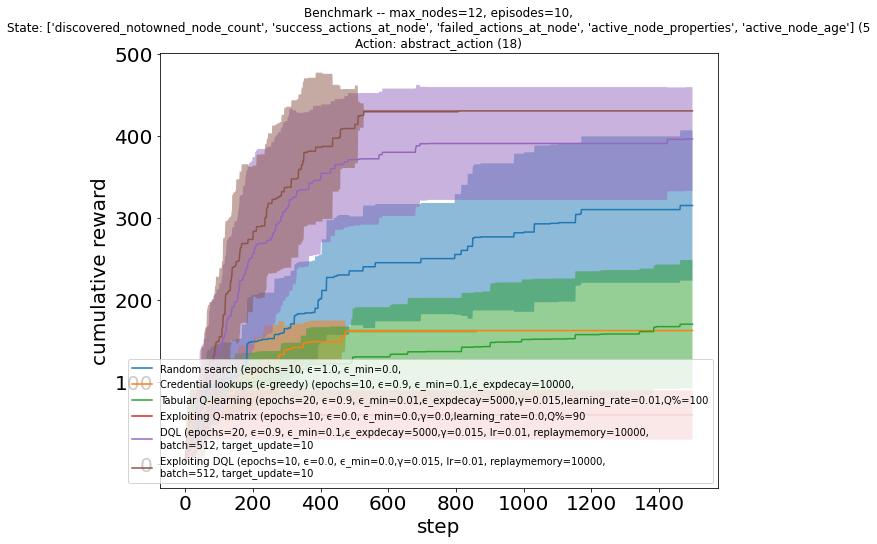

In [13]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
    credlookup_run,
    tabularq_run,
    tabularq_exploit_run,
    dql_run,
    dql_exploit_run
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f'Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n'
    f'State: {[f.name() for f in themodel.state_space.feature_selection]} '
    f'({len(themodel.state_space.feature_selection)}\n'
    f"Action: abstract_action ({themodel.action_space.flat_size()})")

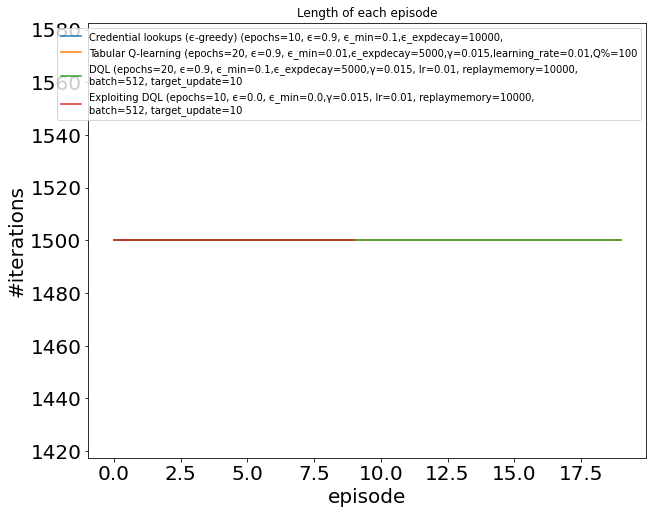

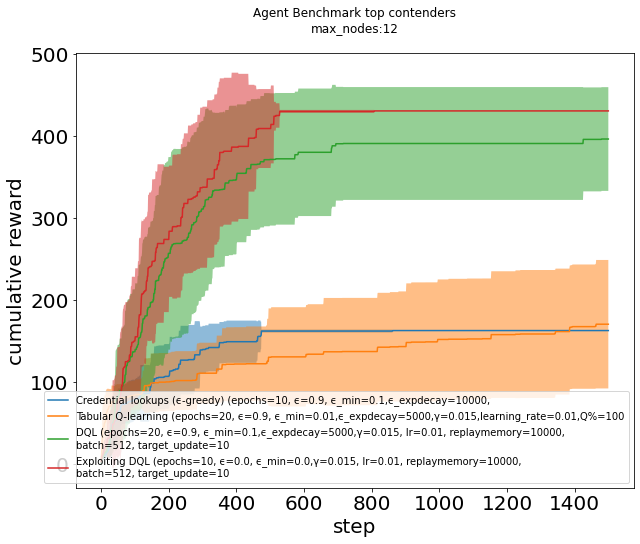

In [14]:
contenders = [
    credlookup_run,
    tabularq_run,
    dql_run,
    dql_exploit_run
]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f'Agent Benchmark top contenders\n'
    f'max_nodes:{ep.maximum_node_count}\n',
    all_runs=contenders)

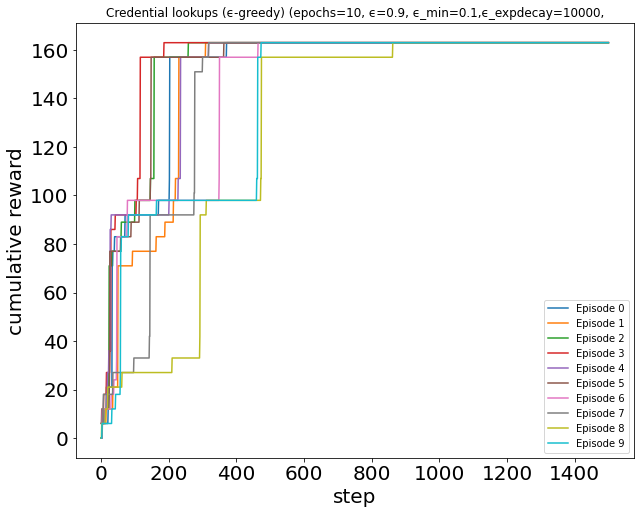

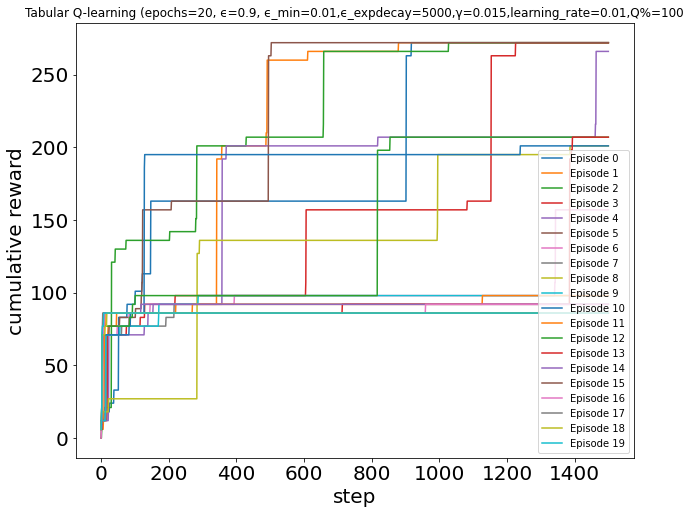

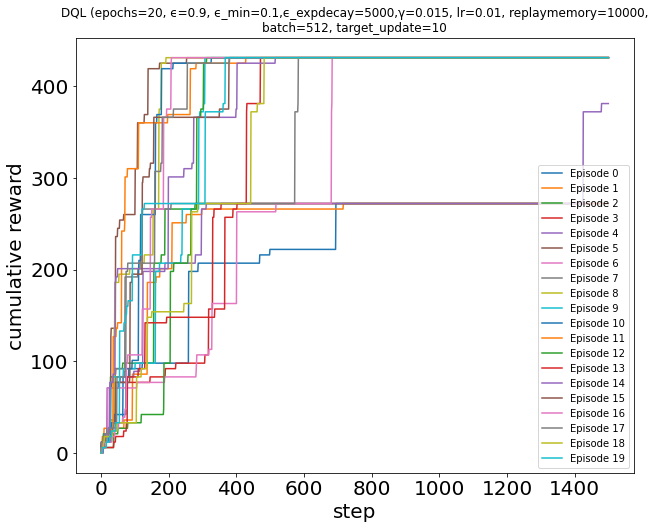

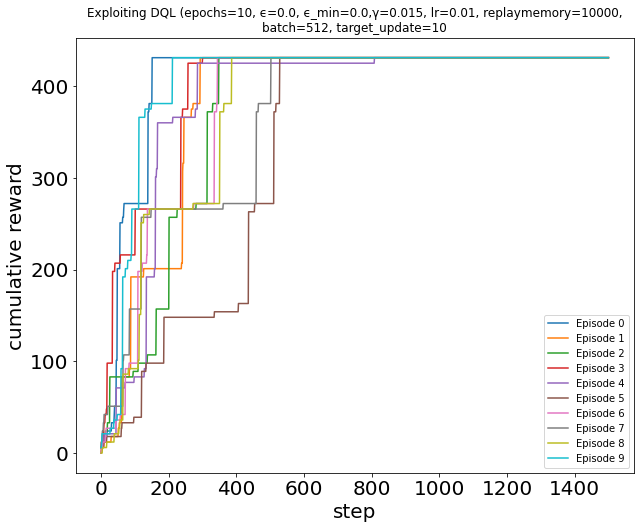

In [15]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)